In [2]:
import os
import sys
from collections import defaultdict
import numpy as np
import pandas as pd
import networkx as nx
import osmnx as ox

sys.path.append("/Users/a.ashabokov/Documents/github/graph_tools/graph_isohrones/")

import build.graph_utils.graph_utils as graph_utils

# Test polygon covering

# Test graph

In [3]:
graph = ox.load_graphml("data/sahalin_region.graphml")
nodes_df, edges_df = ox.graph_to_gdfs(graph)

In [5]:
nodes_df.head()

,y,x,street_count,highway,geometry
osmid,,,,,
2124710929,50.614446,97.386298,1,NaN,POINT (97.38630 50.61445)
2511734347,50.588890,97.481463,3,NaN,POINT (97.48146 50.58889)
2511734360,50.590414,97.533801,3,NaN,POINT (97.53380 50.59041)
2511734445,50.590637,97.529634,4,NaN,POINT (97.52963 50.59064)
2511734504,50.590746,97.535976,3,NaN,POINT (97.53598 50.59075)


In [6]:
edges_df.head()

osmid  \
u          v           key                                                 
2124710929 2511738000  0    [202504192, 202504193, 202504194, 243816002]   
2511734347 10741401701 0               [243816009, 243815980, 243815988]   
           10741401841 0                                       243815980   
           10741401700 0                                      1155003958   
2511734360 2511734820  0                                       243815985   

                           bridge          highway  oneway       reversed  \
u          v           key                                                  
2124710929 2511738000  0      yes  [path, footway]   False  [False, True]   
2511734347 10741401701 0      yes            track   False          False   
           10741401841 0      NaN            track   False           True   
           10741401700 0      NaN            track   False          False   
2511734360 2511734820  0      NaN      residential   False          False   

                              length  \
u          v           key             
2124710929 2511738000  0    1422.554   
2511734347 10741401701 0     933.430   
           10741401841 0     300.802   
           10741401700 0    1406.467   
2511734360 2511734820  0     379.231   

                                                                     geometry  \
u          v           key                                                      
2124710929 2511738000  0    LINESTRING (97.38630 50.61445, 97.39014 50.614...   
2511734347 10741401701 0    LINESTRING (97.48146 50.58889, 97.48217 50.589...   
           10741401841 0    LINESTRING (97.48146 50.58889, 97.48067 50.588...   
           10741401700 0    LINESTRING (97.48146 50.58889, 97.47995 50.588...   
2511734360 2511734820  0    LINESTRING (97.53380 50.59041, 97.53321 50.590...   

                                           name maxspeed  ref lanes junction  \
u          v           key                                                     
2124710929 2511738000  0                    NaN      NaN  NaN   NaN      NaN   
2511734347 10741401701 0                    NaN      NaN  NaN   NaN      NaN   
           10741401841 0                    NaN      NaN  NaN   NaN      NaN   
           10741401700 0                    NaN      NaN  NaN   NaN      NaN   
2511734360 2511734820  0    Комсомольская улица      NaN  NaN   NaN      NaN   

                           service width tunnel access  
u          v           key                              
2124710929 2511738000  0       NaN   NaN    NaN    NaN  
2511734347 10741401701 0       NaN   NaN    NaN    NaN  
           10741401841 0       NaN   NaN    NaN    NaN  
           10741401700 0       NaN   NaN    NaN    NaN  
2511734360 2511734820  0       NaN   NaN    NaN    NaN

In [4]:
nodes_df, edges_df = ox.graph_to_gdfs(graph)
edges_df.reset_index(drop=False, inplace=True)
edges_df = edges_df[['u', 'v', 'length']]
edges_df = edges_df.sort_values("length").drop_duplicates(keep="first")
edges_df['u'] = edges_df['u'].astype(str)
edges_df['v'] = edges_df['v'].astype(str)
edges_df['length'] = edges_df['length'].astype(float)
edges_df.dropna(inplace=True)
# edges_df = edges_df.groupby(['u', 'v']).agg('first')
edges_df

,u,v,length
75284,1954430814,1954430703,0.061
75268,1954430703,1954430814,0.061
131229,2147558260,2147555183,0.199
131217,2147555183,2147558260,0.199
125271,9992469701,9992469706,0.450
...,...,...,...
9401,2520391147,2520391100,44690.110
27872,1812878465,983956194,46880.947
27867,983956194,1812878465,46880.947
26641,6498406541,2592552359,56526.661


In [5]:
weights = defaultdict(dict)

for _, row in edges_df.iterrows():
    weights[row['u']][row['v']] = row['length']

weights = dict(weights)

In [19]:
start_nodes_lst = nodes_df.reset_index(drop=False)['osmid'].astype(str).to_list()
len(start_nodes_lst)

54229

In [20]:
np.random.shuffle(start_nodes_lst)

In [21]:
res = graph_utils.single_source_dijkstra(weights, start_nodes_lst[0], 1_000)

In [22]:
len(res)

1682

In [17]:
from tqdm import tqdm

pbar = tqdm(start_nodes_lst[:1000])
res_lst = []

for start in pbar:
    pbar.set_postfix_str(start)
    res = graph_utils.single_source_dijkstra(weights, start, 10_000)
    res_lst.append(res)

  0%|          | 0/1000 [00:00<?, ?it/s]

 82%|████████▏ | 820/1000 [11:26<02:30,  1.19it/s, 6343333679] 


KeyboardInterrupt: 

In [10]:
%%time
res = graph_utils.multi_source_dijkstra(weights, start_nodes_lst, 5_000, 8)

CPU times: user 1h 39min 36s, sys: 35.4 s, total: 1h 40min 12s
Wall time: 14min 33s


In [8]:
from tqdm import tqdm

pbar = tqdm(start_nodes_lst[:1000])
res_lst = []

for start in pbar:
    pbar.set_postfix_str(start)
    res = graph_utils.single_source_dijkstra(weights, start, 10_000)
    res_lst.append(res)

  2%|▏         | 22/1000 [00:23<17:13,  1.06s/it, 1463982761] 


KeyboardInterrupt: 

# Test geohash

In [1]:
import os
import sys
from icecream import ic
import pandas as pd
import numpy as np

sys.path.append("/Users/a.ashabokov/Documents/github/graph_tools/graph_isohrones/")

os.chdir("..")

from build.graph_utils.graph_utils import ghash_encode as cpp_encode
from old_geohash import encode as pure_python_encode
from new_geohash import encode as np_encode
from dskit_ghash_utils import encode as dskit_encode

/var/folders/3z/rwtgwglj2g3ghwkmpxr84nzm0000gq/T/ipykernel_41895/3814025626.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
coords_df = pd.read_csv("data/country-capital-lat-long-population.csv")
print(coords_df.shape)
coords_df.head()

(234, 6)


,Country,Capital City,Latitude,Longitude,Population,Capital Type
0,Afghanistan,Kabul,34.5289,69.1725,4011770,Capital
1,Albania,Tiranë (Tirana),41.3275,19.8189,475577,Capital
2,Algeria,El Djazaïr (Algiers),36.7525,3.0420,2693542,Capital
3,American Samoa,Pago Pago,-14.2781,-170.7025,48526,Capital
4,Andorra,Andorra la Vella,42.5078,1.5211,22614,Capital


In [7]:
coords_df['ghash'] = coords_df.apply(
    lambda x: encode(x['Longitude'], x['Latitude'], precision=18, bits_per_char=2),
    axis=1
)
coords_df.head()

,Country,Capital City,Latitude,Longitude,Population,Capital Type,ghash
0,Afghanistan,Kabul,34.5289,69.1725,4011770,Capital,202200020030301113
1,Albania,Tiranë (Tirana),41.3275,19.8189,475577,Capital,203321201101022300
2,Algeria,El Djazaïr (Algiers),36.7525,3.0420,2693542,Capital,203301322130132033
3,American Samoa,Pago Pago,-14.2781,-170.7025,48526,Capital,033013032012330302
4,Andorra,Andorra la Vella,42.5078,1.5211,22614,Capital,203333032110202201


In [14]:
coords_df[['Longitude', 'Latitude', 'ghash']].to_csv("test_coords_to_ghash.csv", index=False, sep=" ")

In [ ]:
coords_df.query("ghash == ")

In [35]:
py_coords = decode("120220220311022220", bits_per_char=2)[::-1]
cpp_coords = decode("120220220311022213", bits_per_char=2)[::-1]
true_coords = (-51.7216, 64.1835)[::-1]
print("python: ", encode(*true_coords[::-1], bits_per_char=2, precision=18))
ic(py_coords)
ic(cpp_coords)
ic(true_coords)

ic| py_coords: (64.18315887451172, -51.72157287597656)
ic| cpp_coords: (64.18384552001953, -51.72157287597656)
ic| true_coords: (64.1835, -51.7216)


python:  120220220311022220


(64.1835, -51.7216)

In [3]:
ic(encode(-51.7216, 64.1835, bits_per_char=2, precision=18))
ic(new_encode(-51.7216, 64.1835, bits_per_char=2, precision=18))

ic| encode(-51.7216, 64.1835, bits_per_char=2, precision=18): '120220220311022220'
/Users/a.ashabokov/Documents/github/graph_tools/graph_isohrones/python/new_geohash.py:211: RuntimeWarning: invalid value encountered in cast
  xy[:, flip] = n - 1 - xy[:, flip]
ic| new_encode(-51.7216, 64.1835, bits_per_char=2, precision=18): array('120220220300000000', dtype='<U18')


array('120220220300000000', dtype='<U18')

# Test geohash encode

In [2]:
import os
import sys
from icecream import ic
import pandas as pd
import numpy as np

sys.path.append("/Users/a.ashabokov/Documents/github/graph_tools/graph_isohrones/")

os.chdir("..")

from old_geohash import encode as pure_python_encode
from new_geohash import encode as np_encode
from dskit_ghash_utils import encode as dskit_encode
from build.graph_utils.graph_utils import ghash_encode as cpp_encode

In [3]:
GHASH_COUNT = 100_000_000

Pure python implementation

In [4]:
pure_python_res_lst = [""] * GHASH_COUNT

In [5]:
%%time
for i in range(GHASH_COUNT):
    pure_python_res_lst[i] = pure_python_encode(-51.7216, 64.1835, bits_per_char=2, precision=18)

CPU times: user 8min 58s, sys: 2.11 s, total: 9min
Wall time: 9min 9s


In [6]:
pure_python_res_lst[:10]

['120220220311022220',
 '120220220311022220',
 '120220220311022220',
 '120220220311022220',
 '120220220311022220',
 '120220220311022220',
 '120220220311022220',
 '120220220311022220',
 '120220220311022220',
 '120220220311022220']

Numpy implementation

In [4]:
lon_lst = np.array([-51.7216] * GHASH_COUNT)
lat_lst = np.array([64.1835] * GHASH_COUNT)

In [5]:
%%time
np_encode_res_lst = np_encode(lon_lst, lat_lst, bits_per_char=2, precision=18)

CPU times: user 1min 11s, sys: 27.9 s, total: 1min 38s
Wall time: 2min 5s


In [6]:
np_encode_res_lst[:10]

array(['120220220311022220', '120220220311022220', '120220220311022220',
       '120220220311022220', '120220220311022220', '120220220311022220',
       '120220220311022220', '120220220311022220', '120220220311022220',
       '120220220311022220'], dtype='<U18')

In [10]:
type(np_encode_res_lst[0])

numpy.str_

DsKit implementation

In [4]:
dskit_encode_res_lst = [""] * GHASH_COUNT

In [5]:
%%time
for i in range(GHASH_COUNT):
    dskit_encode_res_lst[i] = dskit_encode((-51.7216, 64.1835), 18)

CPU times: user 7min 44s, sys: 1.64 s, total: 7min 46s
Wall time: 7min 52s


C++ implementation 1 thread

In [4]:
lon_lst = [-51.7216] * GHASH_COUNT
lat_lst = [64.1835] * GHASH_COUNT

In [5]:
%%time
cpp_ghash_res = cpp_encode(lon_lst, lat_lst, 1)

CPU times: user 7.49 s, sys: 1.34 s, total: 8.83 s
Wall time: 9.98 s


In [7]:
cpp_ghash_res[:10]

['120220220311022220',
 '120220220311022220',
 '120220220311022220',
 '120220220311022220',
 '120220220311022220',
 '120220220311022220',
 '120220220311022220',
 '120220220311022220',
 '120220220311022220',
 '120220220311022220']

C++ implementation 12 threads

In [4]:
lon_lst = [-51.7216] * GHASH_COUNT
lat_lst = [64.1835] * GHASH_COUNT

In [5]:
%%time
cpp_ghash_res = cpp_encode(lon_lst, lat_lst, 12)

CPU times: user 9.03 s, sys: 1.48 s, total: 10.5 s
Wall time: 5.84 s


In [7]:
cpp_ghash_res[:10]

['120220220311022220',
 '120220220311022220',
 '120220220311022220',
 '120220220311022220',
 '120220220311022220',
 '120220220311022220',
 '120220220311022220',
 '120220220311022220',
 '120220220311022220',
 '120220220311022220']

In [1]:
from shapely import geometry
from shapely import wkt
import matplotlib.pyplot as plt

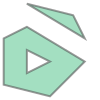

In [7]:
poly_str = "MULTIPOLYGON (((40 40, 20 45, 45 30, 40 40)),((20 35, 10 30, 10 10, 30 5, 45 20, 20 35),(30 20, 20 15, 20 25, 30 20)))"
poly = wkt.loads(poly_str)
poly

In [14]:
list(poly.geoms)

[<POLYGON ((40 40, 20 45, 45 30, 40 40))>,
 <POLYGON ((20 35, 10 30, 10 10, 30 5, 45 20, 20 35), (30 20, 20 15, 20 25, 3...>]

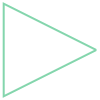

In [39]:
poly.geoms[-1].interiors[0]

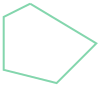

In [38]:
poly.geoms[-1].exterior

In [54]:
test_point = geometry.Point(20, 40)
poly.contains(test_point)

False

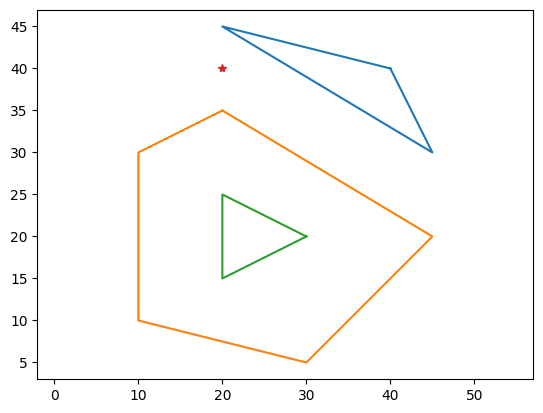

In [55]:
fig, axs = plt.subplots()
axs.set_aspect('equal', 'datalim')

for geom in poly.geoms:    
    xs, ys = geom.exterior.xy    
    axs.plot(xs, ys)

    for hole in geom.interiors:
        xs, ys = hole.xy    
        axs.plot(xs, ys)

plt.plot(*test_point.coords.xy, '*')

In [56]:
l = "LINESTRING (37.459778 55.9560342, 37.4626809 55.9557521, 37.4638809 55.955625, 37.4645382 55.9554396, 37.4650769 55.9553594, 37.4656762 55.9553441, 37.4664275 55.9553624, 37.4668767 55.9554579, 37.4673515 55.9556545, 37.4676467 55.9558873, 37.4676987 55.9561083, 37.4672863 55.956487, 37.4659132 55.9569673, 37.4654867 55.9572906, 37.4654763 55.9576717, 37.4658778 55.9580423, 37.4663877 55.9582978, 37.466763 55.958394, 37.4672752 55.9587802, 37.4664404 55.9602751, 37.4664598 55.9606059, 37.4667913 55.9608275, 37.4672543 55.9609395, 37.4688537 55.9607347, 37.4707144 55.960208, 37.4725585 55.9594418, 37.4736534 55.9593782, 37.4755992 55.9597654, 37.4770841 55.9603901, 37.4773942 55.9606411, 37.4775196 55.9609395, 37.4772889 55.9612259, 37.4767565 55.9616065, 37.4765233 55.9622466, 37.4765258 55.9625968, 37.4772504 55.9634555, 37.4782737 55.9640052, 37.4791059 55.964282, 37.4800075 55.9644648, 37.4808046 55.9644794, 37.4816835 55.9644327, 37.4824118 55.9642381, 37.4831289 55.9639612, 37.4841366 55.9633165, 37.4871359 55.9609387, 37.4872387 55.9605708, 37.486946 55.9598277, 37.4865279 55.9593713, 37.4857233 55.9587697, 37.4853362 55.9583882, 37.4850998 55.9579404, 37.4854367 55.9567407)"

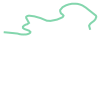

In [57]:
wkt.loads(l)

In [2]:
l = "MULTIPOLYGON (((36.900752 55.314857, 36.903255 55.31611, 36.903941 55.317234, 36.906173 55.316745, 36.909091 55.31992, 36.909606 55.322215, 36.910121 55.32617, 36.909117 55.32684, 36.908721 55.327772, 36.908464 55.329863, 36.908587 55.329265, 36.909673 55.329799, 36.910332 55.331303, 36.915847 55.330326, 36.915614 55.32993, 36.913667 55.326608, 36.91357 55.326441, 36.913297 55.325975, 36.916043 55.325487, 36.922567 55.32451, 36.922672 55.323856, 36.919453 55.318704, 36.918809 55.318655, 36.917608 55.316774, 36.916129 55.316989, 36.913468 55.317185, 36.912009 55.316745, 36.911065 55.31357, 36.910121 55.313033, 36.907889 55.311714, 36.906688 55.311275, 36.905028 55.312, 36.902997 55.312887, 36.902792 55.313015, 36.90128 55.313961, 36.900752 55.314857)), ((36.912703 55.747511, 36.915983 55.746672, 36.916911 55.746626, 36.921019 55.74658, 36.92202 55.747292, 36.924954 55.749085, 36.927682 55.750704, 36.928504 55.751175, 36.930924 55.752249, 36.931915 55.752601, 36.932314 55.752639, 36.93292 55.752637, 36.933185 55.75415, 36.933219 55.754407, 36.934003 55.754499, 36.934113 55.754488, 36.934219 55.754548, 36.935836 55.754827, 36.937226 55.75503, 36.937538 55.755027, 36.937663 55.755081, 36.938683 55.755249, 36.939492 55.755417, 36.941921 55.755809, 36.944874 55.756305, 36.948131 55.756833, 36.953067 55.757631, 36.956982 55.758275, 36.964285 55.759434, 36.968056 55.760037, 36.970428 55.758427, 36.971808 55.757945, 36.970658 55.75575, 36.962553 55.755414, 36.959359 55.755276, 36.959046 55.756104, 36.958262 55.757276, 36.957656 55.757222, 36.957574 55.757317, 36.957107 55.758246, 36.956925 55.758208, 36.957401 55.757268, 36.957478 55.757228, 36.95792 55.755763, 36.957204 55.754358, 36.956737 55.754261, 36.956371 55.753966, 36.956371 55.753849, 36.957434 55.751949, 36.957728 55.751638, 36.958195 55.751205, 36.958931 55.75101, 36.959859 55.750836, 36.960609 55.750655, 36.959984 55.750501, 36.959263 55.750008, 36.959007 55.749875, 36.961273 55.749469, 36.961312 55.749429, 36.961288 55.749277, 36.961634 55.749196, 36.963611 55.748153, 36.964458 55.747793, 36.964414 55.747677, 36.966353 55.747452, 36.966959 55.747458, 36.967286 55.747698, 36.967551 55.747926, 36.968277 55.748792, 36.968132 55.74955, 36.97039 55.749543, 36.97104 55.7515, 36.971064 55.751846, 36.971339 55.751857, 36.971706 55.752401, 36.971941 55.753277, 36.971826 55.753367, 36.972013 55.753922, 36.972293 55.753399, 36.972177 55.752801, 36.971834 55.752191, 36.973225 55.75203, 36.975605 55.751567, 36.976009 55.751391, 36.97658 55.751272, 36.97682 55.751222, 36.977248 55.751168, 36.977839 55.751168, 36.977975 55.751131, 36.978056 55.751108, 36.978179 55.751185, 36.97766 55.751584, 36.977783 55.751756, 36.979783 55.75378, 36.980162 55.754206, 36.980186 55.754252, 36.980337 55.754542, 36.980388 55.754639, 36.980792 55.75591, 36.976354 55.756941, 36.974935 55.757214, 36.975743 55.758375, 36.976951 55.759266, 36.977624 55.759745, 36.978755 55.760487, 36.980847 55.759799, 36.981982 55.759366, 36.982261 55.759087, 36.983228 55.758792, 36.983642 55.758684, 36.983397 55.758549, 36.984075 55.758105, 36.983373 55.757774, 36.983204 55.757875, 36.982714 55.757645, 36.986956 55.754664, 36.986711 55.752878, 36.987375 55.751938, 36.987308 55.751787, 36.984686 55.750371, 36.984541 55.75026, 36.987235 55.749112, 36.988847 55.748614, 36.989554 55.748714, 36.989944 55.749055, 36.989997 55.749399, 36.991117 55.748432, 36.988404 55.7473, 36.987894 55.747089, 36.987635 55.74668, 36.987529 55.746594, 36.987336 55.746526, 36.987399 55.746466, 36.985008 55.745484, 36.986177 55.744512, 36.986721 55.744704, 36.986745 55.744661, 36.987245 55.744812, 36.988273 55.744932, 36.98858 55.744926, 36.990174 55.744758, 36.99205 55.744709, 36.992204 55.74515, 36.992531 55.745142, 36.992671 55.745199, 36.993027 55.745895, 36.993363 55.746794, 36.993349 55.746953, 36.995163 55.74769, 36.994128 55.748223, 36.993796 55.748519, 36.993219 55.748784, 36.992647 55.749065, 36.991786 55.748686, 36.991574 55.748827, 36.991579 55.74886, 36.992031 55.748887, 36.992608 55.749166, 36.99421 55.748456, 36.995013 55.748305, 36.995995 55.747346, 36.998693 55.747866, 36.998934 55.747671, 37.001291 55.748337, 37.004581 55.748567, 37.006034 55.749596, 37.007266 55.748554, 37.008156 55.747728, 37.007939 55.74775, 37.005693 55.746859, 37.003018 55.74554, 37.003008 55.745421, 37.002527 55.74538, 37.00207 55.745651, 37.001512 55.745399, 37.000954 55.744991, 37.000767 55.744381, 37.001233 55.744184, 37.000656 55.743674, 37.000555 55.743707, 36.999906 55.743572, 36.999838 55.743691, 36.999396 55.74361, 36.999381 55.743493, 37.000069 55.74306, 37.000108 55.74297, 36.999492 55.743149, 36.99928 55.742629, 36.999131 55.74244, 36.999276 55.742275, 37.001373 55.741657, 37.001666 55.741644, 37.001989 55.741985, 37.0022 55.741931, 37.002542 55.74238, 37.002792 55.742594, 37.002922 55.742594, 37.003076 55.742721, 37.003186 55.742721, 37.003528 55.742943, 37.003504 55.743147, 37.003581 55.743152, 37.003749 55.74332, 37.003576 55.743417, 37.004201 55.743886, 37.005471 55.744674, 37.005476 55.744717, 37.006058 55.745031, 37.006482 55.745229, 37.00664 55.745394, 37.006775 55.745443, 37.006895 55.745332, 37.007905 55.745705, 37.008055 55.745811, 37.008776 55.746017, 37.008791 55.74609, 37.009517 55.746206, 37.009536 55.746044, 37.009969 55.74606, 37.009931 55.746274, 37.010176 55.746304, 37.010181 55.746388, 37.010469 55.746428, 37.010474 55.746331, 37.010628 55.746344, 37.010989 55.746415, 37.011191 55.746493, 37.01122 55.746385, 37.011494 55.746417, 37.01148 55.746542, 37.011946 55.746607, 37.012451 55.74665, 37.012302 55.746455, 37.016333 55.74626, 37.020235 55.745001, 37.02047 55.745418, 37.023843 55.74293, 37.024271 55.740883, 37.023726 55.739226, 37.022917 55.736532, 37.022688 55.736344, 37.022568 55.736111, 37.022655 55.736005, 37.022543 55.735866, 37.022525 55.735682, 37.022082 55.735028, 37.021966 55.734914, 37.025125 55.73453, 37.025082 55.734427, 37.025404 55.734381, 37.026049 55.734349, 37.02664 55.734238, 37.027804 55.734211, 37.028444 55.734073, 37.028901 55.734105, 37.029118 55.733964, 37.029041 55.733829, 37.028257 55.734005, 37.02741 55.734116, 37.026785 55.734138, 37.025741 55.734018, 37.024836 55.733786, 37.023951 55.733485, 37.023305 55.733109, 37.024019 55.732258, 37.027251 55.73352, 37.029762 55.732212, 37.031629 55.732163, 37.033284 55.731895, 37.034731 55.731963, 37.035929 55.732185, 37.038907 55.731632, 37.040143 55.731215, 37.040538 55.730898, 37.041452 55.730354, 37.043381 55.728528, 37.04466 55.728132, 37.046775 55.726823, 37.047325 55.725051, 37.047575 55.724263, 37.047758 55.723524, 37.04768 55.722397, 37.047385 55.721845, 37.046569 55.721258, 37.044764 55.720803, 37.042659 55.721028, 37.042751 55.720213, 37.04219 55.719443, 37.041698 55.719553, 37.040989 55.719548, 37.040976 55.719285, 37.041548 55.719312, 37.042177 55.71915, 37.042366 55.719407, 37.044248 55.718764, 37.045021 55.71866, 37.046197 55.718802, 37.047144 55.718843, 37.050975 55.718418, 37.05254 55.718353, 37.053238 55.718742, 37.054257 55.720357, 37.048826 55.721388, 37.048983 55.721983, 37.050115 55.722046, 37.052035 55.72232, 37.054814 55.723697, 37.061446 55.723346, 37.064585 55.723191, 37.065377 55.72237, 37.067602 55.723141, 37.068001 55.72332, 37.068275 55.723129, 37.069164 55.723471, 37.069366 55.724273, 37.069299 55.725985, 37.069722 55.727865, 37.070237 55.729019, 37.071897 55.72981, 37.073777 55.730138, 37.075769 55.729851, 37.079059 55.728468, 37.080993 55.728077, 37.085197 55.72802, 37.088474 55.72737, 37.088786 55.727958, 37.08972 55.727756, 37.093231 55.727867, 37.093801 55.728267, 37.094262 55.728293, 37.095037 55.728227, 37.096223 55.726517, 37.096985 55.726135, 37.099095 55.725951, 37.101772 55.72562, 37.101774 55.725693, 37.101856 55.725931, 37.103367 55.725987, 37.103442 55.72599, 37.104137 55.72645, 37.105189 55.726489, 37.107937 55.726454, 37.108195 55.72638, 37.110412 55.726601, 37.111241 55.726713, 37.112571 55.727123, 37.113271 55.727423, 37.113918 55.727761, 37.114548 55.727944, 37.115012 55.728196, 37.115257 55.728395, 37.115878 55.728794, 37.115964 55.728745, 37.116564 55.729146, 37.117215 55.729579, 37.119292 55.73102, 37.119743 55.73125, 37.120316 55.731772, 37.120648 55.732789, 37.119474 55.734789, 37.115884 55.736173, 37.114328 55.734799, 37.112499 55.733217, 37.111008 55.732284, 37.110769 55.732605, 37.110254 55.733229, 37.107992 55.734461, 37.107917 55.734566, 37.107665 55.734767, 37.106296 55.734196, 37.105755 55.734031, 37.105416 55.733966, 37.105067 55.733919, 37.104622 55.733908, 37.103898 55.733969, 37.103218 55.734096, 37.10287 55.734218, 37.102617 55.734075, 37.105182 55.732639, 37.105011 55.732486, 37.103764 55.732622, 37.103283 55.732627, 37.101388 55.732206, 37.101324 55.732148, 37.100963 55.732003, 37.099987 55.73175, 37.097005 55.731662, 37.096266 55.73171, 37.096102 55.730944, 37.096878 55.730917, 37.096697 55.730601, 37.09588 55.730611, 37.095768 55.730368, 37.095253 55.729786, 37.094558 55.729102, 37.094349 55.72872, 37.092726 55.729554, 37.091341 55.730289, 37.090704 55.730444, 37.088637 55.730549, 37.087779 55.730724, 37.087181 55.730893, 37.085842 55.731609, 37.084768 55.732006, 37.083873 55.732229, 37.082354 55.732582, 37.081954 55.73279, 37.080733 55.733802, 37.080261 55.734362, 37.079485 55.735409, 37.080015 55.735145, 37.080383 55.735369, 37.080021 55.735497, 37.080054 55.735635, 37.079664 55.735738, 37.081112 55.736105, 37.081503 55.736152, 37.082448 55.737377, 37.084327 55.739038, 37.084397 55.739132, 37.084162 55.739168, 37.084741 55.73996, 37.084748 55.74016, 37.085306 55.74067, 37.085872 55.741638, 37.088215 55.741443, 37.089459 55.741248, 37.089784 55.741319, 37.092491 55.743649, 37.093016 55.743481, 37.094128 55.743588, 37.094796 55.743573, 37.095233 55.743594, 37.096967 55.74379, 37.098162 55.743598, 37.104665 55.742257, 37.106757 55.741832, 37.107388 55.741574, 37.112068 55.738999, 37.112006 55.738463, 37.111626 55.738008, 37.111967 55.737894, 37.11291 55.737721, 37.116402 55.737504, 37.116539 55.737006, 37.116922 55.736586, 37.122016 55.734861, 37.121732 55.734013, 37.121588 55.733888, 37.122858 55.732867, 37.12687 55.728826, 37.127775 55.728082, 37.126227 55.726987, 37.12497 55.726429, 37.122985 55.725675, 37.121879 55.725168, 37.121691 55.725, 37.120151 55.724221, 37.11929 55.723861, 37.119271 55.723824, 37.120942 55.72253, 37.121101 55.722319, 37.122254 55.721648, 37.123062 55.721205, 37.120384 55.720214, 37.119484 55.720013, 37.118898 55.720823, 37.118561 55.720761, 37.116738 55.71994, 37.114868 55.718593, 37.112087 55.717063, 37.112533 55.716707, 37.113009 55.716103, 37.110796 55.715915, 37.107667 55.715638, 37.107676 55.716064, 37.106582 55.715801, 37.105807 55.715787, 37.105769 55.715933, 37.10562 55.716134, 37.104118 55.716368, 37.100921 55.716289, 37.10068 55.716226, 37.096402 55.7163, 37.096399 55.715583, 37.093865 55.715663, 37.091605 55.715636, 37.091605 55.715577, 37.089136 55.71553, 37.085854 55.715548, 37.08121 55.715594, 37.080169 55.715551, 37.079421 55.715436, 37.079404 55.715484, 37.078846 55.715417, 37.0778 55.71613, 37.075751 55.71756, 37.073204 55.719369, 37.069883 55.721701, 37.068343 55.722696, 37.067903 55.722878, 37.065411 55.721723, 37.063304 55.721178, 37.061654 55.720374, 37.060139 55.718883, 37.059639 55.717569, 37.059648 55.715764, 37.059182 55.713402, 37.058393 55.712052, 37.056608 55.710686, 37.05454 55.709757, 37.052303 55.709312, 37.046482 55.709071, 37.039969 55.708843, 37.037944 55.709174, 37.036789 55.709762, 37.035394 55.711066, 37.034897 55.712003, 37.034235 55.713253, 37.03384 55.713987, 37.032686 55.713751, 37.02889 55.712646, 37.028404 55.7126, 37.027515 55.712328, 37.026663 55.711852, 37.025162 55.710499, 37.024662 55.709727, 37.026196 55.709532, 37.026307 55.709589, 37.026644 55.709559, 37.027029 55.709971, 37.026293 55.710318, 37.026716 55.710827, 37.027563 55.710491, 37.028457 55.711033, 37.028318 55.711557, 37.028937 55.711837, 37.029148 55.711818, 37.03127 55.710361, 37.032644 55.709338, 37.033032 55.7092, 37.033304 55.709005, 37.033665 55.708449, 37.03527 55.707502, 37.03508 55.707119, 37.034216 55.707142, 37.034134 55.707195, 37.03378 55.707199, 37.03376 55.70682, 37.034406 55.706812, 37.034352 55.706322, 37.034699 55.706306, 37.034692 55.70623, 37.029046 55.706268, 37.025617 55.706329, 37.023474 55.706433, 37.023154 55.706337, 37.022587 55.706432, 37.020331 55.706479, 37.020344 55.706797, 37.020106 55.706793, 37.020086 55.706479, 37.017412 55.706555, 37.017235 55.705367, 37.01365 55.705302, 37.011065 55.705321, 37.004174 55.705413, 37.003711 55.706034, 37.003221 55.706237, 37.002357 55.706249, 37.002902 55.706851, 37.002922 55.707004, 37.002197 55.707027, 37.001452 55.70705, 37.000799 55.707146, 37.00016 55.707391, 36.995636 55.710009, 36.992044 55.71209, 36.992853 55.712301, 36.992969 55.712201, 36.993717 55.712316, 36.99401 55.711998, 36.995881 55.712312, 36.996126 55.712071, 36.997908 55.712477, 36.99803 55.712289, 36.997949 55.711883, 36.997969 55.711323, 36.997507 55.711059, 36.997752 55.710806, 36.99782 55.71081, 36.998139 55.710507, 36.998527 55.710235, 36.999412 55.709307, 36.99969 55.708886, 37.000242 55.707885, 37.002044 55.708085, 37.001929 55.709192, 37.001942 55.709583, 37.002119 55.709737, 37.002344 55.709786, 37.002935 55.709875, 37.003364 55.710749, 37.001915 55.711009, 37.001514 55.711151, 37.00167 55.711377, 37.002004 55.711599, 37.002078 55.711937, 37.000935 55.711933, 37.000616 55.711745, 37.000377 55.711515, 37.000017 55.711561, 36.999262 55.712324, 36.999289 55.71245, 36.999105 55.712485, 36.999105 55.71268, 36.998976 55.713186, 36.999507 55.713447, 37.002207 55.713841, 37.002976 55.714163, 37.003351 55.713803, 37.004126 55.714225, 37.004235 55.714351, 37.003799 55.714562, 37.004072 55.714654, 37.005024 55.715259, 37.005058 55.715447, 37.006691 55.71583, 37.007119 55.715378, 37.007344 55.715275, 37.007813 55.71475, 37.011024 55.715229, 37.011936 55.71465, 37.011968 55.714588, 37.012836 55.712905, 37.013222 55.712159, 37.013024 55.710354, 37.011086 55.710404, 37.009432 55.707491, 37.013521 55.707295, 37.013521 55.706785, 37.015235 55.706682, 37.015235 55.706601, 37.015861 55.706601, 37.01593 55.707057, 37.020646 55.706919, 37.020725 55.708416, 37.023436 55.709015, 37.024252 55.709586, 37.022919 55.710107, 37.019702 55.710704, 37.01484 55.710763, 37.014861 55.711224, 37.014956 55.711228, 37.015269 55.7115, 37.016419 55.713389, 37.016671 55.713899, 37.017372 55.715662, 37.014759 55.716217, 37.011671 55.715865, 37.011916 55.716509, 37.0128 55.718566, 37.01197 55.720291, 37.01214 55.720425, 37.011378 55.720452, 37.010834 55.720275, 37.010364 55.719865, 37.009664 55.719701, 37.008874 55.71985, 37.008324 55.719819, 37.008902 55.721754, 37.009208 55.722248, 37.009358 55.722689, 37.009324 55.722984, 37.008834 55.723103, 37.007058 55.723203, 37.006963 55.723421, 37.006541 55.723681, 37.006718 55.724793, 37.006073 55.725324, 37.004534 55.72482, 37.000358 55.72326, 36.999887 55.722957, 36.99905 55.72132, 36.998983 55.721049, 36.998059 55.72002, 36.997588 55.719667, 36.996702 55.719261, 36.995904 55.718995, 36.995182 55.718882, 36.992873 55.718822, 36.991238 55.718947, 36.990988 55.719093, 36.988323 55.720123, 36.985205 55.721342, 36.984648 55.720946, 36.983426 55.721494, 36.981569 55.722545, 36.978692 55.723374, 36.978076 55.723433, 36.978028 55.72339, 36.977403 55.723515, 36.977365 55.724197, 36.976855 55.724306, 36.976297 55.724154, 36.975161 55.725086, 36.974353 55.725303, 36.972862 55.725595, 36.972227 55.725785, 36.971149 55.726354, 36.970649 55.726543, 36.97037 55.726695, 36.970226 55.72663, 36.96885 55.727432, 36.968225 55.727632, 36.967994 55.727806, 36.966897 55.728055, 36.966445 55.728055, 36.966137 55.727957, 36.963356 55.727746, 36.962567 55.727773, 36.962221 55.727957, 36.963395 55.729507, 36.962548 55.729691, 36.962086 55.729929, 36.96275 55.731246, 36.962844 55.732603, 36.962856 55.732779, 36.96327 55.733716, 36.964684 55.735092, 36.965252 55.735449, 36.967185 55.736024, 36.97063 55.736365, 36.973843 55.736257, 36.977672 55.735558, 36.979722 55.734756, 36.980395 55.733998, 36.980713 55.73318, 36.980357 55.732746, 36.980665 55.732113, 36.982723 55.730179, 36.983916 55.72955, 36.984513 55.728689, 36.984975 55.727334, 36.985237 55.727332, 36.985648 55.727329, 36.987717 55.728597, 36.992258 55.73084, 36.993554 55.731561, 36.992727 55.732146, 36.991111 55.733229, 36.991159 55.733254, 36.990856 55.733462, 36.992241 55.734196, 36.99543 55.735919, 36.994271 55.736528, 36.99494 55.73688, 36.995445 55.736642, 36.996013 55.736961, 36.996595 55.736634, 36.999356 55.738356, 37.002343 55.735131, 37.003171 55.735171, 37.004729 55.737438, 37.005114 55.738015, 37.005686 55.739656, 37.004551 55.73987, 37.003748 55.739908, 37.002545 55.73984, 36.998702 55.739001, 36.995902 55.738389, 36.995344 55.73834, 36.994382 55.738018, 36.99353 55.737435, 36.992217 55.736274, 36.991808 55.735922, 36.9924 55.735621, 36.991332 55.734968, 36.99088 55.734624, 36.9901 55.735066, 36.989557 55.734738, 36.987849 55.73577, 36.986473 55.736607, 36.986368 55.736615, 36.985784 55.736935, 36.985608 55.737032, 36.985295 55.737468, 36.984554 55.738188, 36.984439 55.738161, 36.984256 55.738335, 36.983953 55.73853, 36.988109 55.739356, 36.9886 55.739407, 36.989023 55.739412, 36.989571 55.739388, 36.989922 55.739347, 36.990067 55.739575, 36.990399 55.739718, 36.990615 55.739589, 36.99112 55.739599, 36.99252 55.739848, 36.994093 55.740582, 36.992794 55.741416, 36.990466 55.741847, 36.990178 55.741844, 36.989143 55.741452, 36.990567 55.739916, 36.990052 55.739648, 36.989793 55.73964, 36.989668 55.739605, 36.989345 55.739629, 36.988619 55.739624, 36.987998 55.739556, 36.986541 55.73928, 36.983238 55.738794, 36.982811 55.73921, 36.982291 55.739044, 36.982291 55.739017, 36.982094 55.738968, 36.982171 55.738855, 36.981382 55.738666, 36.981235 55.739025, 36.980686 55.739583, 36.980181 55.739962, 36.979662 55.740431, 36.978637 55.741276, 36.977584 55.742156, 36.974321 55.741106, 36.975466 55.74009, 36.97486 55.739838, 36.974889 55.7396, 36.975187 55.739681, 36.975336 55.739416, 36.975154 55.739373, 36.975221 55.739218, 36.975346 55.739245, 36.975578 55.739012, 36.97591 55.738679, 36.97618 55.738733, 36.976391 55.738422, 36.973712 55.738291, 36.972914 55.738218, 36.971921 55.738088, 36.970456 55.737792, 36.968214 55.737321, 36.96384 55.73616, 36.963648 55.735903, 36.963624 55.735469, 36.963879 55.735095, 36.963542 55.734985, 36.962936 55.734305, 36.962724 55.733936, 36.962416 55.733606, 36.962113 55.733113, 36.961998 55.732753, 36.960636 55.732666, 36.957803 55.73249, 36.956134 55.732382, 36.95345 55.732127, 36.95013 55.731959, 36.948254 55.731813, 36.947672 55.731761, 36.947438 55.733092, 36.947274 55.733889, 36.946927 55.734536, 36.946906 55.73472, 36.947185 55.734907, 36.947138 55.734942, 36.947138 55.735708, 36.947002 55.735888, 36.946784 55.73598, 36.946464 55.736393, 36.946294 55.736505, 36.946286 55.736617, 36.944033 55.736687, 36.9434 55.736733, 36.938468 55.73689, 36.935488 55.736993, 36.936318 55.739418, 36.936978 55.739387, 36.937441 55.739142, 36.94008 55.738728, 36.940597 55.738724, 36.941033 55.738809, 36.941182 55.738947, 36.94142 55.741535, 36.941475 55.742229, 36.942985 55.741987, 36.944237 55.743152, 36.943584 55.743305, 36.945802 55.74548, 36.945237 55.746916, 36.946305 55.747425, 36.945112 55.748039, 36.945078 55.748196, 36.945507 55.748551, 36.945757 55.748637, 36.946594 55.749087, 36.946801 55.748949, 36.947248 55.749146, 36.948912 55.749996, 36.948441 55.750281, 36.948888 55.750467, 36.948763 55.750603, 36.94858 55.750743, 36.949114 55.751158, 36.949023 55.751336, 36.948729 55.751729, 36.948643 55.751721, 36.948556 55.751824, 36.946599 55.751272, 36.94617 55.751204, 36.945583 55.75181, 36.945223 55.752306, 36.944347 55.753651, 36.944198 55.754666, 36.941648 55.754322, 36.941394 55.753919, 36.93996 55.753773, 36.938613 55.753868, 36.938166 55.753927, 36.938065 55.753711, 36.937795 55.752904, 36.937435 55.75178, 36.937353 55.751778, 36.937295 55.751577, 36.937367 55.751556, 36.936689 55.749498, 36.936174 55.748006, 36.935789 55.746961, 36.935626 55.746455, 36.935308 55.745832, 36.935164 55.745069, 36.935058 55.744714, 36.934962 55.744719, 36.93496 55.744589, 36.935017 55.744587, 36.93481 55.743988, 36.934243 55.743225, 36.933661 55.742607, 36.933341 55.74236, 36.932984 55.742097, 36.932314 55.741661, 36.931443 55.741123, 36.930923 55.740826, 36.930821 55.740705, 36.930042 55.74024, 36.92948 55.739874, 36.92764 55.738739, 36.925552 55.737509, 36.924956 55.73717, 36.924865 55.737174, 36.924766 55.737109, 36.924763 55.737048, 36.924283 55.736766, 36.924069 55.736766, 36.924045 55.736722, 36.918478 55.736824, 36.916697 55.736824, 36.916409 55.73681, 36.914964 55.736633, 36.913158 55.736389, 36.911802 55.73617, 36.911434 55.736125, 36.911122 55.736123, 36.910903 55.736203, 36.910684 55.736358, 36.910532 55.736553, 36.91051 55.736749, 36.910712 55.737376, 36.910811 55.737787, 36.910925 55.738316, 36.910893 55.738466, 36.910711 55.738576, 36.910553 55.738632, 36.910366 55.738788, 36.910005 55.738873, 36.909801 55.738979, 36.909702 55.739069, 36.909506 55.739379, 36.909258 55.740061, 36.909129 55.740257, 36.908611 55.740918, 36.908333 55.741236, 36.908208 55.741307, 36.908051 55.74134, 36.907726 55.741336, 36.907373 55.741304, 36.906245 55.74129, 36.905172 55.741232, 36.905073 55.740979, 36.905069 55.740826, 36.905124 55.740743, 36.905336 55.740635, 36.905557 55.740529, 36.905699 55.740436, 36.905896 55.740195, 36.906084 55.739997, 36.906269 55.739881, 36.906533 55.739689, 36.90668 55.739533, 36.906796 55.739366, 36.90693 55.739118, 36.90707 55.738754, 36.907135 55.738492, 36.908119 55.738542, 36.910506 55.738573, 36.91066 55.738534, 36.910809 55.738444, 36.910836 55.738316, 36.910724 55.737793, 36.910626 55.737383, 36.910421 55.736752, 36.910445 55.736541, 36.910609 55.736332, 36.910843 55.736166, 36.911097 55.736073, 36.911443 55.736076, 36.911823 55.736122, 36.91318 55.736341, 36.914984 55.736585, 36.916422 55.736761, 36.916701 55.736775, 36.918476 55.736775, 36.924018 55.736672, 36.92398 55.736569, 36.922113 55.734023, 36.922046 55.734001, 36.921953 55.733742, 36.921964 55.733679, 36.92117 55.732828, 36.921103 55.732717, 36.917971 55.733286, 36.917867 55.733001, 36.917832 55.732904, 36.918337 55.7324, 36.91939 55.731247, 36.918914 55.731049, 36.918842 55.731396, 36.917755 55.732078, 36.917033 55.732387, 36.916086 55.732625, 36.914195 55.732839, 36.913445 55.732812, 36.912516 55.732693, 36.9109 55.732449, 36.910068 55.73227, 36.909808 55.732184, 36.909303 55.732092, 36.908913 55.732159, 36.907638 55.732243, 36.905373 55.732238, 36.904074 55.732151, 36.901563 55.732409, 36.899153 55.732828, 36.897205 55.73311, 36.896065 55.733273, 36.894025 55.733332, 36.892426 55.733367, 36.889575 55.733027, 36.88914 55.733639, 36.888079 55.734436, 36.888541 55.734857, 36.888977 55.734206, 36.889344 55.73403, 36.890038 55.734359, 36.890487 55.733601, 36.891004 55.733678, 36.891358 55.733785, 36.891725 55.733823, 36.892324 55.733762, 36.893616 55.733877, 36.894946 55.733823, 36.895292 55.733749, 36.8953 55.733662, 36.895514 55.73355, 36.896977 55.733318, 36.897276 55.73331, 36.897262 55.733458, 36.898311 55.733295, 36.899555 55.733657, 36.899545 55.733714, 36.899728 55.73376, 36.899877 55.734657, 36.900094 55.734727, 36.89993 55.735142, 36.900604 55.735163, 36.90031 55.736369, 36.900426 55.736385, 36.900334 55.736802, 36.899988 55.737704, 36.900055 55.738378, 36.899916 55.738847, 36.899699 55.739215, 36.899286 55.740748, 36.899218 55.74104, 36.899122 55.741184, 36.898915 55.741276, 36.898397 55.741497, 36.897684 55.741793, 36.896871 55.742169, 36.897198 55.742446, 36.898583 55.741806, 36.89862 55.742134, 36.898651 55.742408, 36.898963 55.742659, 36.898944 55.743299, 36.899257 55.743642, 36.899237 55.744173, 36.899491 55.744472, 36.89968 55.744696, 36.899682 55.744834, 36.899685 55.745132, 36.899747 55.745367, 36.902874 55.744912, 36.902936 55.744928, 36.904755 55.745394, 36.905222 55.745614, 36.905789 55.746686, 36.905876 55.746846, 36.906049 55.746957, 36.906367 55.747038, 36.906809 55.747103, 36.907107 55.747138, 36.90779 55.747319, 36.907815 55.74792, 36.908007 55.748359, 36.908079 55.748752, 36.909388 55.748359, 36.912703 55.747511)), ((37.298217 55.797628, 37.294467 55.796717, 37.29441 55.796787, 37.294117 55.796713, 37.294168 55.796635, 37.293168 55.796397, 37.293264 55.798065, 37.290502 55.80199, 37.295422 55.802997, 37.296632 55.803202, 37.297769 55.803354, 37.298637 55.80345, 37.299686 55.803522, 37.303564 55.803559, 37.303265 55.803182, 37.302923 55.802477, 37.302777 55.801273, 37.302354 55.798634, 37.298217 55.797628)), ((37.792891 56.003881, 37.793037 56.003809, 37.793489 56.003727, 37.794094 56.003156, 37.792101 56.002493, 37.791633 56.002875, 37.791 56.002657, 37.790476 56.002477, 37.790034 56.002921, 37.792891 56.003881)), ((37.798918 56.00932, 37.798514 56.009703, 37.797975 56.009552, 37.794897 56.00932, 37.795319 56.009024, 37.792958 56.008254, 37.793192 56.008041, 37.791489 56.007477, 37.791224 56.007285, 37.793113 56.005576, 37.79315 56.005543, 37.796838 56.004761, 37.797346 56.00541, 37.799432 56.006153, 37.79786 56.007728, 37.7989 56.008244, 37.798222 56.009015, 37.798918 56.00932)), ((37.268302 55.967836, 37.268137 55.968213, 37.261292 55.968073, 37.261581 55.96991, 37.261055 55.969902, 37.261461 55.971425, 37.26282 55.971763, 37.262992 55.971915, 37.263043 55.971904, 37.263097 55.971895, 37.263143 55.971895, 37.263178 55.971898, 37.263199 55.971913, 37.263207 55.971932, 37.263195 55.971954, 37.263169 55.971973, 37.26314 55.971995, 37.263132 55.97202, 37.263143 55.97205, 37.263162 55.97208, 37.263192 55.972109, 37.263228 55.972133, 37.263243 55.972143, 37.263274 55.972162, 37.263322 55.97219, 37.263372 55.972215, 37.263455 55.972258, 37.263526 55.972384, 37.263798 55.972711, 37.263871 55.972904, 37.263623 55.972895, 37.263608 55.973015, 37.26392 55.973033, 37.264606 55.974718, 37.265178 55.976183, 37.265504 55.977144, 37.265667 55.97761, 37.266438 55.979466, 37.266062 55.979544, 37.265408 55.979647, 37.266163 55.981144, 37.266568 55.981366, 37.267102 55.981624, 37.267743 55.981934, 37.267355 55.982428, 37.265174 55.983038, 37.265504 55.98449, 37.265107 55.985884, 37.264235 55.986911, 37.264458 55.987137, 37.263946 55.987318, 37.263714 55.987626, 37.263014 55.988541, 37.261111 55.987938, 37.258685 55.98773, 37.256052 55.987336, 37.25555 55.987261, 37.2547 55.987679, 37.253792 55.988269, 37.257308 55.990058, 37.259282 55.991703, 37.260536 55.993153, 37.256707 55.994616, 37.254415 55.99551, 37.252459 55.996273, 37.248444 55.997841, 37.248504 55.998394, 37.248087 55.998553, 37.247451 55.999081, 37.247032 56.000137, 37.246753 56.000486, 37.246312 56.00081, 37.245394 56.001069, 37.244367 56.001094, 37.243404 56.000894, 37.242301 56.000282, 37.240677 56.000927, 37.240415 56.001031, 37.235403 56.002969, 37.23176 56.004429, 37.228688 56.005569, 37.226103 56.006566, 37.223184 56.007696, 37.220515 56.008745, 37.217843 56.009757, 37.214766 56.010953, 37.210665 56.012431, 37.211303 56.012976, 37.207375 56.01715, 37.206972 56.01717, 37.206904 56.017174, 37.205853 56.016737, 37.205129 56.016446, 37.203831 56.015943, 37.20325 56.015486, 37.200628 56.016567, 37.197458 56.017846, 37.19557 56.018601, 37.190745 56.020521, 37.190235 56.020729, 37.189598 56.02098, 37.188978 56.021224, 37.188814 56.021121, 37.18816 56.020709, 37.186998 56.019994, 37.18491 56.020143, 37.184892 56.020072, 37.184512 56.020018, 37.184212 56.019721, 37.185285 56.018915, 37.183697 56.017999, 37.181474 56.016716, 37.179119 56.016054, 37.177612 56.015132, 37.175693 56.014984, 37.173818 56.014841, 37.172519 56.014732, 37.171253 56.014626, 37.169186 56.014218, 37.168668 56.014106, 37.167744 56.013891, 37.167574 56.013896, 37.16595 56.013947, 37.164615 56.014233, 37.164214 56.014069, 37.163825 56.013595, 37.162655 56.013937, 37.16173 56.013221, 37.160507 56.013425, 37.158863 56.0137, 37.158661 56.014142, 37.159963 56.014441, 37.159186 56.015335, 37.159778 56.015898, 37.159754 56.016362, 37.15897 56.017214, 37.158256 56.017998, 37.157018 56.017899, 37.155052 56.017639, 37.151942 56.016831, 37.15052 56.016499, 37.150095 56.017223, 37.149169 56.017391, 37.147467 56.0177, 37.146717 56.017836, 37.145235 56.018092, 37.144767 56.017968, 37.144184 56.017692, 37.143349 56.017692, 37.140737 56.018074, 37.138754 56.018372, 37.13884 56.018132, 37.138927 56.017892, 37.138453 56.018109, 37.137433 56.018577, 37.136091 56.019108, 37.135821 56.018934, 37.135094 56.018406, 37.134024 56.017733, 37.132659 56.016777, 37.131602 56.016446, 37.133949 56.014427, 37.133994 56.014333, 37.135956 56.012583, 37.137394 56.011198, 37.139068 56.009594, 37.139417 56.009721, 37.141276 56.008079, 37.14328 56.006363, 37.146977 56.003347, 37.149089 56.001462, 37.151171 55.999549, 37.150644 55.999226, 37.149199 55.998343, 37.150248 55.997534, 37.150269 55.997212, 37.14993 55.996572, 37.151156 55.996307, 37.151368 55.996213, 37.152711 55.994242, 37.152744 55.993058, 37.150691 55.993133, 37.148822 55.99212, 37.149662 55.991567, 37.149711 55.991379, 37.149583 55.99117, 37.147838 55.990802, 37.146925 55.991021, 37.146093 55.990478, 37.145602 55.990116, 37.144709 55.989977, 37.144531 55.98995, 37.144354 55.989923, 37.144087 55.989882, 37.144393 55.989316, 37.14569 55.985447, 37.146076 55.984347, 37.146278 55.983771, 37.146568 55.982945, 37.147018 55.98164, 37.147334 55.980706, 37.147352 55.980669, 37.148418 55.97776, 37.148733 55.976992, 37.148731 55.975014, 37.148732 55.973508, 37.148732 55.973202, 37.148741 55.973201, 37.148774 55.970267, 37.148762 55.97023, 37.148427 55.970164, 37.147267 55.970025, 37.14638 55.96997, 37.146306 55.969682, 37.146145 55.969066, 37.145854 55.968071, 37.145657 55.96666, 37.145597 55.966043, 37.147012 55.966035, 37.148303 55.965604, 37.146611 55.963719, 37.147416 55.963348, 37.147942 55.963528, 37.149233 55.963042, 37.149624 55.962287, 37.150719 55.962526, 37.151155 55.961878, 37.151311 55.961848, 37.151623 55.961789, 37.152441 55.961979, 37.153038 55.961886, 37.153243 55.96232, 37.154185 55.962426, 37.154299 55.962201, 37.154249 55.961956, 37.154456 55.961914, 37.154911 55.961945, 37.15551 55.962108, 37.156287 55.962134, 37.156497 55.961978, 37.156759 55.962139, 37.156636 55.962426, 37.156853 55.962558, 37.157794 55.962402, 37.157843 55.962393, 37.157879 55.962351, 37.157885 55.9623, 37.157869 55.962255, 37.157863 55.962204, 37.157896 55.962161, 37.157963 55.962114, 37.158024 55.96207, 37.158063 55.962028, 37.158083 55.961999, 37.158297 55.961952, 37.15844 55.961955, 37.15872 55.961944, 37.158816 55.961928, 37.158912 55.961906, 37.159036 55.961895, 37.159169 55.961889, 37.159278 55.96189, 37.159401 55.961901, 37.159481 55.961928, 37.159528 55.961981, 37.159507 55.962016, 37.15949 55.962063, 37.159376 55.962147, 37.159227 55.962204, 37.159167 55.962234, 37.159088 55.962264, 37.159 55.962349, 37.159026 55.962463, 37.15909 55.962499, 37.159191 55.962521, 37.15942 55.962495, 37.159489 55.962464, 37.159689 55.962373, 37.159902 55.962259, 37.159965 55.962218, 37.16 55.962188, 37.160049 55.962146, 37.160087 55.962122, 37.160125 55.962107, 37.16017 55.962083, 37.160167 55.962059, 37.160146 55.962037, 37.160106 55.962016, 37.16005 55.961985, 37.159993 55.961947, 37.159993 55.961899, 37.160004 55.961868, 37.160015 55.961839, 37.160022 55.961808, 37.160029 55.961782, 37.160053 55.961762, 37.160075 55.961747, 37.16009 55.961732, 37.160081 55.961699, 37.160066 55.961677, 37.160063 55.961651, 37.160081 55.961628, 37.160146 55.961592, 37.16019 55.961583, 37.160234 55.961568, 37.160268 55.961549, 37.160294 55.96152, 37.160332 55.961494, 37.160371 55.961483, 37.160466 55.961437, 37.160514 55.961431, 37.160577 55.961434, 37.160677 55.961478, 37.160712 55.961507, 37.160751 55.961525, 37.160785 55.96155, 37.160806 55.961579, 37.16082 55.961648, 37.160831 55.961672, 37.160863 55.961703, 37.160894 55.961743, 37.160911 55.961777, 37.160931 55.961817, 37.160957 55.961846, 37.161014 55.961861, 37.16104 55.961856, 37.16109 55.961845, 37.161135 55.961829, 37.161198 55.961815, 37.161271 55.961797, 37.16143 55.961703, 37.161487 55.961646, 37.161524 55.961587, 37.161637 55.961515, 37.161678 55.96149, 37.161709 55.961457, 37.161718 55.961427, 37.16173 55.961396, 37.161751 55.961361, 37.161789 55.961319, 37.161834 55.961289, 37.161935 55.961175, 37.161944 55.961133, 37.161944 55.961131, 37.161944 55.961129, 37.161938 55.961097, 37.161933 55.961044, 37.161944 55.961026, 37.161963 55.960999, 37.161986 55.960965, 37.161994 55.960916, 37.162006 55.960777, 37.161999 55.960714, 37.161973 55.960658, 37.161957 55.960594, 37.161958 55.960528, 37.161951 55.960472, 37.161969 55.960419, 37.161965 55.960363, 37.161951 55.96029, 37.161946 55.960222, 37.161918 55.960157, 37.161898 55.960101, 37.161913 55.960019, 37.161954 55.959972, 37.16198 55.95995, 37.16203 55.959938, 37.162091 55.959947, 37.162258 55.960028, 37.162319 55.960071, 37.162338 55.960104, 37.16234 55.960134, 37.162371 55.960182, 37.162391 55.960208, 37.162421 55.960225, 37.162467 55.960232, 37.162517 55.960235, 37.162564 55.96023, 37.162676 55.960168, 37.162757 55.96012, 37.162788 55.960091, 37.162799 55.96002, 37.162754 55.959953, 37.162737 55.959919, 37.162628 55.959824, 37.162552 55.959768, 37.16253 55.959732, 37.162497 55.959692, 37.162433 55.959633, 37.162397 55.959607, 37.16238 55.959583, 37.162372 55.95955, 37.162413 55.959468, 37.162475 55.959397, 37.162529 55.959348, 37.162699 55.959254, 37.162791 55.95923, 37.162844 55.95921, 37.162922 55.959179, 37.162986 55.959125, 37.163004 55.959078, 37.163057 55.959023, 37.163116 55.959012, 37.163188 55.959014, 37.163323 55.959057, 37.163372 55.959143, 37.163353 55.959189, 37.163287 55.959277, 37.163268 55.959325, 37.163266 55.959363, 37.163298 55.959398, 37.163372 55.959418, 37.163444 55.959425, 37.163535 55.95941, 37.163697 55.959422, 37.163805 55.959466, 37.16391 55.959496, 37.16404 55.959492, 37.16412 55.959464, 37.164164 55.959428, 37.164187 55.959386, 37.164176 55.959342, 37.164094 55.959259, 37.163934 55.95909, 37.163925 55.959029, 37.163955 55.959002, 37.163997 55.958983, 37.164037 55.958971, 37.164264 55.958971, 37.16454 55.958985, 37.165107 55.95911, 37.164985 55.959069, 37.165125 55.959097, 37.165218 55.95911, 37.165291 55.959109, 37.165357 55.959103, 37.165443 55.959104, 37.165602 55.959098, 37.165685 55.959088, 37.165764 55.959094, 37.165833 55.959077, 37.165915 55.959079, 37.165991 55.959083, 37.166027 55.959067, 37.166048 55.959016, 37.166023 55.958978, 37.165983 55.958931, 37.165898 55.958872, 37.165763 55.958785, 37.165731 55.958745, 37.165727 55.958669, 37.165753 55.958621, 37.165797 55.958571, 37.165842 55.958546, 37.165909 55.958521, 37.165994 55.958514, 37.166114 55.958505, 37.166207 55.958504, 37.16628 55.958509, 37.166354 55.95851, 37.166457 55.958504, 37.166556 55.958488, 37.166634 55.958483, 37.166717 55.958489, 37.166933 55.95852, 37.167051 55.958531, 37.167122 55.958528, 37.167217 55.958515, 37.167296 55.958521, 37.167375 55.958547, 37.167413 55.958577, 37.167421 55.958617, 37.167397 55.958655, 37.167288 55.958713, 37.167207 55.958767, 37.167186 55.958819, 37.167175 55.958881, 37.167185 55.958928, 37.167239 55.95896, 37.167329 55.958996, 37.167411 55.959027, 37.167642 55.959057, 37.167732 55.95905, 37.167831 55.959035, 37.167919 55.959016, 37.168014 55.959017, 37.168085 55.959026, 37.168145 55.959034, 37.168305 55.959006, 37.168458 55.958982, 37.168644 55.95891, 37.168739 55.958859, 37.16891 55.958806, 37.169007 55.958804, 37.169092 55.958825, 37.169145 55.958861, 37.169188 55.958928, 37.169216 55.958976, 37.169197 55.959031, 37.169146 55.959063, 37.169134 55.959133, 37.16917 55.959168, 37.16917 55.959205, 37.16915 55.959248, 37.169107 55.959285, 37.169054 55.959321, 37.168988 55.959345, 37.168794 55.959365, 37.168705 55.959359, 37.168594 55.959344, 37.168467 55.959323, 37.168346 55.959304, 37.168278 55.959302, 37.168228 55.959313, 37.168186 55.959345, 37.168126 55.959406, 37.168106 55.959434, 37.168112 55.959458, 37.168151 55.959511, 37.168194 55.959546, 37.168255 55.959579, 37.168425 55.959648, 37.168509 55.9597, 37.168727 55.959787, 37.16885 55.959838, 37.168944 55.959915, 37.168967 55.960017, 37.168946 55.960107, 37.168903 55.960208, 37.168822 55.960388, 37.168738 55.960474, 37.168604 55.960589, 37.168588 55.960629, 37.168642 55.960701, 37.168702 55.960719, 37.168823 55.960724, 37.169172 55.960771, 37.169297 55.960771, 37.169438 55.960787, 37.169548 55.960806, 37.169711 55.960831, 37.169796 55.960847, 37.169996 55.960813, 37.170054 55.960805, 37.170181 55.960808, 37.170213 55.960823, 37.170259 55.960827, 37.170333 55.96081, 37.170434 55.960771, 37.170482 55.960759, 37.17058 55.960785, 37.170611 55.96081, 37.170657 55.960822, 37.17091 55.960758, 37.171048 55.960739, 37.171196 55.960706, 37.171299 55.960705, 37.17147 55.96068, 37.171766 55.960561, 37.172041 55.96048, 37.172166 55.960446, 37.172277 55.960422, 37.172416 55.960399, 37.172529 55.960364, 37.172693 55.960281, 37.172747 55.960216, 37.172794 55.960166, 37.17295 55.960104, 37.173038 55.960086, 37.173159 55.960072, 37.173222 55.960061, 37.173294 55.960018, 37.173358 55.959928, 37.173494 55.959758, 37.173572 55.959679, 37.173642 55.959635, 37.173714 55.959537, 37.17376 55.959459, 37.173791 55.959396, 37.173804 55.959347, 37.173743 55.959221, 37.173379 55.958967, 37.173153 55.958862, 37.173067 55.958846, 37.172984 55.958831, 37.172869 55.958762, 37.172728 55.958665, 37.17263 55.95859, 37.172527 55.958502, 37.172492 55.958474, 37.172446 55.95838, 37.172434 55.958315, 37.172438 55.958249, 37.172452 55.958096, 37.172488 55.958052, 37.172528 55.95799, 37.17256 55.957934, 37.172717 55.957848, 37.172801 55.957822, 37.172895 55.957798, 37.172977 55.957781, 37.173129 55.957788, 37.173271 55.957769, 37.173363 55.957745, 37.173468 55.957712, 37.173577 55.957676, 37.173646 55.957661, 37.173714 55.957657, 37.173812 55.957668, 37.173954 55.95767, 37.174028 55.957648, 37.174153 55.957636, 37.174266 55.957634, 37.174337 55.957623, 37.174452 55.9576, 37.174595 55.957558, 37.174674 55.957531, 37.174746 55.957509, 37.174864 55.957476, 37.174935 55.957472, 37.175022 55.957486, 37.175081 55.957498, 37.175201 55.957505, 37.175284 55.957511, 37.175365 55.957532, 37.175421 55.957569, 37.175471 55.957615, 37.175506 55.957666, 37.175517 55.957714, 37.175534 55.957741, 37.175566 55.957759, 37.175623 55.957768, 37.175699 55.957769, 37.175771 55.957777, 37.17583 55.957797, 37.175862 55.957825, 37.175896 55.957872, 37.175947 55.957923, 37.17602 55.957961, 37.176112 55.958002, 37.17622 55.958049, 37.176336 55.958092, 37.176421 55.958112, 37.176524 55.958136, 37.176624 55.958144, 37.176687 55.958151, 37.17675 55.958175, 37.176825 55.958205, 37.17692 55.958243, 37.176996 55.958266, 37.177221 55.95833, 37.177287 55.958368, 37.177311 55.958399, 37.177311 55.958427, 37.177282 55.958463, 37.177292 55.958518, 37.17729 55.958558, 37.177314 55.95859, 37.177364 55.958617, 37.177441 55.958643, 37.177535 55.958687, 37.177608 55.958712, 37.177694 55.95872, 37.177783 55.958721, 37.17788 55.958706, 37.177975 55.958692, 37.178002 55.958685, 37.178032 55.958662, 37.178048 55.958639, 37.178043 55.958592, 37.178028 55.958529, 37.178032 55.958496, 37.178049 55.958462, 37.178072 55.958438, 37.178118 55.958413, 37.178172 55.958393, 37.178232 55.958384, 37.17839 55.958366, 37.178461 55.958363, 37.178528 55.958363, 37.178628 55.958372, 37.178725 55.958389, 37.178854 55.958422, 37.178971 55.958449, 37.179072 55.958466, 37.179165 55.95848, 37.179278 55.958488, 37.179513 55.958516, 37.179624 55.958527, 37.179724 55.95853, 37.17985 55.95853, 37.18 55.958528, 37.180128 55.958531, 37.1802 55.958528, 37.180314 55.958512, 37.18044 55.958494, 37.180447 55.958494, 37.180558 55.958479, 37.180694 55.958464, 37.180787 55.958456, 37.181046 55.958453, 37.181216 55.95844, 37.181283 55.958436, 37.181355 55.958441, 37.18141 55.958452, 37.181479 55.95848, 37.181567 55.95854, 37.181646 55.958581, 37.181746 55.958613, 37.181868 55.958651, 37.182028 55.9587, 37.182123 55.958726, 37.182229 55.958741, 37.182311 55.958746, 37.18242 55.958745, 37.18251 55.958733, 37.182572 55.958714, 37.182608 55.958688, 37.182629 55.958653, 37.182634 55.95861, 37.182601 55.958551, 37.182579 55.958494, 37.182574 55.958454, 37.182598 55.958397, 37.182626 55.958348, 37.182656 55.958307, 37.182682 55.958275, 37.182716 55.958247, 37.182809 55.95821, 37.182925 55.958155, 37.183011 55.958109, 37.183125 55.958046, 37.183223 55.957999, 37.183327 55.957959, 37.183417 55.957927, 37.183485 55.957891, 37.183555 55.957864, 37.183699 55.957841, 37.183784 55.957823, 37.183847 55.957795, 37.183923 55.95776, 37.183982 55.957723, 37.184075 55.957665, 37.184189 55.957589, 37.184245 55.957548, 37.184302 55.957504, 37.184364 55.957439, 37.184397 55.957405, 37.184411 55.957358, 37.184418 55.957314, 37.184418 55.957272, 37.184412 55.957225, 37.184401 55.957183, 37.184385 55.957158, 37.184288 55.957077, 37.184239 55.957036, 37.184206 55.957008, 37.184119 55.956962, 37.184072 55.956935, 37.184037 55.956904, 37.184018 55.956873, 37.184028 55.956824, 37.184051 55.956764, 37.184065 55.956706, 37.18407 55.956644, 37.18406 55.95656, 37.184032 55.95651, 37.183965 55.95644, 37.183901 55.956384, 37.183766 55.956296, 37.183692 55.956248, 37.183622 55.956195, 37.183575 55.95614, 37.18355 55.956078, 37.183534 55.956022, 37.183532 55.955963, 37.183536 55.955886, 37.183518 55.955832, 37.183457 55.955768, 37.183405 55.955723, 37.183357 55.955667, 37.183335 55.955633, 37.183335 55.955606, 37.183362 55.955569, 37.183393 55.955543, 37.183442 55.955531, 37.183503 55.955524, 37.183506 55.955523, 37.183556 55.9555, 37.183608 55.955466, 37.183653 55.95543, 37.183683 55.9554, 37.183688 55.955362, 37.183673 55.955301, 37.183691 55.955248, 37.18374 55.955215, 37.183776 55.955199, 37.183879 55.955178, 37.18399 55.955162, 37.184081 55.955136, 37.184106 55.955128, 37.184202 55.95509, 37.184238 55.955073, 37.184179 55.955029, 37.184181 55.955027, 37.183217 55.954262, 37.183674 55.954089, 37.184105 55.953926, 37.185826 55.953302, 37.185829 55.953301, 37.18622 55.953157, 37.186403 55.953089, 37.186464 55.953206, 37.187531 55.955447, 37.188825 55.956114, 37.19159 55.955565, 37.192574 55.955369, 37.19433 55.955039, 37.193865 55.954504, 37.195234 55.953765, 37.195693 55.954417, 37.195687 55.954453, 37.195714 55.954447, 37.195905 55.954718, 37.199865 55.953874, 37.202851 55.953217, 37.20295 55.952684, 37.202936 55.952634, 37.202933 55.952574, 37.202917 55.951771, 37.20268 55.95135, 37.202678 55.951347, 37.202581 55.95112, 37.20253 55.950996, 37.202507 55.950961, 37.202503 55.950955, 37.202289 55.9506, 37.20225 55.950537, 37.202112 55.950354, 37.202109 55.950225, 37.202061 55.95015, 37.202017 55.950105, 37.202044 55.950071, 37.202065 55.950043, 37.202076 55.950012, 37.202069 55.950005, 37.202043 55.949981, 37.202016 55.949974, 37.20197 55.94997, 37.201948 55.949962, 37.201938 55.94995, 37.201942 55.949928, 37.201958 55.949895, 37.201974 55.949876, 37.201982 55.94986, 37.201982 55.949844, 37.201915 55.94967, 37.201901 55.949649, 37.201877 55.949634, 37.201855 55.949623, 37.201815 55.949619, 37.20176 55.949625, 37.201731 55.949627, 37.201714 55.949626, 37.201696 55.949614, 37.201688 55.949599, 37.201697 55.949582, 37.201693 55.949541, 37.20167 55.949522, 37.201634 55.949506, 37.201617 55.949495, 37.201606 55.949477, 37.201575 55.949454, 37.201538 55.949425, 37.201529 55.949413, 37.201538 55.94936, 37.201547 55.949341, 37.201572 55.949314, 37.201625 55.94928, 37.201641 55.949262, 37.201651 55.949249, 37.201638 55.949221, 37.201634 55.949205, 37.201677 55.949179, 37.201727 55.949129, 37.201745 55.949071, 37.20174 55.948989, 37.201752 55.948942, 37.201804 55.948895, 37.20188 55.948853, 37.201955 55.948821, 37.202008 55.948806, 37.202039 55.948777, 37.20213 55.94869, 37.202238 55.94864, 37.202348 55.948598, 37.202444 55.948577, 37.202517 55.948572, 37.202603 55.948592, 37.202678 55.9486, 37.202762 55.948592, 37.202864 55.948566, 37.203128 55.948476, 37.203161 55.948444, 37.203187 55.948432, 37.20325 55.948441, 37.203294 55.948442, 37.203428 55.948391, 37.203509 55.948345, 37.203567 55.948341, 37.203694 55.948344, 37.203836 55.948355, 37.203947 55.948366, 37.204048 55.948384, 37.204123 55.948389, 37.204178 55.948381, 37.204291 55.948342, 37.204445 55.948263, 37.204521 55.948234, 37.20462 55.948225, 37.204756 55.94822, 37.204878 55.948198, 37.204965 55.948203, 37.205103 55.948234, 37.205202 55.948241, 37.205277 55.948254, 37.205349 55.948275, 37.205551 55.948368, 37.205641 55.948396, 37.205832 55.948479, 37.206066 55.948568, 37.206138 55.948579, 37.206323 55.94858, 37.206431 55.94859, 37.206523 55.948606, 37.206601 55.948631, 37.206659 55.948668, 37.206708 55.948678, 37.20678 55.948681, 37.206914 55.948704, 37.207093 55.948733, 37.207156 55.948747, 37.207333 55.948839, 37.207454 55.948894, 37.207503 55.948932, 37.207569 55.948963, 37.207699 55.949017, 37.207817 55.949077, 37.207953 55.949141, 37.208031 55.949159, 37.208104 55.949161, 37.208162 55.949145, 37.208256 55.949086, 37.208351 55.949008, 37.208442 55.948919, 37.208517 55.948882, 37.208602 55.94885, 37.208671 55.948809, 37.208712 55.948756, 37.208724 55.948709, 37.208667 55.948613, 37.208612 55.94858, 37.20854 55.948518, 37.208477 55.948478, 37.208434 55.948425, 37.208443 55.948408, 37.208527 55.948405, 37.208686 55.948415, 37.208773 55.94841, 37.208918 55.948422, 37.208984 55.948427, 37.209126 55.948461, 37.209181 55.948466, 37.209314 55.948504, 37.209421 55.94852, 37.209502 55.948527, 37.209566 55.948521, 37.209653 55.948497, 37.209705 55.948477, 37.20974 55.948456, 37.209836 55.948432, 37.209946 55.948393, 37.210004 55.948367, 37.210074 55.94835, 37.210157 55.948325, 37.210246 55.94831, 37.210422 55.94827, 37.210542 55.94824, 37.210647 55.94821, 37.210769 55.94818, 37.210901 55.948141, 37.21104 55.948094, 37.21107 55.948078, 37.211104 55.948072, 37.211137 55.948077, 37.211207 55.94814, 37.211241 55.948221, 37.211222 55.948311, 37.211227 55.948337, 37.211266 55.948378, 37.211298 55.948411, 37.211308 55.948443, 37.211333 55.948452, 37.211362 55.948449, 37.211401 55.948463, 37.211444 55.948457, 37.211508 55.948434, 37.211608 55.94841, 37.21167 55.948383, 37.211745 55.948364, 37.21184 55.94836, 37.211941 55.948368, 37.212052 55.948389, 37.212148 55.948424, 37.212262 55.948488, 37.21228 55.948517, 37.212264 55.948544, 37.212211 55.948575, 37.212018 55.948638, 37.211968 55.948663, 37.211951 55.948693, 37.211956 55.948777, 37.21199 55.948796, 37.212041 55.948801, 37.212095 55.948785, 37.212122 55.948784, 37.2122 55.948807, 37.212239 55.948803, 37.212284 55.948782, 37.212321 55.948789, 37.212373 55.94878, 37.212421 55.948787, 37.212476 55.948788, 37.212527 55.948774, 37.212541 55.948757, 37.212536 55.948735, 37.212499 55.94871, 37.212448 55.948685, 37.212438 55.948665, 37.212472 55.948653, 37.212524 55.948644, 37.21274 55.948522, 37.212832 55.948473, 37.213044 55.948408, 37.213094 55.948378, 37.213137 55.948361, 37.213224 55.948352, 37.21336 55.948341, 37.213463 55.948312, 37.213537 55.948285, 37.21357 55.948287, 37.213585 55.948312, 37.213568 55.948338, 37.21359 55.948367, 37.213705 55.948388, 37.213864 55.948412, 37.213997 55.948465, 37.214208 55.948584, 37.214295 55.948663, 37.214319 55.948698, 37.214344 55.948741, 37.214438 55.9488, 37.214481 55.948803, 37.214609 55.948764, 37.214741 55.948735, 37.214779 55.948711, 37.214902 55.948678, 37.214968 55.94866, 37.215045 55.948656, 37.215114 55.948642, 37.21525 55.948647, 37.215328 55.948638, 37.215485 55.948575, 37.215561 55.948534, 37.21565 55.948509, 37.215761 55.948485, 37.215803 55.948491, 37.215867 55.94854, 37.215906 55.948591, 37.216039 55.948677, 37.21608 55.948701, 37.216131 55.948708, 37.216204 55.948715, 37.216272 55.948731, 37.216375 55.948734, 37.216507 55.948724, 37.216558 55.948705, 37.216582 55.94867, 37.216603 55.948585, 37.216673 55.948505, 37.216726 55.948494, 37.216878 55.948389, 37.21692 55.948321, 37.216974 55.948225, 37.217026 55.94819, 37.217242 55.948106, 37.21734 55.948043, 37.21741 55.948015, 37.217455 55.948008, 37.217498 55.948015, 37.21754 55.948039, 37.217572 55.948047, 37.217713 55.948026, 37.217942 55.948206, 37.219217 55.94941, 37.219908 55.95023, 37.218445 55.951466, 37.219285 55.953075, 37.220793 55.954029, 37.218556 55.955206, 37.219388 55.957118, 37.217245 55.957907, 37.215336 55.956323, 37.213827 55.956601, 37.212963 55.955835, 37.212592 55.955844, 37.211385 55.956418, 37.210316 55.957346, 37.210178 55.957372, 37.210128 55.957528, 37.209329 55.960172, 37.207299 55.961447, 37.206876 55.961441, 37.205654 55.96284, 37.20564 55.963121, 37.205811 55.963213, 37.20928 55.964419, 37.211566 55.967151, 37.209116 55.968192, 37.208916 55.968681, 37.207675 55.968722, 37.208325 55.969772, 37.208529 55.970097, 37.2124 55.969243, 37.213141 55.970173, 37.211303 55.970456, 37.211364 55.971345, 37.211774 55.97324, 37.21284 55.976596, 37.213185 55.97652, 37.21445 55.976351, 37.214338 55.976152, 37.214923 55.976079, 37.215558 55.976683, 37.217001 55.975994, 37.218773 55.977241, 37.217753 55.977737, 37.217051 55.977668, 37.217114 55.97782, 37.217181 55.977911, 37.217267 55.978015, 37.217435 55.978271, 37.217458 55.978365, 37.218912 55.98036, 37.220053 55.981034, 37.220515 55.981306, 37.220755 55.981368, 37.220846 55.981396, 37.220932 55.981419, 37.221017 55.981437, 37.2211 55.981462, 37.221195 55.98149, 37.22128 55.981511, 37.22136 55.981535, 37.221457 55.981565, 37.221544 55.981583, 37.221606 55.981598, 37.221683 55.981617, 37.221751 55.98164, 37.221804 55.981649, 37.221885 55.981657, 37.221986 55.981665, 37.222072 55.981675, 37.222127 55.981681, 37.222167 55.981686, 37.22222 55.981693, 37.22227 55.981696, 37.222376 55.981708, 37.222465 55.981715, 37.222578 55.981727, 37.222716 55.981741, 37.222745 55.981733, 37.222794 55.981721, 37.222845 55.98171, 37.222906 55.981697, 37.222938 55.981695, 37.222981 55.981685, 37.223016 55.981687, 37.223056 55.98169, 37.223095 55.981697, 37.223128 55.981706, 37.223156 55.981715, 37.223185 55.98173, 37.223204 55.98174, 37.223226 55.981747, 37.223263 55.98175, 37.223305 55.981749, 37.223352 55.981735, 37.223388 55.981722, 37.223419 55.981699, 37.223452 55.981685, 37.223493 55.981671, 37.223512 55.981659, 37.223532 55.981647, 37.223555 55.981631, 37.223573 55.981619, 37.223587 55.981611, 37.223609 55.981605, 37.223623 55.981606, 37.223642 55.981608, 37.223653 55.981609, 37.223667 55.981614, 37.223678 55.981621, 37.223686 55.981633, 37.223705 55.981654, 37.223706 55.98167, 37.223707 55.981682, 37.22371 55.981696, 37.223714 55.9817, 37.223724 55.981704, 37.223741 55.981707, 37.223755 55.981707, 37.223772 55.981704, 37.223799 55.981693, 37.223827 55.981677, 37.22385 55.981665, 37.223875 55.981655, 37.223923 55.981652, 37.223949 55.981638, 37.223959 55.981636, 37.223982 55.98163, 37.224006 55.981622, 37.22403 55.981602, 37.224038 55.981587, 37.224042 55.981573, 37.224033 55.981555, 37.224018 55.981535, 37.224005 55.981523, 37.223998 55.98151, 37.224001 55.9815, 37.224008 55.981497, 37.22402 55.981496, 37.224047 55.981494, 37.224059 55.981498, 37.224088 55.981502, 37.224108 55.981506, 37.224143 55.981513, 37.224171 55.981516, 37.224203 55.981514, 37.224246 55.981512, 37.224278 55.981506, 37.2243 55.981497, 37.224314 55.981493, 37.22434 55.981482, 37.224359 55.981485, 37.224383 55.981482, 37.224412 55.981478, 37.224431 55.981476, 37.224449 55.98147, 37.224466 55.981459, 37.224481 55.981438, 37.224495 55.981417, 37.224506 55.981404, 37.22453 55.981386, 37.224538 55.981372, 37.22455 55.981355, 37.224568 55.981343, 37.224594 55.981326, 37.224615 55.981315, 37.224643 55.981297, 37.22469 55.981277, 37.224718 55.981274, 37.224723 55.981272, 37.224755 55.981273, 37.224778 55.981271, 37.224823 55.981264, 37.22484 55.981247, 37.224854 55.981227, 37.224862 55.981208, 37.224907 55.981111, 37.224913 55.981045, 37.224927 55.980931, 37.224975 55.980844, 37.225035 55.980772, 37.225129 55.980704, 37.225191 55.980659, 37.225279 55.980629, 37.225401 55.980599, 37.225498 55.980581, 37.225617 55.980562, 37.225664 55.980528, 37.225665 55.980486, 37.225624 55.980441, 37.22545 55.980354, 37.22541 55.98032, 37.225417 55.98029, 37.225471 55.980263, 37.225579 55.980237, 37.225673 55.980192, 37.225775 55.980113, 37.225855 55.98008, 37.225888 55.98008, 37.225941 55.9801, 37.22598 55.980179, 37.225989 55.980258, 37.226062 55.980266, 37.22616 55.980234, 37.226325 55.980193, 37.226486 55.980161, 37.22655 55.980093, 37.226551 55.979981, 37.226576 55.979918, 37.226639 55.979888, 37.226717 55.979905, 37.22678 55.97997, 37.226799 55.98005, 37.226837 55.980088, 37.22693 55.980088, 37.226979 55.980055, 37.226994 55.979982, 37.227029 55.979905, 37.227102 55.979846, 37.227204 55.979816, 37.227355 55.979816, 37.227506 55.979833, 37.227647 55.979882, 37.227856 55.979962, 37.228045 55.980017, 37.228162 55.980022, 37.22827 55.979996, 37.228333 55.979993, 37.228474 55.980018, 37.228668 55.980111, 37.228847 55.980221, 37.22893 55.980289, 37.229027 55.9803, 37.229105 55.980284, 37.229203 55.98023, 37.229325 55.980164, 37.229447 55.980148, 37.229573 55.980159, 37.229675 55.980201, 37.229787 55.980228, 37.229923 55.980226, 37.230035 55.980234, 37.230172 55.980243, 37.23026 55.980224, 37.230323 55.98018, 37.230338 55.980101, 37.230349 55.979989, 37.230403 55.979951, 37.230476 55.979948, 37.230583 55.979973, 37.230675 55.979979, 37.230743 55.979957, 37.230778 55.9799, 37.230773 55.979835, 37.230682 55.979736, 37.230581 55.979572, 37.230469 55.979523, 37.23044 55.979482, 37.230474 55.979436, 37.230504 55.979389, 37.23047 55.979337, 37.230475 55.979294, 37.230553 55.979278, 37.230632 55.979259, 37.230646 55.97922, 37.230612 55.979174, 37.23054 55.979078, 37.230536 55.979016, 37.230575 55.978958, 37.230653 55.97891, 37.230741 55.978882, 37.230834 55.978893, 37.230877 55.978929, 37.230853 55.978981, 37.230837 55.979044, 37.230876 55.979079, 37.230959 55.97909, 37.231129 55.97908, 37.231339 55.979096, 37.231558 55.979081, 37.231719 55.979062, 37.23202 55.979076, 37.232211 55.979063, 37.232386 55.979033, 37.232489 55.978987, 37.232621 55.978908, 37.232743 55.978805, 37.23289 55.97871, 37.232948 55.978704, 37.233104 55.978738, 37.233177 55.978732, 37.233206 55.978705, 37.233192 55.978664, 37.233144 55.978579, 37.233164 55.978541, 37.233198 55.978511, 37.233266 55.978495, 37.233349 55.978501, 37.23349 55.978531, 37.233631 55.97857, 37.233747 55.978616, 37.233849 55.978665, 37.233893 55.978712, 37.233888 55.978761, 37.233907 55.978805, 37.233955 55.978827, 37.234048 55.978819, 37.234116 55.978783, 37.234194 55.978767, 37.234257 55.978781, 37.234306 55.978827, 37.234344 55.978904, 37.234349 55.978969, 37.234353 55.979029, 37.234397 55.979057, 37.234513 55.979071, 37.234601 55.979084, 37.234819 55.979205, 37.234863 55.97926, 37.234862 55.979322, 37.234891 55.979352, 37.23495 55.979361, 37.235042 55.979345, 37.235188 55.979329, 37.23532 55.97934, 37.235432 55.979354, 37.235495 55.979389, 37.2355 55.97943, 37.23546 55.979471, 37.235372 55.979512, 37.235206 55.979555, 37.235148 55.979582, 37.235147 55.979623, 37.235211 55.97965, 37.235337 55.979664, 37.235469 55.979678, 37.235556 55.979698, 37.235702 55.97978, 37.235818 55.979799, 37.235925 55.979794, 37.236023 55.979775, 37.236189 55.979743, 37.23634 55.979732, 37.236457 55.97971, 37.236564 55.979659, 37.236638 55.979602, 37.236672 55.979523, 37.236663 55.979435, 37.236664 55.979364, 37.236693 55.979296, 37.236738 55.979209, 37.236728 55.979138, 37.236753 55.979095, 37.236836 55.979062, 37.236943 55.979043, 37.237051 55.979054, 37.237138 55.979076, 37.237216 55.979082, 37.237318 55.979049, 37.237475 55.978984, 37.237557 55.978968, 37.237626 55.978985, 37.237669 55.979023, 37.237649 55.979072, 37.237605 55.979115, 37.237619 55.979156, 37.237673 55.979184, 37.237746 55.979181, 37.237809 55.979151, 37.237863 55.979105, 37.237922 55.979073, 37.238083 55.979029, 37.238195 55.978986, 37.238259 55.978929, 37.238279 55.978836, 37.238313 55.978806, 37.238372 55.978787, 37.23845 55.978787, 37.238537 55.978804, 37.238571 55.978834, 37.238566 55.978875, 37.238541 55.978924, 37.238551 55.978965, 37.238594 55.978987, 37.238667 55.978998, 37.238794 55.978984, 37.238892 55.978957, 37.238985 55.978908, 37.239112 55.97881, 37.239185 55.978791, 37.239273 55.978797, 37.23936 55.978822, 37.239462 55.978838, 37.239608 55.97885, 37.239666 55.978872, 37.239681 55.978907, 37.239646 55.978964, 37.239621 55.979022, 37.239651 55.979068, 37.239718 55.979104, 37.239801 55.97912, 37.239957 55.979178, 37.240029 55.979178, 37.240074 55.979148, 37.240108 55.979072, 37.240142 55.979055, 37.240196 55.979056, 37.240249 55.979083, 37.240283 55.97914, 37.240312 55.979192, 37.24036 55.979211, 37.240433 55.979217, 37.240522 55.979209, 37.240594 55.979201, 37.240672 55.979209, 37.240726 55.979228, 37.240755 55.979259, 37.240774 55.979308, 37.240783 55.979398, 37.240807 55.97945, 37.240845 55.979474, 37.240899 55.979483, 37.240982 55.979469, 37.24104 55.979442, 37.241085 55.979409, 37.241134 55.979352, 37.241173 55.979314, 37.241246 55.979295, 37.241329 55.979295, 37.241416 55.979312, 37.241553 55.979345, 37.241674 55.979361, 37.241777 55.979359, 37.24188 55.979345, 37.241926 55.979338, 37.24198 55.979315, 37.242027 55.979274, 37.242056 55.979213, 37.242056 55.979147, 37.242059 55.979093, 37.242099 55.979062, 37.242172 55.979043, 37.242284 55.979033, 37.242385 55.979025, 37.242466 55.979006, 37.242506 55.978981, 37.242506 55.978948, 37.242442 55.978862, 37.242417 55.978808, 37.242426 55.978758, 37.24246 55.978713, 37.242527 55.978678, 37.242603 55.978642, 37.24264 55.9786, 37.242643 55.978552, 37.242615 55.978511, 37.242523 55.978462, 37.242372 55.978391, 37.242342 55.978353, 37.242339 55.978309, 37.242368 55.978268, 37.242469 55.978197, 37.242584 55.978137, 37.24271 55.978084, 37.242831 55.978025, 37.242922 55.977951, 37.242995 55.97788, 37.243034 55.97787, 37.243219 55.977882, 37.24339 55.977872, 37.243527 55.977868, 37.243578 55.97785, 37.24362 55.977788, 37.243637 55.977687, 37.243624 55.977577, 37.243564 55.977491, 37.24355 55.977436, 37.243558 55.977408, 37.243575 55.977379, 37.243614 55.977361, 37.243668 55.977342, 37.24373 55.977337, 37.243794 55.977336, 37.243881 55.97735, 37.243911 55.977342, 37.243937 55.977327, 37.243982 55.977242, 37.244036 55.977219, 37.244078 55.977189, 37.244092 55.977148, 37.244092 55.977123, 37.24409 55.976937, 37.243696 55.976698, 37.246497 55.975739, 37.250464 55.972683, 37.25327 55.970414, 37.252841 55.968569, 37.252651 55.968064, 37.252488 55.967898, 37.252938 55.967903, 37.253207 55.967813, 37.253362 55.967844, 37.253516 55.967889, 37.253646 55.967971, 37.25369 55.968021, 37.253841 55.968062, 37.253956 55.96809, 37.254057 55.968081, 37.254221 55.968072, 37.25432 55.96808, 37.254404 55.968128, 37.254483 55.968127, 37.254558 55.968101, 37.254585 55.968058, 37.254657 55.968023, 37.25472 55.967963, 37.25476 55.967948, 37.254844 55.967945, 37.255043 55.967926, 37.255151 55.967944, 37.255215 55.967942, 37.255357 55.967912, 37.255404 55.967913, 37.255537 55.967895, 37.255622 55.967897, 37.255653 55.967907, 37.255692 55.96794, 37.255732 55.967959, 37.255821 55.967947, 37.255915 55.967925, 37.255969 55.967899, 37.256028 55.967875, 37.256285 55.967849, 37.256336 55.967842, 37.256372 55.967845, 37.256476 55.967824, 37.256622 55.967799, 37.25674 55.967744, 37.256848 55.96771, 37.257015 55.967688, 37.257151 55.967687, 37.257267 55.967686, 37.257336 55.967668, 37.257394 55.96767, 37.257477 55.967684, 37.257567 55.967676, 37.257662 55.967675, 37.257758 55.967682, 37.257861 55.967672, 37.257947 55.967675, 37.257972 55.967682, 37.25807 55.967712, 37.258171 55.967728, 37.258226 55.967729, 37.258309 55.967717, 37.258411 55.967709, 37.258493 55.967706, 37.25858 55.967706, 37.258696 55.967714, 37.258821 55.967744, 37.258975 55.967806, 37.259224 55.967843, 37.259684 55.967883, 37.259881 55.967893, 37.260036 55.967909, 37.260165 55.967881, 37.261119 55.96747, 37.261166 55.967452, 37.260946 55.967291, 37.262262 55.966877, 37.263674 55.966972, 37.264547 55.967253, 37.26755 55.967592, 37.268302 55.967836)), ((37.850237 55.808557, 37.850469 55.808672, 37.850692 55.80855, 37.8513 55.808834, 37.852185 55.80896, 37.856011 55.806588, 37.856119 55.806649, 37.856369 55.806041, 37.860687 55.807541, 37.860034 55.808427, 37.860272 55.808576, 37.861697 55.80869, 37.862823 55.807312, 37.863265 55.807421, 37.865743 55.804208, 37.866587 55.804211, 37.871199 55.806329, 37.870081 55.807761, 37.873582 55.808696, 37.874128 55.810694, 37.877357 55.811467, 37.878148 55.811429, 37.878975 55.812425, 37.879642 55.813267, 37.879484 55.813472, 37.879825 55.814205, 37.880842 55.814319, 37.880832 55.814581, 37.88164 55.815015, 37.8818 55.815167, 37.882119 55.815471, 37.882967 55.816187, 37.883065 55.816298, 37.884129 55.816661, 37.885321 55.816662, 37.88614 55.816166, 37.886874 55.816532, 37.887903 55.815942, 37.888152 55.815675, 37.888886 55.815479, 37.889296 55.815176, 37.891311 55.815101, 37.891397 55.815122, 37.891896 55.814851, 37.892399 55.814574, 37.892755 55.814478, 37.893213 55.814314, 37.894541 55.81394, 37.895599 55.813949, 37.896431 55.813953, 37.89673 55.813977, 37.897659 55.814192, 37.898549 55.814387, 37.899088 55.814845, 37.8993 55.815098, 37.899336 55.815627, 37.899311 55.816291, 37.898961 55.816937, 37.898582 55.81748, 37.897824 55.817922, 37.89417 55.81855, 37.889094 55.819423, 37.8884 55.820201, 37.887957 55.820755, 37.887908 55.82079, 37.885118 55.820599, 37.884278 55.819961, 37.883968 55.820339, 37.882114 55.819834, 37.880538 55.819513, 37.879722 55.819573, 37.878945 55.819897, 37.878339 55.820653, 37.876441 55.820471, 37.873798 55.820004, 37.8725 55.822068, 37.872216 55.822539, 37.869124 55.821966, 37.869112 55.821996, 37.868514 55.821882, 37.868716 55.821499, 37.868378 55.821432, 37.868401 55.821369, 37.868239 55.821365, 37.868192 55.821388, 37.866208 55.820934, 37.866231 55.820859, 37.865961 55.820821, 37.862261 55.820018, 37.862319 55.819938, 37.860427 55.819494, 37.860001 55.819395, 37.85999 55.819392, 37.85944 55.819482, 37.859173 55.819979, 37.857548 55.819572, 37.858017 55.818918, 37.85811 55.818789, 37.857266 55.81834, 37.857321 55.817911, 37.852883 55.816721, 37.845327 55.813562, 37.8458 55.813239, 37.849809 55.810466, 37.848872 55.809423, 37.850237 55.808557)), ((37.874431 55.824303, 37.873097 55.823794, 37.872473 55.823655, 37.870452 55.823206, 37.868942 55.82287, 37.868496 55.823779, 37.87046 55.824271, 37.871728 55.82465, 37.872441 55.824852, 37.873601 55.825184, 37.874402 55.825244, 37.874879 55.825267, 37.875665 55.825342, 37.876002 55.824903, 37.874431 55.824303)), ((37.367092 55.786987, 37.366542 55.786714, 37.361635 55.785058, 37.359615 55.78403, 37.359489 55.783967, 37.360258 55.783596, 37.360485 55.783424, 37.360567 55.783316, 37.36058 55.783241, 37.360563 55.783167, 37.360508 55.783099, 37.360378 55.783001, 37.359469 55.782451, 37.359396 55.782408, 37.358817 55.78206, 37.357993 55.781601, 37.35788 55.78155, 37.357764 55.781485, 37.357692 55.78144, 37.35753 55.781337, 37.356542 55.780752, 37.35553 55.780144, 37.354286 55.779347, 37.352232 55.778027, 37.352453 55.777816, 37.352194 55.77768, 37.35239 55.77751, 37.352254 55.77647, 37.352463 55.774321, 37.352478 55.774167, 37.35244 55.773762, 37.350631 55.772879, 37.350201 55.772409, 37.348638 55.770733, 37.348743 55.770685, 37.348469 55.770175, 37.348106 55.770081, 37.347734 55.770162, 37.347392 55.769818, 37.347067 55.769551, 37.346419 55.76957, 37.345916 55.769557, 37.345728 55.769593, 37.345004 55.769734, 37.344515 55.769756, 37.344501 55.769347, 37.344497 55.768598, 37.339861 55.76902, 37.338344 55.769277, 37.340333 55.770404, 37.339254 55.770599, 37.339516 55.770718, 37.338284 55.771291, 37.336654 55.77118, 37.332302 55.771934, 37.332031 55.771544, 37.331959 55.771375, 37.332044 55.769983, 37.332092 55.768857, 37.332111 55.768689, 37.332338 55.768688, 37.332412 55.768296, 37.332246 55.768248, 37.332248 55.767984, 37.33054 55.767846, 37.329645 55.767426, 37.328719 55.767293, 37.328549 55.767294, 37.327349 55.767224, 37.32718 55.767207, 37.325542 55.767106, 37.324072 55.767019, 37.322954 55.766958, 37.320702 55.766821, 37.319273 55.768972, 37.318937 55.769506, 37.317423 55.769291, 37.316035 55.769149, 37.314359 55.769125, 37.312756 55.769081, 37.311442 55.76945, 37.30991 55.77, 37.308494 55.770591, 37.309291 55.771101, 37.309379 55.771205, 37.309812 55.771972, 37.310852 55.775436, 37.311633 55.775255, 37.315302 55.774603, 37.322415 55.776945, 37.322973 55.776733, 37.324024 55.777533, 37.323467 55.777706, 37.324337 55.778602, 37.325136 55.779049, 37.325376 55.779099, 37.326803 55.779328, 37.327801 55.780016, 37.328409 55.781086, 37.327816 55.781246, 37.324698 55.782428, 37.322235 55.783359, 37.319293 55.784272, 37.317888 55.784715, 37.315408 55.785536, 37.312827 55.786384, 37.313146 55.779751, 37.31272 55.779887, 37.311843 55.780165, 37.311552 55.78415, 37.310606 55.784464, 37.312389 55.787058, 37.31288 55.78779, 37.314116 55.788059, 37.31459 55.788064, 37.314528 55.788241, 37.315414 55.788241, 37.315399 55.788404, 37.314842 55.788763, 37.314502 55.789383, 37.314116 55.789835, 37.313708 55.790116, 37.31326 55.790307, 37.312822 55.790812, 37.312487 55.79098, 37.311435 55.791235, 37.311229 55.791235, 37.310714 55.791519, 37.310059 55.792087, 37.310564 55.79231, 37.311533 55.792588, 37.316043 55.792666, 37.316445 55.792779, 37.316456 55.792878, 37.316229 55.792912, 37.315894 55.793005, 37.31492 55.793393, 37.314389 55.793686, 37.316958 55.794752, 37.31707 55.795039, 37.317992 55.795027, 37.321311 55.796129, 37.321321 55.796236, 37.323151 55.79703, 37.323295 55.796899, 37.323378 55.796894, 37.323393 55.797004, 37.324388 55.796812, 37.324615 55.796697, 37.324728 55.796601, 37.324408 55.796386, 37.324527 55.796288, 37.325006 55.79643, 37.32497 55.796601, 37.324754 55.796856, 37.324084 55.797117, 37.323574 55.797117, 37.322569 55.797415, 37.321656 55.797762, 37.320955 55.79782, 37.320295 55.79767, 37.319775 55.797501, 37.319151 55.797273, 37.319162 55.797011, 37.319358 55.796787, 37.319386 55.796638, 37.318711 55.796492, 37.31843 55.796426, 37.317747 55.796117, 37.316738 55.795791, 37.31654 55.796239, 37.316292 55.796377, 37.315849 55.796353, 37.315247 55.796137, 37.315201 55.796163, 37.315545 55.796614, 37.315495 55.796625, 37.315274 55.79689, 37.314777 55.796654, 37.313788 55.796286, 37.313643 55.796129, 37.313738 55.795989, 37.312662 55.795691, 37.311884 55.796858, 37.31144 55.796795, 37.311677 55.796395, 37.309739 55.796018, 37.309374 55.795848, 37.309187 55.796774, 37.309162 55.796892, 37.309112 55.797129, 37.308043 55.796974, 37.307919 55.797228, 37.310296 55.797675, 37.311895 55.797857, 37.314306 55.798133, 37.31477 55.799257, 37.315061 55.799288, 37.316368 55.799396, 37.319381 55.800478, 37.319512 55.800509, 37.32035 55.800389, 37.320455 55.800374, 37.320574 55.800555, 37.321161 55.800613, 37.32179 55.800752, 37.323161 55.800723, 37.32515 55.80055, 37.327604 55.800294, 37.334486 55.799611, 37.334498 55.799962, 37.334999 55.801097, 37.336104 55.802066, 37.342776 55.805111, 37.347848 55.806649, 37.349454 55.806478, 37.357181 55.803705, 37.357498 55.803478, 37.357602 55.80347, 37.357669 55.803457, 37.357673 55.803431, 37.3578 55.803433, 37.357836 55.80331, 37.358251 55.803343, 37.358277 55.803266, 37.359055 55.802368, 37.359488 55.801255, 37.35754 55.800013, 37.353893 55.798865, 37.353569 55.798669, 37.352094 55.797147, 37.350517 55.797014, 37.349948 55.796993, 37.348679 55.796421, 37.353109 55.794368, 37.357817 55.792568, 37.360613 55.791681, 37.361184 55.791616, 37.363844 55.790967, 37.365666 55.790512, 37.367297 55.790111, 37.36801 55.789921, 37.368783 55.789574, 37.36999 55.78876, 37.370546 55.788047, 37.370601 55.788192, 37.370544 55.788323, 37.370451 55.788434, 37.370312 55.788566, 37.370052 55.788777, 37.369872 55.788911, 37.369174 55.789449, 37.368766 55.789735, 37.368356 55.789974, 37.36724 55.790382, 37.367844 55.791361, 37.368069 55.791325, 37.368307 55.791281, 37.368581 55.791242, 37.368854 55.791251, 37.369193 55.791284, 37.36949 55.7913, 37.369835 55.791319, 37.370151 55.791345, 37.370432 55.791373, 37.370755 55.791409, 37.371037 55.791451, 37.371261 55.791488, 37.371541 55.791527, 37.371854 55.791571, 37.372152 55.791608, 37.372479 55.791659, 37.372767 55.791712, 37.37296 55.791765, 37.373181 55.791828, 37.373421 55.791904, 37.373602 55.791971, 37.373867 55.792064, 37.374023 55.792142, 37.374228 55.792241, 37.374481 55.792364, 37.375264 55.793162, 37.376021 55.793953, 37.376778 55.794743, 37.377714 55.79572, 37.377866 55.795879, 37.380232 55.798348, 37.381726 55.799918, 37.381806 55.799895, 37.382318 55.800449, 37.382371 55.800507, 37.382756 55.800925, 37.382885 55.801122, 37.383039 55.801297, 37.38353 55.801813, 37.384479 55.803006, 37.384475 55.80301, 37.384654 55.803236, 37.385954 55.805188, 37.386786 55.806952, 37.386708 55.806966, 37.386523 55.807002, 37.386307 55.807063, 37.38618 55.807108, 37.386044 55.807221, 37.385982 55.807309, 37.385949 55.807445, 37.385993 55.807585, 37.386022 55.807761, 37.38606 55.807923, 37.386093 55.808081, 37.386134 55.808231, 37.386176 55.808411, 37.386223 55.80857, 37.38625 55.808749, 37.386169 55.808796, 37.386056 55.808871, 37.385846 55.808899, 37.385583 55.808938, 37.384934 55.809002, 37.384955 55.809062, 37.380718 55.809362, 37.380618 55.809009, 37.379794 55.809061, 37.379392 55.809148, 37.378641 55.808366, 37.378084 55.807785, 37.377842 55.806987, 37.379123 55.806544, 37.378572 55.80568, 37.378226 55.805668, 37.377926 55.805664, 37.377883 55.805621, 37.37755 55.805642, 37.37756 55.805681, 37.376773 55.805748, 37.376731 55.805743, 37.376697 55.805728, 37.376332 55.805754, 37.37632 55.805714, 37.376167 55.805729, 37.376056 55.80561, 37.375985 55.805523, 37.375997 55.805514, 37.375904 55.805383, 37.375369 55.804755, 37.375486 55.80473, 37.375492 55.804735, 37.37601 55.804585, 37.375823 55.804371, 37.375277 55.804517, 37.374401 55.803844, 37.374289 55.803788, 37.373801 55.803556, 37.373562 55.802987, 37.372338 55.803161, 37.372383 55.803293, 37.372094 55.803353, 37.372546 55.805675, 37.372827 55.806433, 37.372959 55.807453, 37.372773 55.807975, 37.372913 55.808797, 37.372751 55.80881, 37.371747 55.809242, 37.373075 55.811276, 37.373586 55.812142, 37.373863 55.812592, 37.374885 55.812425, 37.375063 55.812385, 37.376498 55.812066, 37.377447 55.812688, 37.377969 55.812371, 37.37828 55.812193, 37.378301 55.812181, 37.378439 55.8121, 37.378611 55.811998, 37.378707 55.811942, 37.378938 55.811807, 37.37919 55.811658, 37.379208 55.811648, 37.379299 55.811619, 37.379429 55.811578, 37.379704 55.811491, 37.379758 55.811473, 37.380197 55.811319, 37.380221 55.811267, 37.379991 55.811015, 37.379664 55.810671, 37.379782 55.810668, 37.380573 55.810654, 37.381081 55.810645, 37.380728 55.809657, 37.382373 55.809524, 37.385051 55.809307, 37.385185 55.809296, 37.385288 55.809292, 37.385356 55.80929, 37.385451 55.809286, 37.385711 55.809279, 37.385722 55.809283, 37.386168 55.809815, 37.386534 55.80987, 37.38667 55.809869, 37.386885 55.809855, 37.387225 55.809823, 37.38756 55.809789, 37.38789 55.809762, 37.389139 55.813671, 37.390111 55.816749, 37.390144 55.816844, 37.391079 55.819809, 37.392254 55.823514, 37.392986 55.826776, 37.39302 55.826918, 37.393696 55.82917, 37.393919 55.829862, 37.393781 55.829862, 37.393744 55.829877, 37.393706 55.829879, 37.393653 55.829876, 37.393588 55.829877, 37.393543 55.829885, 37.393501 55.829894, 37.393315 55.829904, 37.393225 55.8299, 37.39313 55.829905, 37.393051 55.829918, 37.392931 55.829943, 37.392808 55.829962, 37.392712 55.829977, 37.392625 55.829979, 37.392554 55.829976, 37.392502 55.82998, 37.392372 55.830006, 37.39227 55.830002, 37.392187 55.829998, 37.392137 55.83, 37.39209 55.830005, 37.392029 55.830021, 37.391956 55.830029, 37.391889 55.830043, 37.39182 55.830048, 37.391679 55.83005, 37.391573 55.830054, 37.391303 55.830059, 37.391115 55.830073, 37.390979 55.830088, 37.390934 55.830088, 37.39089 55.830088, 37.390616 55.830101, 37.390566 55.830118, 37.390476 55.830143, 37.390389 55.83016, 37.39031 55.830164, 37.390118 55.830186, 37.389966 55.830201, 37.38984 55.830214, 37.389779 55.830218, 37.389737 55.830205, 37.38968 55.830191, 37.389599 55.830188, 37.389414 55.830191, 37.389186 55.8302, 37.388987 55.830211, 37.388949 55.830216, 37.388895 55.830223, 37.388833 55.83024, 37.388739 55.830267, 37.388612 55.830293, 37.388461 55.830322, 37.388322 55.830346, 37.388177 55.830378, 37.388074 55.8304, 37.387926 55.830418, 37.387517 55.830481, 37.387407 55.830496, 37.387352 55.830494, 37.38732 55.830487, 37.387271 55.830489, 37.387206 55.830501, 37.387109 55.830525, 37.387038 55.830531, 37.38699 55.830527, 37.386909 55.830515, 37.386842 55.830509, 37.386803 55.830514, 37.38673 55.830534, 37.386683 55.830534, 37.386641 55.830526, 37.38659 55.830529, 37.386552 55.830547, 37.386523 55.830553, 37.386481 55.830552, 37.386416 55.830549, 37.386229 55.830574, 37.386002 55.830613, 37.385692 55.830639, 37.385429 55.83066, 37.385327 55.830664, 37.385025 55.830682, 37.384746 55.830689, 37.384535 55.830685, 37.384405 55.830697, 37.384319 55.830686, 37.384215 55.830695, 37.384144 55.830688, 37.384056 55.830683, 37.383951 55.830685, 37.383797 55.830683, 37.383712 55.830689, 37.383623 55.8307, 37.383499 55.830707, 37.383388 55.830711, 37.383365 55.830712, 37.383327 55.830705, 37.383268 55.830709, 37.383234 55.830708, 37.383173 55.830693, 37.38294 55.830695, 37.382723 55.83067, 37.382577 55.830665, 37.38246 55.830658, 37.382379 55.830659, 37.382267 55.830659, 37.382056 55.830654, 37.381961 55.830655, 37.381854 55.830647, 37.381708 55.830654, 37.381629 55.830675, 37.381566 55.83068, 37.381485 55.830685, 37.381355 55.830661, 37.381294 55.830651, 37.381215 55.830661, 37.381177 55.830664, 37.38115 55.830656, 37.381112 55.830642, 37.380968 55.830617, 37.380782 55.830601, 37.380707 55.83059, 37.38062 55.83057, 37.380567 55.830568, 37.380526 55.830574, 37.380484 55.830577, 37.380435 55.830577, 37.380352 55.830562, 37.380285 55.830557, 37.38019 55.830553, 37.380144 55.830545, 37.380088 55.830536, 37.379937 55.830666, 37.37596 55.829714, 37.373106 55.829031, 37.368916 55.828024, 37.367281 55.827401, 37.365873 55.826481, 37.363538 55.824361, 37.362607 55.823167, 37.362222 55.822199, 37.361895 55.822226, 37.361583 55.822291, 37.36034 55.82244, 37.359778 55.822499, 37.358925 55.822888, 37.357584 55.82519, 37.356883 55.826527, 37.356356 55.826658, 37.356062 55.826624, 37.356044 55.826631, 37.354013 55.826399, 37.354018 55.82639, 37.353998 55.826388, 37.354234 55.826002, 37.354604 55.825337, 37.354925 55.824895, 37.356372 55.82266, 37.354297 55.822375, 37.354146 55.822355, 37.354606 55.82176, 37.352312 55.821284, 37.34973 55.822027, 37.349156 55.822225, 37.349918 55.822896, 37.350122 55.823076, 37.351291 55.824125, 37.351589 55.824392, 37.351017 55.824602, 37.349714 55.826374, 37.349101 55.826576, 37.348039 55.826407, 37.345334 55.826075, 37.345129 55.82596, 37.344823 55.826067, 37.344698 55.82627, 37.347994 55.828514, 37.348567 55.829075, 37.348651 55.830715, 37.348136 55.831026, 37.348196 55.831144, 37.348729 55.832217, 37.347981 55.832348, 37.34762 55.832411, 37.344456 55.832962, 37.343936 55.833096, 37.342264 55.83398, 37.341868 55.83419, 37.342195 55.834419, 37.342246 55.834399, 37.342387 55.834403, 37.34363 55.835411, 37.344026 55.835723, 37.344111 55.835823, 37.345001 55.836466, 37.344961 55.836494, 37.344977 55.83652, 37.344735 55.836652, 37.344701 55.836676, 37.344542 55.836757, 37.343057 55.837567, 37.3431 55.837595, 37.342747 55.837777, 37.342277 55.838022, 37.341353 55.838512, 37.340371 55.839008, 37.340505 55.839245, 37.340596 55.839503, 37.340656 55.840255, 37.344043 55.840471, 37.3451 55.840521, 37.346361 55.840519, 37.346608 55.840516, 37.346965 55.840514, 37.347237 55.840535, 37.347465 55.840604, 37.347562 55.840662, 37.347743 55.840771, 37.347971 55.840935, 37.348003 55.840972, 37.348027 55.840999, 37.347797 55.841038, 37.347832 55.841167, 37.347881 55.841287, 37.348742 55.842794, 37.348757 55.842902, 37.348763 55.843069, 37.348813 55.84323, 37.349018 55.843719, 37.349002 55.843792, 37.348931 55.843842, 37.348765 55.843896, 37.348411 55.843975, 37.348027 55.844055, 37.344857 55.844576, 37.342886 55.84484, 37.340446 55.844949, 37.338446 55.845038, 37.336761 55.845166, 37.335661 55.84525, 37.333004 55.845285, 37.33292 55.845296, 37.332861 55.845366, 37.332845 55.845424, 37.332841 55.845459, 37.332847 55.845486, 37.33285 55.845576, 37.332797 55.845657, 37.332726 55.845711, 37.332636 55.845757, 37.332586 55.845778, 37.332513 55.84579, 37.332452 55.845805, 37.332413 55.845806, 37.332361 55.8458, 37.332306 55.845776, 37.332213 55.845758, 37.332142 55.845771, 37.332095 55.845801, 37.332068 55.845844, 37.332056 55.845907, 37.332044 55.845948, 37.332046 55.845982, 37.332062 55.846058, 37.3321 55.846141, 37.332108 55.846196, 37.332091 55.846222, 37.332069 55.846265, 37.332077 55.8463, 37.332101 55.846316, 37.332225 55.846343, 37.332267 55.846366, 37.332315 55.846427, 37.332342 55.846456, 37.332384 55.846486, 37.332425 55.846516, 37.332437 55.846533, 37.332464 55.84655, 37.332485 55.846558, 37.332528 55.846562, 37.33255 55.84657, 37.332561 55.846576, 37.332564 55.846585, 37.332562 55.846606, 37.332566 55.846615, 37.33258 55.846622, 37.332598 55.846628, 37.332619 55.846629, 37.332659 55.846631, 37.332673 55.846634, 37.332757 55.846671, 37.332778 55.846684, 37.332803 55.846702, 37.332826 55.84671, 37.33284 55.846711, 37.332853 55.84671, 37.332881 55.846698, 37.332903 55.846692, 37.332938 55.846688, 37.332953 55.846688, 37.332967 55.846692, 37.333008 55.846708, 37.333027 55.846711, 37.33304 55.846711, 37.333073 55.846707, 37.333082 55.846707, 37.3331 55.846719, 37.333105 55.846729, 37.333104 55.846745, 37.333086 55.846776, 37.333086 55.846784, 37.333096 55.846792, 37.333111 55.8468, 37.333137 55.846806, 37.333168 55.846813, 37.333177 55.846817, 37.33318 55.846821, 37.333181 55.846827, 37.333187 55.846837, 37.333237 55.846872, 37.33324 55.846878, 37.333234 55.846903, 37.33323 55.846938, 37.333235 55.846952, 37.333243 55.846963, 37.333244 55.846975, 37.33325 55.846984, 37.333262 55.84699, 37.333274 55.846991, 37.333293 55.846989, 37.333319 55.846984, 37.333343 55.846983, 37.333381 55.846986, 37.3334 55.846986, 37.33343 55.846993, 37.333448 55.847, 37.333464 55.847009, 37.333476 55.84702, 37.333482 55.847031, 37.333482 55.847043, 37.333478 55.847053, 37.333468 55.847061, 37.333445 55.847073, 37.33343 55.847082, 37.333426 55.84709, 37.333425 55.847095, 37.333435 55.847111, 37.333433 55.847119, 37.33341 55.847144, 37.33341 55.847149, 37.333413 55.847154, 37.333423 55.847156, 37.333444 55.847157, 37.333468 55.847154, 37.333509 55.847145, 37.333556 55.84713, 37.333589 55.847123, 37.333614 55.847122, 37.333635 55.847124, 37.333662 55.847129, 37.333707 55.847148, 37.333743 55.847169, 37.33375 55.847178, 37.333754 55.847207, 37.333763 55.847217, 37.333779 55.847228, 37.333794 55.847236, 37.333832 55.847248, 37.333863 55.847271, 37.333891 55.847297, 37.333902 55.847304, 37.33397 55.847313, 37.334006 55.847316, 37.334021 55.847319, 37.334034 55.847323, 37.334044 55.847328, 37.334058 55.847346, 37.334075 55.847355, 37.334079 55.84736, 37.334081 55.847372, 37.334095 55.847393, 37.334103 55.847407, 37.334102 55.847415, 37.33408 55.847442, 37.334065 55.847448, 37.334015 55.847461, 37.333964 55.847464, 37.333947 55.847467, 37.333933 55.847474, 37.333927 55.847479, 37.333927 55.847486, 37.333937 55.847503, 37.333952 55.84752, 37.333963 55.84753, 37.333987 55.847542, 37.333993 55.847547, 37.333994 55.847553, 37.333992 55.847568, 37.333985 55.847584, 37.333983 55.847598, 37.333996 55.847624, 37.333996 55.847635, 37.333998 55.847643, 37.334007 55.847643, 37.334024 55.847642, 37.334048 55.847634, 37.334055 55.847635, 37.33406 55.847638, 37.334068 55.847653, 37.334079 55.847687, 37.334089 55.847703, 37.334109 55.847717, 37.334128 55.847728, 37.334151 55.847734, 37.334199 55.847742, 37.334245 55.847748, 37.334283 55.847752, 37.334323 55.847752, 37.33437 55.847746, 37.334455 55.847725, 37.33448 55.847723, 37.334524 55.847724, 37.334543 55.847721, 37.33455 55.847718, 37.334555 55.847711, 37.334565 55.847691, 37.334579 55.847679, 37.334594 55.847673, 37.334612 55.84767, 37.334624 55.84767, 37.334655 55.847673, 37.334673 55.847671, 37.334688 55.847666, 37.334706 55.847664, 37.334763 55.847663, 37.334784 55.847659, 37.334796 55.847656, 37.334806 55.847655, 37.334817 55.847659, 37.334829 55.847667, 37.334834 55.847702, 37.334838 55.847707, 37.334849 55.847709, 37.334862 55.847709, 37.334892 55.847701, 37.334905 55.847698, 37.334945 55.847686, 37.334972 55.847683, 37.33501 55.847683, 37.335039 55.84768, 37.335058 55.847675, 37.335077 55.847666, 37.33509 55.847662, 37.335106 55.847662, 37.335131 55.847666, 37.335156 55.847673, 37.335219 55.847704, 37.335228 55.847706, 37.335236 55.847706, 37.335251 55.847705, 37.335266 55.8477, 37.33528 55.847692, 37.335296 55.847691, 37.335321 55.847692, 37.33534 55.847695, 37.335356 55.847701, 37.335369 55.847711, 37.33538 55.847721, 37.335386 55.847732, 37.335387 55.847764, 37.335397 55.847776, 37.335408 55.847783, 37.335432 55.847793, 37.335451 55.847809, 37.335462 55.847816, 37.335481 55.847819, 37.335499 55.847817, 37.335539 55.847794, 37.335559 55.84779, 37.335579 55.847789, 37.335603 55.847793, 37.335619 55.847799, 37.33563 55.847805, 37.335637 55.847821, 37.335635 55.847832, 37.33563 55.847843, 37.335622 55.847851, 37.335613 55.847857, 37.335598 55.847863, 37.33559 55.847872, 37.335587 55.847882, 37.335589 55.847891, 37.335598 55.8479, 37.335613 55.84791, 37.335635 55.84792, 37.335667 55.847932, 37.335675 55.847939, 37.335682 55.847952, 37.335685 55.847966, 37.335689 55.847977, 37.335696 55.847985, 37.335714 55.847996, 37.335731 55.848002, 37.335752 55.848009, 37.335766 55.848016, 37.335777 55.848024, 37.33579 55.848029, 37.335807 55.848031, 37.335826 55.848031, 37.335847 55.848025, 37.33588 55.848014, 37.335892 55.848011, 37.335908 55.848012, 37.335921 55.848016, 37.335941 55.848027, 37.335962 55.848036, 37.335984 55.848043, 37.336011 55.848048, 37.336043 55.84805, 37.336065 55.848054, 37.336089 55.848062, 37.336112 55.848073, 37.336126 55.848075, 37.336138 55.848075, 37.336149 55.848071, 37.336181 55.848055, 37.336209 55.848045, 37.336233 55.848041, 37.336258 55.848041, 37.336284 55.848044, 37.336311 55.848051, 37.336326 55.848049, 37.336363 55.848041, 37.336413 55.848027, 37.336442 55.84802, 37.336464 55.848018, 37.336491 55.848013, 37.336545 55.848, 37.336563 55.847997, 37.336576 55.847997, 37.336603 55.848001, 37.336671 55.848002, 37.336701 55.848006, 37.336723 55.848011, 37.33675 55.84802, 37.336773 55.848031, 37.336785 55.848039, 37.336795 55.84805, 37.336797 55.848057, 37.336839 55.848078, 37.336848 55.848087, 37.33685 55.848097, 37.336838 55.848114, 37.336833 55.848125, 37.336842 55.848132, 37.336884 55.848143, 37.336919 55.848147, 37.336961 55.848148, 37.337024 55.848139, 37.337054 55.848137, 37.337081 55.848141, 37.337156 55.848163, 37.337168 55.848171, 37.33717 55.848178, 37.337164 55.84819, 37.337154 55.848203, 37.337156 55.848224, 37.33716 55.848238, 37.337178 55.848255, 37.337176 55.848268, 37.337163 55.848278, 37.337123 55.848293, 37.337117 55.848303, 37.33711 55.848324, 37.337094 55.848333, 37.337072 55.848339, 37.337029 55.84834, 37.337005 55.848345, 37.336983 55.848359, 37.336974 55.848371, 37.336972 55.848385, 37.336976 55.84841, 37.336972 55.84842, 37.336958 55.848426, 37.336926 55.848431, 37.33692 55.848437, 37.336916 55.848445, 37.336919 55.848464, 37.336927 55.848477, 37.336942 55.848488, 37.336961 55.848493, 37.337006 55.848494, 37.337024 55.848492, 37.337105 55.848464, 37.337126 55.848461, 37.337147 55.848461, 37.337165 55.848464, 37.337178 55.848472, 37.337183 55.84848, 37.337191 55.848501, 37.3372 55.848508, 37.337211 55.84851, 37.337248 55.848509, 37.337261 55.84851, 37.337278 55.848519, 37.337292 55.848532, 37.337298 55.848543, 37.337306 55.848583, 37.337302 55.848597, 37.337287 55.848617, 37.337269 55.848634, 37.337261 55.848652, 37.337251 55.848692, 37.33725 55.848718, 37.337254 55.848732, 37.337266 55.848746, 37.337325 55.848786, 37.337328 55.848793, 37.337333 55.848799, 37.337354 55.848804, 37.337372 55.848805, 37.33742 55.848805, 37.337441 55.84881, 37.337455 55.848817, 37.337478 55.84884, 37.337489 55.848844, 37.337508 55.848845, 37.337534 55.848845, 37.337548 55.848851, 37.337554 55.848866, 37.337564 55.848868, 37.337577 55.848867, 37.337601 55.848856, 37.337617 55.848855, 37.337629 55.84886, 37.337637 55.848868, 37.337639 55.848882, 37.337654 55.848891, 37.337666 55.848891, 37.337692 55.848885, 37.337708 55.848885, 37.337722 55.848889, 37.337739 55.848895, 37.337751 55.848909, 37.337773 55.848915, 37.337806 55.84892, 37.337878 55.848964, 37.337911 55.848972, 37.337929 55.848971, 37.337951 55.848966, 37.338 55.848952, 37.338081 55.848905, 37.338112 55.848896, 37.338152 55.848894, 37.338187 55.848901, 37.338229 55.848913, 37.338254 55.848923, 37.33827 55.848941, 37.338278 55.84896, 37.338273 55.848982, 37.338259 55.849003, 37.338257 55.849015, 37.338265 55.849027, 37.338287 55.84905, 37.338302 55.849073, 37.338312 55.849103, 37.338314 55.849122, 37.338299 55.849144, 37.338273 55.849157, 37.338222 55.849174, 37.338182 55.849182, 37.338157 55.849179, 37.338127 55.84917, 37.338109 55.84917, 37.338092 55.849177, 37.338076 55.84919, 37.338062 55.849221, 37.338049 55.849228, 37.338029 55.849239, 37.338018 55.849249, 37.338008 55.849272, 37.337996 55.849277, 37.337963 55.849273, 37.337949 55.849275, 37.337944 55.849281, 37.337935 55.849308, 37.337928 55.849312, 37.337915 55.849314, 37.337901 55.849312, 37.337881 55.849298, 37.337867 55.849293, 37.337855 55.849295, 37.33784 55.849302, 37.337833 55.849315, 37.337828 55.849334, 37.337828 55.849353, 37.33782 55.849363, 37.337805 55.849367, 37.337784 55.849367, 37.337764 55.849361, 37.337751 55.849353, 37.337736 55.84935, 37.337722 55.849352, 37.337711 55.849361, 37.337708 55.84937, 37.337708 55.849382, 37.337718 55.849392, 37.337738 55.849402, 37.337739 55.849407, 37.337733 55.849409, 37.337703 55.849415, 37.337687 55.849421, 37.337682 55.849426, 37.337684 55.849434, 37.337707 55.849449, 37.337711 55.849455, 37.33771 55.849463, 37.3377 55.849469, 37.33768 55.849472, 37.337645 55.849469, 37.337634 55.849471, 37.337626 55.849475, 37.33762 55.849484, 37.337617 55.849513, 37.337611 55.849521, 37.337597 55.849529, 37.337571 55.849539, 37.337563 55.849545, 37.337561 55.849555, 37.337568 55.849569, 37.337563 55.849576, 37.337555 55.84958, 37.337524 55.849581, 37.337515 55.849585, 37.337512 55.84959, 37.337515 55.8496, 37.337524 55.849608, 37.337559 55.849629, 37.337567 55.849636, 37.337571 55.849643, 37.337575 55.849703, 37.337579 55.849714, 37.337587 55.849723, 37.337603 55.849734, 37.337623 55.849746, 37.337629 55.849755, 37.337628 55.849808, 37.337634 55.849827, 37.337644 55.849836, 37.337657 55.849844, 37.337671 55.849848, 37.337682 55.849848, 37.337693 55.849846, 37.337706 55.84984, 37.337714 55.849829, 37.337722 55.849823, 37.337742 55.849815, 37.337763 55.849812, 37.337797 55.849813, 37.337831 55.84982, 37.337884 55.849837, 37.337937 55.849858, 37.338008 55.849891, 37.338053 55.849916, 37.338062 55.849924, 37.338065 55.84993, 37.338066 55.849937, 37.338076 55.849944, 37.338104 55.849962, 37.338149 55.849987, 37.338168 55.84999, 37.338225 55.849988, 37.338243 55.849987, 37.338263 55.849988, 37.338287 55.849994, 37.338308 55.850004, 37.338325 55.850015, 37.338341 55.850033, 37.338351 55.85004, 37.338369 55.850047, 37.338397 55.850051, 37.338433 55.850051, 37.338453 55.850056, 37.338473 55.850064, 37.338482 55.850071, 37.338488 55.85008, 37.338491 55.850094, 37.338487 55.850111, 37.338493 55.850119, 37.338506 55.850124, 37.338532 55.850128, 37.338554 55.850147, 37.338564 55.85015, 37.338588 55.850149, 37.338602 55.850151, 37.338613 55.850156, 37.338614 55.850163, 37.338608 55.850177, 37.33861 55.850192, 37.338624 55.850207, 37.338647 55.850221, 37.338683 55.850231, 37.338697 55.850237, 37.338707 55.850246, 37.338707 55.850262, 37.338701 55.850282, 37.338701 55.850302, 37.338709 55.850319, 37.338735 55.850342, 37.338754 55.850353, 37.338812 55.850373, 37.338869 55.850402, 37.338934 55.850421, 37.338966 55.850439, 37.338984 55.850461, 37.339077 55.850641, 37.339093 55.850676, 37.339117 55.850703, 37.339174 55.850752, 37.339267 55.850815, 37.339376 55.850866, 37.339473 55.85091, 37.339564 55.850952, 37.339697 55.851017, 37.339776 55.85106, 37.339847 55.851105, 37.339896 55.851142, 37.33993 55.851174, 37.339948 55.851198, 37.339958 55.851229, 37.339982 55.851256, 37.340007 55.851275, 37.340041 55.851288, 37.34011 55.851317, 37.340169 55.851344, 37.340209 55.851369, 37.340243 55.851399, 37.340266 55.851422, 37.340296 55.851448, 37.340342 55.851473, 37.340383 55.851493, 37.340421 55.851517, 37.340443 55.851538, 37.340462 55.85157, 37.340502 55.85168, 37.340542 55.851756, 37.34057 55.851818, 37.340602 55.851932, 37.34061 55.851988, 37.340608 55.85202, 37.340561 55.852121, 37.340561 55.852158, 37.340564 55.852204, 37.340593 55.852257, 37.340629 55.852304, 37.340702 55.852385, 37.340762 55.852433, 37.340865 55.852483, 37.340904 55.852514, 37.34093 55.852545, 37.340942 55.852576, 37.340946 55.852615, 37.340942 55.85265, 37.340936 55.852675, 37.340909 55.852705, 37.340877 55.852726, 37.340822 55.852744, 37.340749 55.852759, 37.340674 55.852772, 37.340633 55.852781, 37.340588 55.852798, 37.340544 55.85282, 37.340489 55.85286, 37.340456 55.852902, 37.340419 55.852967, 37.340405 55.853007, 37.340401 55.853046, 37.340399 55.853091, 37.34039 55.853122, 37.340372 55.853167, 37.340364 55.853214, 37.340368 55.853265, 37.340365 55.853319, 37.340361 55.853368, 37.340349 55.853409, 37.340322 55.85347, 37.340304 55.853504, 37.340283 55.853536, 37.340273 55.853572, 37.340254 55.853664, 37.34024 55.853711, 37.340228 55.85373, 37.340118 55.853842, 37.340087 55.853881, 37.340069 55.853925, 37.340048 55.853982, 37.340034 55.854048, 37.340037 55.854137, 37.340036 55.854224, 37.34002 55.854301, 37.34002 55.85437, 37.339995 55.854434, 37.339913 55.854535, 37.339839 55.854608, 37.339741 55.854746, 37.339683 55.854833, 37.339601 55.854947, 37.339568 55.855071, 37.339551 55.855176, 37.339575 55.855336, 37.339687 55.855507, 37.340054 55.855724, 37.340215 55.855845, 37.34029 55.856001, 37.34028 55.856099, 37.340225 55.856191, 37.340086 55.856394, 37.34007 55.856475, 37.340115 55.85653, 37.340194 55.856581, 37.340293 55.856656, 37.340352 55.856745, 37.340351 55.856859, 37.340346 55.856968, 37.340291 55.857049, 37.34028 55.857182, 37.340344 55.857323, 37.340413 55.857478, 37.340491 55.857709, 37.340604 55.857952, 37.340634 55.858049, 37.340698 55.858133, 37.340816 55.858219, 37.341014 55.858342, 37.341266 55.858529, 37.341355 55.858574, 37.341454 55.858691, 37.341483 55.858783, 37.341447 55.858967, 37.341472 55.859067, 37.341506 55.859159, 37.34161 55.85924, 37.341684 55.859321, 37.341723 55.859429, 37.341747 55.859555, 37.341757 55.859669, 37.341781 55.859705, 37.341826 55.859747, 37.341836 55.859778, 37.341919 55.860001, 37.341941 55.860049, 37.342007 55.860193, 37.342022 55.860207, 37.342161 55.860257, 37.34224 55.860288, 37.342665 55.860352, 37.342689 55.860515, 37.34272 55.860622, 37.345194 55.861309, 37.346585 55.862236, 37.34588 55.862944, 37.346413 55.863062, 37.34648 55.863129, 37.347059 55.863184, 37.347834 55.86343, 37.349392 55.863528, 37.349819 55.863799, 37.357891 55.864265, 37.359114 55.865069, 37.359475 55.865515, 37.359867 55.865857, 37.360147 55.866057, 37.361729 55.867114, 37.362322 55.867503, 37.362346 55.86752, 37.36238 55.867523, 37.362424 55.867529, 37.362492 55.867523, 37.36258 55.867524, 37.362614 55.86753, 37.36265 55.867549, 37.362727 55.867587, 37.362772 55.86762, 37.362806 55.86764, 37.362822 55.867647, 37.362836 55.867648, 37.362852 55.867641, 37.362856 55.867632, 37.362864 55.867593, 37.362852 55.867558, 37.362818 55.86751, 37.362808 55.867464, 37.362816 55.867448, 37.362834 55.86744, 37.362876 55.867433, 37.362955 55.867435, 37.363025 55.867431, 37.36305 55.867427, 37.363059 55.867412, 37.363072 55.867376, 37.363078 55.867361, 37.363095 55.867356, 37.363154 55.867352, 37.363232 55.867349, 37.363253 55.867341, 37.363277 55.867326, 37.363355 55.867318, 37.363436 55.867318, 37.363496 55.867325, 37.363541 55.867345, 37.363577 55.867379, 37.363585 55.8674, 37.363561 55.867423, 37.363535 55.867447, 37.363532 55.867466, 37.363558 55.867488, 37.363581 55.867518, 37.363595 55.867534, 37.363619 55.867541, 37.363642 55.867533, 37.363695 55.867499, 37.363745 55.867478, 37.363807 55.867469, 37.363852 55.867445, 37.363882 55.867435, 37.363914 55.867434, 37.363941 55.867446, 37.363939 55.867483, 37.363941 55.867517, 37.363957 55.867553, 37.363982 55.867579, 37.364037 55.867597, 37.3641 55.867617, 37.364152 55.867631, 37.364217 55.867631, 37.364296 55.867621, 37.364356 55.867605, 37.364401 55.867573, 37.364432 55.867545, 37.364448 55.86754, 37.364471 55.867541, 37.364508 55.867562, 37.364548 55.867575, 37.364598 55.867567, 37.364645 55.867546, 37.364706 55.867506, 37.364743 55.867458, 37.364789 55.867428, 37.364838 55.867405, 37.364884 55.867398, 37.364932 55.867402, 37.364981 55.867416, 37.365033 55.867438, 37.365082 55.867463, 37.36512 55.867497, 37.365168 55.867546, 37.365217 55.867579, 37.365239 55.867606, 37.365237 55.867629, 37.365209 55.86765, 37.365161 55.867699, 37.365128 55.867747, 37.365105 55.867797, 37.365103 55.867831, 37.365121 55.867859, 37.365159 55.867885, 37.365205 55.867899, 37.365251 55.867899, 37.365305 55.867891, 37.365352 55.867859, 37.365406 55.867819, 37.365447 55.867802, 37.365483 55.867797, 37.365504 55.867799, 37.365517 55.867804, 37.365535 55.867833, 37.365558 55.867876, 37.365579 55.867907, 37.3656 55.867924, 37.36562 55.867927, 37.365644 55.867924, 37.36568 55.867909, 37.365709 55.867881, 37.365739 55.867862, 37.365764 55.867857, 37.365781 55.867858, 37.365806 55.867864, 37.36582 55.867885, 37.365826 55.867942, 37.365837 55.867967, 37.365861 55.867983, 37.365913 55.867986, 37.366062 55.86798, 37.366106 55.86797, 37.366124 55.867948, 37.366152 55.867912, 37.366181 55.867888, 37.366212 55.867874, 37.366243 55.867873, 37.366288 55.867879, 37.366319 55.867882, 37.366339 55.867876, 37.36635 55.867861, 37.366353 55.86784, 37.366384 55.867832, 37.366436 55.867822, 37.366478 55.867822, 37.366512 55.867835, 37.36654 55.867857, 37.3666 55.867902, 37.366664 55.867949, 37.366709 55.867991, 37.366746 55.868018, 37.366794 55.868026, 37.366844 55.868028, 37.366877 55.868018, 37.366897 55.867987, 37.366904 55.867932, 37.366907 55.867867, 37.366926 55.867838, 37.366959 55.867823, 37.367013 55.86782, 37.367074 55.867825, 37.367162 55.867817, 37.367224 55.867809, 37.367293 55.867786, 37.367337 55.867782, 37.367365 55.867793, 37.367369 55.867806, 37.367341 55.867826, 37.367294 55.867865, 37.367291 55.867903, 37.367275 55.867931, 37.367267 55.867973, 37.36728 55.867998, 37.367316 55.868014, 37.367351 55.868019, 37.367395 55.868004, 37.36746 55.867968, 37.367521 55.867933, 37.367542 55.867905, 37.367538 55.867874, 37.367514 55.867852, 37.367486 55.86782, 37.367491 55.867782, 37.367525 55.867748, 37.367559 55.867724, 37.367585 55.867722, 37.367606 55.867726, 37.367651 55.867733, 37.367699 55.867732, 37.367749 55.867702, 37.367793 55.867669, 37.367826 55.867619, 37.36784 55.867583, 37.367857 55.867579, 37.367875 55.86758, 37.367919 55.867585, 37.367992 55.867607, 37.368018 55.867612, 37.368057 55.867602, 37.368123 55.867593, 37.368191 55.867583, 37.36825 55.867577, 37.368286 55.867587, 37.368317 55.867607, 37.368354 55.867624, 37.368412 55.867627, 37.368476 55.867629, 37.368518 55.86763, 37.368555 55.867643, 37.368577 55.867661, 37.368589 55.867683, 37.368592 55.867718, 37.368598 55.867748, 37.368628 55.867776, 37.368679 55.867795, 37.368727 55.867812, 37.368783 55.867821, 37.368841 55.867821, 37.368917 55.867813, 37.369022 55.867798, 37.369128 55.86779, 37.369186 55.867795, 37.369239 55.867795, 37.369301 55.867786, 37.369352 55.867774, 37.36938 55.867759, 37.369379 55.86773, 37.369354 55.8677, 37.369309 55.867654, 37.369286 55.867621, 37.36928 55.867597, 37.3693 55.867581, 37.369356 55.867561, 37.369403 55.867546, 37.369457 55.867547, 37.369502 55.867562, 37.369523 55.867577, 37.369544 55.867595, 37.369566 55.867608, 37.369589 55.867612, 37.369617 55.86761, 37.369659 55.8676, 37.369722 55.867585, 37.369757 55.867585, 37.369785 55.867588, 37.369804 55.867593, 37.369812 55.867609, 37.369819 55.867639, 37.369832 55.86766, 37.36986 55.867673, 37.369888 55.867683, 37.369923 55.867684, 37.369951 55.867674, 37.369969 55.867655, 37.369975 55.867612, 37.369981 55.867563, 37.369991 55.867537, 37.369993 55.867503, 37.36999 55.867469, 37.369994 55.867438, 37.370024 55.867413, 37.370057 55.86739, 37.370081 55.867373, 37.37011 55.867354, 37.370144 55.867349, 37.370203 55.867349, 37.370275 55.867346, 37.370357 55.867341, 37.370407 55.867335, 37.370516 55.867319, 37.370618 55.867312, 37.370658 55.867317, 37.370689 55.867328, 37.370735 55.867363, 37.370784 55.867394, 37.370823 55.867417, 37.370853 55.867424, 37.370941 55.867428, 37.370981 55.867446, 37.371032 55.867467, 37.371076 55.867475, 37.371133 55.867471, 37.371189 55.867455, 37.371247 55.867425, 37.371261 55.867409, 37.371285 55.867367, 37.371333 55.86734, 37.371367 55.867336, 37.371399 55.867342, 37.371454 55.86735, 37.371497 55.867346, 37.371517 55.867344, 37.371541 55.867353, 37.371556 55.867371, 37.371543 55.867391, 37.371525 55.867409, 37.371515 55.867443, 37.371545 55.867459, 37.371601 55.867462, 37.37166 55.867461, 37.371692 55.867481, 37.37171 55.867493, 37.371736 55.867504, 37.371769 55.867508, 37.371795 55.867515, 37.371837 55.867538, 37.371869 55.867551, 37.371905 55.867553, 37.371971 55.867539, 37.372 55.867544, 37.37205 55.867575, 37.372099 55.867596, 37.372162 55.867618, 37.372208 55.867638, 37.372254 55.867661, 37.372292 55.867687, 37.372314 55.867686, 37.372338 55.867675, 37.372355 55.867649, 37.37241 55.867617, 37.372519 55.867572, 37.372542 55.867556, 37.372548 55.867531, 37.372514 55.867515, 37.372465 55.867506, 37.372392 55.867494, 37.372358 55.867483, 37.372353 55.86747, 37.37238 55.86745, 37.37245 55.867398, 37.372464 55.867377, 37.372479 55.867332, 37.372512 55.867296, 37.372543 55.867274, 37.372573 55.867261, 37.372616 55.867238, 37.37268 55.867218, 37.372742 55.867206, 37.372788 55.867201, 37.37283 55.867197, 37.372865 55.867199, 37.372904 55.867206, 37.372977 55.867213, 37.373009 55.867201, 37.373032 55.867182, 37.373089 55.867155, 37.373123 55.867153, 37.373145 55.867161, 37.373198 55.86718, 37.373223 55.867185, 37.373253 55.867183, 37.37329 55.867182, 37.373321 55.867187, 37.373362 55.867203, 37.373386 55.867201, 37.373424 55.86719, 37.373451 55.86719, 37.373487 55.867194, 37.373567 55.867195, 37.373606 55.867202, 37.373645 55.867236, 37.373662 55.867242, 37.373705 55.867247, 37.373734 55.867259, 37.373741 55.867283, 37.373731 55.867299, 37.373705 55.867316, 37.373632 55.86734, 37.373609 55.867354, 37.373619 55.867373, 37.373657 55.867394, 37.37369 55.867398, 37.373726 55.867403, 37.373753 55.86742, 37.373784 55.867452, 37.37381 55.867465, 37.373856 55.867467, 37.373901 55.867454, 37.373929 55.867451, 37.373952 55.867459, 37.373964 55.867492, 37.374002 55.86751, 37.374018 55.867515, 37.374053 55.867537, 37.374049 55.867578, 37.374059 55.867594, 37.374084 55.8676, 37.374171 55.867587, 37.374199 55.867592, 37.374225 55.867607, 37.374262 55.867641, 37.374288 55.867679, 37.374289 55.867723, 37.374298 55.867755, 37.374315 55.867776, 37.374324 55.86778, 37.374355 55.867787, 37.374436 55.867782, 37.374462 55.867786, 37.374494 55.867795, 37.374543 55.867814, 37.374589 55.867828, 37.374626 55.867828, 37.374654 55.867819, 37.374714 55.867783, 37.374737 55.867778, 37.374763 55.867776, 37.374798 55.867791, 37.374819 55.8678, 37.374838 55.867809, 37.374871 55.867814, 37.374924 55.867817, 37.37497 55.867823, 37.374988 55.867826, 37.375028 55.867848, 37.375077 55.867879, 37.375115 55.867901, 37.375142 55.867906, 37.375211 55.867901, 37.375243 55.867886, 37.375261 55.867874, 37.375286 55.867838, 37.375298 55.867831, 37.375325 55.86783, 37.375377 55.867835, 37.375403 55.86785, 37.375429 55.867866, 37.375458 55.867868, 37.375474 55.867861, 37.375513 55.867832, 37.375549 55.867824, 37.37557 55.867829, 37.375691 55.867855, 37.375746 55.867878, 37.375785 55.867903, 37.375805 55.867948, 37.375806 55.867975, 37.375803 55.868, 37.375809 55.868023, 37.375838 55.868032, 37.375944 55.868025, 37.37597 55.868019, 37.376024 55.867999, 37.376058 55.867995, 37.376078 55.867999, 37.376097 55.86802, 37.376117 55.868029, 37.376161 55.868032, 37.376211 55.868027, 37.376238 55.868017, 37.376278 55.867996, 37.376298 55.867999, 37.376339 55.86802, 37.376349 55.868035, 37.376347 55.868069, 37.376361 55.86809, 37.376424 55.86812, 37.376468 55.868119, 37.376524 55.868113, 37.376542 55.868122, 37.376561 55.868156, 37.37658 55.868176, 37.376603 55.868181, 37.376627 55.868174, 37.376648 55.868163, 37.376673 55.86816, 37.376688 55.868162, 37.376738 55.8682, 37.37675 55.868209, 37.376764 55.868234, 37.376756 55.868251, 37.376739 55.868269, 37.376735 55.868288, 37.376754 55.868309, 37.376779 55.868319, 37.376807 55.868322, 37.376842 55.868309, 37.376879 55.868285, 37.376942 55.868246, 37.376976 55.868231, 37.376995 55.868228, 37.37702 55.868226, 37.377047 55.868233, 37.377109 55.868264, 37.377158 55.868289, 37.377195 55.868293, 37.377296 55.868285, 37.377355 55.868285, 37.377374 55.868295, 37.377417 55.868336, 37.37746 55.868361, 37.377489 55.868362, 37.377524 55.868354, 37.377561 55.868342, 37.377591 55.868329, 37.377614 55.868305, 37.377615 55.868268, 37.377626 55.868248, 37.377644 55.868239, 37.377659 55.868234, 37.377687 55.868222, 37.377705 55.868208, 37.377701 55.868198, 37.377663 55.868173, 37.377654 55.868161, 37.377655 55.868149, 37.377671 55.868133, 37.377694 55.868121, 37.37774 55.868108, 37.377782 55.868102, 37.377859 55.86809, 37.377886 55.86808, 37.377903 55.868057, 37.37791 55.868037, 37.377926 55.868019, 37.377944 55.868008, 37.37797 55.868004, 37.377989 55.868005, 37.378013 55.868008, 37.378032 55.868018, 37.378055 55.868052, 37.378076 55.868069, 37.378116 55.868073, 37.378147 55.86807, 37.378207 55.868049, 37.378241 55.86804, 37.378285 55.868039, 37.37832 55.868043, 37.378348 55.868052, 37.378363 55.868061, 37.378372 55.868098, 37.3784 55.868122, 37.378435 55.868138, 37.378472 55.868144, 37.3785 55.868143, 37.37853 55.86814, 37.378552 55.868132, 37.378569 55.868123, 37.378577 55.868116, 37.378585 55.868106, 37.378594 55.86809, 37.378604 55.868077, 37.378612 55.86807, 37.378624 55.868064, 37.378636 55.868061, 37.37865 55.868058, 37.378665 55.868058, 37.378687 55.868061, 37.378691 55.868054, 37.37868 55.868012, 37.378669 55.868001, 37.378652 55.868001, 37.378586 55.868022, 37.378561 55.868026, 37.378544 55.868028, 37.378518 55.868014, 37.378476 55.867998, 37.378457 55.867974, 37.378454 55.867964, 37.378459 55.867942, 37.378477 55.867928, 37.378519 55.867917, 37.378616 55.867912, 37.378715 55.867904, 37.37882 55.867886, 37.378856 55.867876, 37.378872 55.867867, 37.378887 55.867854, 37.378884 55.867831, 37.37887 55.867821, 37.378847 55.867814, 37.378724 55.867795, 37.378667 55.86778, 37.37861 55.867759, 37.378601 55.867748, 37.378608 55.867739, 37.378624 55.867734, 37.378888 55.867715, 37.378929 55.867698, 37.378968 55.867671, 37.378996 55.867629, 37.379014 55.86759, 37.379033 55.867565, 37.379332 55.867402, 37.379406 55.867353, 37.379409 55.86733, 37.3794 55.867316, 37.379377 55.867296, 37.379304 55.867294, 37.379221 55.867294, 37.379217 55.867286, 37.379249 55.867225, 37.379237 55.867179, 37.379265 55.867165, 37.379293 55.867156, 37.379322 55.867145, 37.379339 55.867127, 37.379319 55.867095, 37.379288 55.86708, 37.379269 55.867054, 37.379274 55.867035, 37.379291 55.867021, 37.379324 55.866986, 37.379317 55.866957, 37.379305 55.866938, 37.379262 55.86692, 37.379201 55.866892, 37.37915 55.866878, 37.379105 55.866872, 37.379068 55.866872, 37.379054 55.86688, 37.37906 55.866892, 37.379094 55.866903, 37.379147 55.866921, 37.379172 55.866939, 37.379198 55.866959, 37.379212 55.866978, 37.379209 55.866995, 37.379195 55.867008, 37.379155 55.867018, 37.379113 55.867032, 37.379079 55.867038, 37.379054 55.867042, 37.379014 55.867033, 37.378986 55.867022, 37.378947 55.867005, 37.378924 55.866989, 37.378916 55.86697, 37.378902 55.866967, 37.378856 55.866973, 37.378729 55.86699, 37.378693 55.866996, 37.378667 55.867, 37.378633 55.866998, 37.378611 55.866993, 37.378584 55.866978, 37.378594 55.86696, 37.378614 55.866954, 37.378642 55.866947, 37.378665 55.866936, 37.378672 55.86692, 37.378706 55.866891, 37.378706 55.866884, 37.378695 55.866876, 37.378679 55.866877, 37.378638 55.866883, 37.378528 55.866925, 37.378496 55.866924, 37.378461 55.866924, 37.378419 55.866931, 37.37836 55.866925, 37.378333 55.866917, 37.378336 55.866906, 37.378345 55.866885, 37.378367 55.866872, 37.378451 55.866838, 37.378448 55.866808, 37.378435 55.866796, 37.378435 55.866757, 37.378421 55.866718, 37.378403 55.866691, 37.378369 55.866666, 37.378336 55.866648, 37.378322 55.866632, 37.378319 55.866612, 37.378326 55.86658, 37.378321 55.866571, 37.378308 55.866565, 37.378285 55.866561, 37.378264 55.86657, 37.378243 55.866602, 37.378232 55.866622, 37.378201 55.866648, 37.378189 55.866648, 37.378163 55.866637, 37.378136 55.866616, 37.378111 55.8666, 37.378068 55.866589, 37.378032 55.866577, 37.378019 55.866573, 37.378011 55.866557, 37.378022 55.866543, 37.378049 55.866535, 37.378089 55.866531, 37.378124 55.866526, 37.378155 55.866515, 37.378187 55.866495, 37.378207 55.866469, 37.378233 55.866448, 37.378225 55.866409, 37.37823 55.866359, 37.378272 55.86628, 37.378252 55.866265, 37.37822 55.866236, 37.378204 55.866216, 37.378204 55.866202, 37.378224 55.86619, 37.378326 55.866156, 37.378348 55.866142, 37.378352 55.866121, 37.378352 55.866089, 37.378334 55.866059, 37.37831 55.866043, 37.378228 55.86602, 37.378161 55.866011, 37.378073 55.866002, 37.378013 55.866002, 37.377984 55.865992, 37.377945 55.865976, 37.377914 55.865954, 37.377916 55.865915, 37.377945 55.865893, 37.378017 55.86586, 37.378145 55.865832, 37.378154 55.86577, 37.378122 55.86572, 37.378041 55.865604, 37.378003 55.865488, 37.377979 55.865447, 37.377932 55.865309, 37.377929 55.865223, 37.377932 55.865192, 37.377957 55.865137, 37.377963 55.865118, 37.377983 55.865094, 37.377742 55.865058, 37.37764 55.865013, 37.377555 55.864954, 37.377496 55.864887, 37.377456 55.864804, 37.37745 55.864719, 37.377471 55.864612, 37.377513 55.864532, 37.377562 55.864459, 37.377605 55.864399, 37.377662 55.864367, 37.377763 55.864345, 37.377896 55.864321, 37.377971 55.864274, 37.378022 55.86423, 37.378032 55.864129, 37.378091 55.86403, 37.378209 55.863965, 37.378495 55.863883, 37.378718 55.863804, 37.379021 55.863707, 37.379157 55.863627, 37.379224 55.863563, 37.379373 55.863488, 37.379698 55.863364, 37.379771 55.863294, 37.379807 55.863215, 37.379812 55.863118, 37.379775 55.863035, 37.379707 55.862946, 37.379596 55.862821, 37.379486 55.86273, 37.379355 55.862656, 37.379118 55.862559, 37.378765 55.862431, 37.378632 55.862374, 37.37847 55.862295, 37.378367 55.862216, 37.378273 55.862134, 37.378203 55.862067, 37.378174 55.861992, 37.378184 55.861942, 37.378192 55.861887, 37.378218 55.861763, 37.378222 55.861678, 37.378207 55.861531, 37.37824 55.861387, 37.378296 55.861258, 37.378329 55.861166, 37.378348 55.861056, 37.378413 55.860974, 37.378496 55.860848, 37.378591 55.860726, 37.378645 55.860666, 37.378743 55.860615, 37.378876 55.860557, 37.378984 55.860493, 37.379161 55.860383, 37.379344 55.860303, 37.379499 55.860236, 37.37964 55.860141, 37.379748 55.860056, 37.379867 55.859973, 37.37995 55.859901, 37.38 55.859842, 37.38004 55.859751, 37.380052 55.859617, 37.38003 55.859472, 37.380009 55.859377, 37.379934 55.8593, 37.379855 55.85926, 37.379711 55.859221, 37.379542 55.859197, 37.379391 55.859174, 37.379154 55.859105, 37.37894 55.859024, 37.378752 55.858966, 37.378493 55.858881, 37.378211 55.8588, 37.378026 55.858737, 37.377846 55.85866, 37.377678 55.858584, 37.377476 55.858531, 37.377208 55.858454, 37.377003 55.858388, 37.376758 55.85831, 37.376631 55.858249, 37.376515 55.858177, 37.376449 55.858069, 37.376409 55.85793, 37.376399 55.857833, 37.376385 55.85774, 37.376274 55.857556, 37.376231 55.857497, 37.376163 55.857479, 37.376087 55.857469, 37.376015 55.857424, 37.375982 55.857376, 37.375973 55.857301, 37.375941 55.857205, 37.375883 55.857082, 37.375858 55.856994, 37.37587 55.856937, 37.375923 55.856873, 37.375998 55.856841, 37.376071 55.856799, 37.376122 55.856712, 37.376183 55.856624, 37.376232 55.856521, 37.376232 55.856412, 37.376219 55.856321, 37.376155 55.856179, 37.376113 55.85613, 37.375991 55.856061, 37.375887 55.855996, 37.37561 55.855863, 37.375373 55.855769, 37.375201 55.855705, 37.375072 55.855642, 37.374954 55.855548, 37.374841 55.855445, 37.374819 55.85537, 37.374819 55.855301, 37.374845 55.855251, 37.374935 55.85517, 37.375073 55.855083, 37.37559 55.854827, 37.376044 55.854575, 37.376182 55.854507, 37.376395 55.854435, 37.376535 55.854402, 37.376758 55.85437, 37.376933 55.854349, 37.37715 55.854349, 37.377438 55.854341, 37.377539 55.854331, 37.377724 55.854296, 37.377868 55.854252, 37.378024 55.854211, 37.378143 55.854114, 37.378252 55.854016, 37.378541 55.853893, 37.378816 55.853757, 37.37898 55.853639, 37.379426 55.853511, 37.379872 55.853472, 37.380104 55.853493, 37.380352 55.853547, 37.380533 55.853623, 37.380834 55.853805, 37.381045 55.853941, 37.381247 55.854121, 37.38136 55.854233, 37.381528 55.85436, 37.381701 55.854475, 37.381808 55.854536, 37.381972 55.854568, 37.382635 55.854626, 37.382728 55.854632, 37.38287 55.85463, 37.38304 55.854634, 37.383245 55.854633, 37.383434 55.854615, 37.384087 55.85457, 37.384188 55.85457, 37.384304 55.854565, 37.384715 55.854499, 37.384803 55.854488, 37.384967 55.854471, 37.385089 55.854465, 37.385192 55.854466, 37.385322 55.854466, 37.385401 55.85448, 37.385516 55.85451, 37.385642 55.854575, 37.385917 55.854712, 37.385978 55.854769, 37.386023 55.854849, 37.386044 55.854942, 37.386131 55.855048, 37.386188 55.855165, 37.386297 55.855341, 37.386414 55.855438, 37.386511 55.855559, 37.386571 55.855633, 37.386639 55.855694, 37.386711 55.85575, 37.3868 55.855794, 37.386905 55.855826, 37.387007 55.855849, 37.387167 55.855861, 37.387248 55.85586, 37.387369 55.855846, 37.387498 55.855823, 37.38759 55.855798, 37.387682 55.855765, 37.387758 55.85573, 37.387847 55.85569, 37.387936 55.855635, 37.38842 55.855241, 37.388624 55.855065, 37.38884 55.854885, 37.389122 55.854686, 37.389358 55.854454, 37.389599 55.854299, 37.389816 55.854203, 37.389969 55.854164, 37.390094 55.854145, 37.39021 55.854143, 37.390361 55.854165, 37.39081 55.854434, 37.391259 55.854742, 37.391423 55.854852, 37.391654 55.854948, 37.392055 55.85501, 37.392522 55.855014, 37.392986 55.854987, 37.393266 55.854949, 37.393484 55.854917, 37.393642 55.854866, 37.393796 55.854782, 37.393942 55.854686, 37.394064 55.85456, 37.394113 55.854427, 37.394556 55.854402, 37.394693 55.854526, 37.395349 55.855841, 37.396103 55.857351, 37.39764 55.859974, 37.399599 55.862302, 37.401662 55.86447, 37.40508 55.86724, 37.406849 55.868429, 37.409329 55.869886, 37.411428 55.870958, 37.406323 55.874262, 37.406077 55.874451, 37.405647 55.874776, 37.404035 55.875996, 37.402017 55.876236, 37.400017 55.876474, 37.398123 55.87672, 37.395631 55.877041, 37.395413 55.877122, 37.395378 55.877127, 37.394436 55.877243, 37.390596 55.877464, 37.387914 55.8776, 37.386473 55.877663, 37.384919 55.877769, 37.383273 55.877908, 37.383252 55.877913, 37.383205 55.877834, 37.382313 55.877883, 37.382207 55.877873, 37.382165 55.877869, 37.382019 55.877947, 37.381666 55.87809, 37.381589 55.87815, 37.381391 55.878206, 37.381255 55.8782, 37.381165 55.878218, 37.381057 55.878284, 37.380942 55.878409, 37.38083 55.878638, 37.38078 55.878725, 37.380758 55.878774, 37.380747 55.878865, 37.380732 55.878933, 37.380706 55.879001, 37.380676 55.879063, 37.380647 55.879116, 37.380615 55.879173, 37.380559 55.879257, 37.380531 55.879296, 37.38042 55.879403, 37.380195 55.879562, 37.380088 55.879639, 37.380045 55.879725, 37.379992 55.879812, 37.379919 55.879892, 37.379833 55.879936, 37.379717 55.879974, 37.379601 55.87999, 37.379423 55.879989, 37.379295 55.879972, 37.379119 55.879953, 37.378843 55.880083, 37.378748 55.880114, 37.378561 55.880109, 37.378352 55.880113, 37.378165 55.880158, 37.378051 55.880212, 37.377941 55.880272, 37.377882 55.880333, 37.377842 55.880392, 37.377794 55.880465, 37.377603 55.880621, 37.377368 55.880753, 37.377054 55.88093, 37.376868 55.881016, 37.376668 55.881075, 37.376214 55.881166, 37.37596 55.881259, 37.375847 55.881289, 37.375731 55.881273, 37.375583 55.881209, 37.375454 55.88118, 37.375315 55.881169, 37.37518 55.881185, 37.375047 55.881198, 37.374879 55.881231, 37.374552 55.881319, 37.374427 55.881358, 37.37428 55.881376, 37.374018 55.881365, 37.3738 55.881351, 37.373613 55.881357, 37.373413 55.8814, 37.372956 55.881504, 37.372919 55.881517, 37.372864 55.881544, 37.372816 55.881577, 37.372761 55.881624, 37.372702 55.881694, 37.372647 55.881795, 37.372584 55.881896, 37.372548 55.881969, 37.372529 55.882009, 37.372505 55.882055, 37.372454 55.882194, 37.37244 55.88225, 37.372414 55.88233, 37.372347 55.882494, 37.372308 55.882565, 37.372228 55.882661, 37.372178 55.882706, 37.372122 55.882761, 37.372055 55.882804, 37.371984 55.882832, 37.371916 55.882865, 37.371852 55.882906, 37.371752 55.882979, 37.371578 55.883064, 37.371481 55.883153, 37.371376 55.883244, 37.371314 55.883294, 37.371255 55.883352, 37.371237 55.883399, 37.371219 55.883455, 37.371188 55.8835, 37.371169 55.883548, 37.371163 55.883598, 37.371142 55.883662, 37.371145 55.883746, 37.371172 55.883851, 37.371194 55.88396, 37.37133 55.884183, 37.371492 55.884355, 37.371685 55.88454, 37.371928 55.8846, 37.372057 55.884793, 37.372186 55.884903, 37.37238 55.885137, 37.372515 55.885233, 37.372742 55.885285, 37.372942 55.88539, 37.373044 55.88551, 37.373181 55.88566, 37.373401 55.885905, 37.37368 55.886005, 37.374376 55.886406, 37.374567 55.886644, 37.374634 55.886699, 37.374722 55.886796, 37.374734 55.886821, 37.374775 55.886927, 37.374763 55.886981, 37.374695 55.887083, 37.374609 55.887187, 37.37445 55.887324, 37.37433 55.887355, 37.37426 55.887367, 37.374177 55.887367, 37.373957 55.887401, 37.373607 55.887428, 37.373272 55.887441, 37.372882 55.887487, 37.372676 55.887553, 37.372559 55.887648, 37.372522 55.887776, 37.37255 55.887922, 37.372533 55.888093, 37.372599 55.888199, 37.372729 55.888323, 37.372773 55.888413, 37.372788 55.888556, 37.372777 55.888833, 37.372686 55.889258, 37.372743 55.889394, 37.373004 55.889577, 37.373194 55.889728, 37.373341 55.889866, 37.373393 55.889936, 37.373475 55.890074, 37.373413 55.890295, 37.373189 55.890539, 37.37303 55.890755, 37.372944 55.890979, 37.37294 55.891101, 37.37301 55.891232, 37.373139 55.891387, 37.373438 55.89145, 37.373756 55.891493, 37.373958 55.891515, 37.3742 55.89153, 37.374725 55.891603, 37.374854 55.89162, 37.374907 55.891628, 37.375094 55.891664, 37.375554 55.891774, 37.376192 55.891971, 37.376615 55.892119, 37.376922 55.892276, 37.377184 55.892396, 37.377288 55.892479, 37.377353 55.892597, 37.377357 55.892708, 37.37728 55.892822, 37.377119 55.892976, 37.376965 55.893094, 37.37674 55.893271, 37.376426 55.893514, 37.37624 55.893649, 37.376035 55.893797, 37.375863 55.893968, 37.375586 55.894228, 37.375175 55.894547, 37.375031 55.894666, 37.374917 55.894751, 37.37476 55.894825, 37.374354 55.894989, 37.374135 55.89507, 37.373984 55.895096, 37.373754 55.895107, 37.373513 55.895104, 37.373253 55.895084, 37.372847 55.895033, 37.372389 55.894957, 37.37218 55.89494, 37.372023 55.894946, 37.371867 55.894978, 37.371687 55.895033, 37.371519 55.895052, 37.371352 55.895043, 37.371185 55.895023, 37.371035 55.894986, 37.370915 55.894944, 37.370808 55.894897, 37.370599 55.894853, 37.370408 55.894823, 37.370315 55.894809, 37.370264 55.894802, 37.370034 55.89479, 37.369859 55.894742, 37.369719 55.894673, 37.369501 55.894551, 37.369198 55.894474, 37.368879 55.894434, 37.368497 55.894388, 37.368168 55.894335, 37.367826 55.894299, 37.367541 55.894285, 37.367412 55.894275, 37.367275 55.894267, 37.367193 55.894285, 37.367129 55.894323, 37.367044 55.894399, 37.366966 55.894458, 37.366893 55.894497, 37.36683 55.894517, 37.366739 55.89452, 37.366619 55.894497, 37.366514 55.894461, 37.366395 55.894453, 37.36627 55.894483, 37.366166 55.894542, 37.365963 55.894633, 37.365859 55.894667, 37.365717 55.894703, 37.365638 55.894733, 37.365575 55.894776, 37.365532 55.894829, 37.365501 55.894899, 37.365493 55.894973, 37.365499 55.895035, 37.365545 55.895177, 37.365611 55.895347, 37.365646 55.895458, 37.36567 55.895517, 37.365706 55.895644, 37.365717 55.89583, 37.365715 55.895966, 37.3657 55.896048, 37.365649 55.896132, 37.365534 55.896264, 37.365467 55.896399, 37.365523 55.896618, 37.365611 55.896684, 37.365768 55.8967, 37.366267 55.896724, 37.366446 55.896737, 37.366618 55.896754, 37.366709 55.896764, 37.367012 55.896877, 37.367271 55.897, 37.367404 55.897073, 37.367489 55.897141, 37.367538 55.897221, 37.367553 55.89726, 37.367569 55.897299, 37.367582 55.897357, 37.367555 55.897439, 37.367492 55.8975, 37.36743 55.897575, 37.367429 55.897652, 37.367469 55.89772, 37.367585 55.897801, 37.367643 55.897885, 37.367663 55.897941, 37.367633 55.898039, 37.367535 55.898179, 37.36721 55.89838, 37.366886 55.89858, 37.366613 55.898663, 37.366019 55.898882, 37.365847 55.899011, 37.365757 55.899115, 37.365732 55.899212, 37.365746 55.899347, 37.365693 55.899447, 37.365516 55.899602, 37.365273 55.899771, 37.365169 55.899886, 37.364799 55.900074, 37.364009 55.900245, 37.363664 55.900296, 37.363369 55.900304, 37.363034 55.900297, 37.362854 55.900289, 37.362693 55.900309, 37.362536 55.900359, 37.362406 55.900411, 37.362364 55.900442, 37.362282 55.900506, 37.362105 55.90065, 37.361967 55.900778, 37.361889 55.900868, 37.361845 55.900972, 37.361833 55.901133, 37.361778 55.901385, 37.361771 55.901455, 37.361789 55.901546, 37.361814 55.901572, 37.361868 55.90156, 37.362074 55.901474, 37.362246 55.901422, 37.362363 55.901387, 37.362423 55.901381, 37.362507 55.901382, 37.362553 55.901396, 37.362595 55.901422, 37.362628 55.901442, 37.362676 55.901453, 37.362755 55.901451, 37.362809 55.901457, 37.362834 55.90147, 37.362839 55.901491, 37.362828 55.901552, 37.362831 55.901589, 37.362833 55.901606, 37.362861 55.901656, 37.362909 55.901697, 37.362936 55.901717, 37.362963 55.901734, 37.362996 55.901748, 37.363065 55.901774, 37.363106 55.901797, 37.363146 55.901826, 37.363162 55.901861, 37.363233 55.901903, 37.363284 55.901937, 37.363323 55.901962, 37.363374 55.901989, 37.363554 55.902075, 37.363686 55.902132, 37.3638 55.902171, 37.363849 55.902177, 37.363896 55.90218, 37.363955 55.902178, 37.364139 55.902166, 37.364185 55.902168, 37.364217 55.902174, 37.364249 55.902186, 37.364316 55.90223, 37.364354 55.902247, 37.364378 55.902257, 37.364612 55.902331, 37.364727 55.902369, 37.364796 55.902387, 37.364869 55.902403, 37.364962 55.902417, 37.36508 55.902417, 37.365115 55.902422, 37.365173 55.902435, 37.365209 55.902446, 37.365252 55.902462, 37.365357 55.902521, 37.365409 55.902547, 37.365434 55.902557, 37.36567 55.902611, 37.365804 55.902645, 37.365851 55.902667, 37.365909 55.902701, 37.365981 55.902729, 37.366079 55.90275, 37.366249 55.902779, 37.366423 55.902813, 37.366632 55.902849, 37.366817 55.902884, 37.366883 55.90289, 37.366974 55.902896, 37.367045 55.902901, 37.367083 55.902904, 37.367119 55.902912, 37.367261 55.902952, 37.367346 55.902971, 37.367428 55.902986, 37.367484 55.902995, 37.36761 55.903006, 37.367717 55.903012, 37.367908 55.903025, 37.367998 55.903032, 37.368233 55.90305, 37.368333 55.903064, 37.368469 55.903091, 37.36861 55.903118, 37.368764 55.903133, 37.369194 55.903172, 37.369333 55.903184, 37.369452 55.903198, 37.369545 55.903215, 37.369638 55.903236, 37.369776 55.903279, 37.369928 55.903334, 37.370064 55.903399, 37.370138 55.903432, 37.370195 55.903453, 37.370269 55.903465, 37.370676 55.90363, 37.36859 55.905578, 37.367846 55.905344, 37.366284 55.906703, 37.369861 55.908196, 37.368616 55.909913, 37.368137 55.910226, 37.365755 55.914104, 37.366026 55.915381, 37.369671 55.917513, 37.368849 55.917956, 37.371735 55.919643, 37.376966 55.920705, 37.377823 55.921114, 37.37564 55.921708, 37.371683 55.923391, 37.361035 55.928055, 37.356463 55.929954, 37.351721 55.927702, 37.349702 55.926776, 37.349286 55.926394, 37.349223 55.926038, 37.343707 55.924183, 37.343592 55.925422, 37.343614 55.92611, 37.343527 55.926641, 37.343258 55.92709, 37.341415 55.92891, 37.34061 55.929956, 37.339834 55.930731, 37.337922 55.932023, 37.336686 55.932665, 37.335771 55.93296, 37.333446 55.933588, 37.33132 55.93387, 37.334963 55.935385, 37.335537 55.935188, 37.336301 55.934782, 37.33678 55.934995, 37.336492 55.935445, 37.335815 55.935744, 37.337379 55.936408, 37.338209 55.936378, 37.338276 55.936692, 37.338666 55.937065, 37.342817 55.938852, 37.343268 55.938958, 37.349548 55.93663, 37.350881 55.937448, 37.351452 55.937224, 37.352138 55.937739, 37.352824 55.938103, 37.352732 55.938148, 37.353401 55.938612, 37.353492 55.938574, 37.354099 55.938907, 37.352254 55.939651, 37.350395 55.940476, 37.351009 55.940787, 37.347801 55.942719, 37.347453 55.942943, 37.347907 55.943229, 37.341698 55.94675, 37.340528 55.946266, 37.338574 55.948008, 37.338156 55.948564, 37.338519 55.948859, 37.337946 55.949344, 37.337461 55.949855, 37.336442 55.950715, 37.335026 55.953589, 37.339468 55.954828, 37.341799 55.955979, 37.341017 55.956562, 37.34157 55.956828, 37.342258 55.956574, 37.342991 55.956428, 37.344571 55.956405, 37.346584 55.956552, 37.347272 55.95665, 37.347928 55.956769, 37.348856 55.957012, 37.349583 55.95729, 37.350195 55.95692, 37.347327 55.955326, 37.346872 55.955013, 37.346544 55.954689, 37.34637 55.954319, 37.346332 55.953802, 37.346434 55.953622, 37.346953 55.953103, 37.348819 55.951895, 37.350388 55.952475, 37.352133 55.951489, 37.352222 55.951521, 37.35297 55.951257, 37.353493 55.951126, 37.354762 55.951712, 37.356001 55.953544, 37.357997 55.953332, 37.358177 55.953477, 37.358219 55.953642, 37.358157 55.953684, 37.35822 55.953708, 37.358113 55.953907, 37.357867 55.954021, 37.357926 55.954079, 37.357803 55.954082, 37.357862 55.95412, 37.35778 55.954254, 37.357813 55.954356, 37.357707 55.954484, 37.35796 55.95454, 37.358402 55.954555, 37.358297 55.954621, 37.357949 55.954662, 37.357923 55.954734, 37.358258 55.954717, 37.358655 55.954792, 37.358694 55.954754, 37.358611 55.954719, 37.359208 55.954783, 37.358275 55.955281, 37.358211 55.955642, 37.359447 55.955971, 37.371972 55.956138, 37.376231 55.955442, 37.376046 55.955105, 37.375861 55.95492, 37.375673 55.954765, 37.375292 55.954563, 37.375158 55.954411, 37.375091 55.954039, 37.375134 55.953729, 37.375255 55.953592, 37.375413 55.953493, 37.376156 55.953077, 37.376432 55.952906, 37.377202 55.952478, 37.37776 55.952242, 37.378358 55.95201, 37.379503 55.95164, 37.380362 55.951253, 37.380938 55.95096, 37.381582 55.950793, 37.382154 55.950796, 37.382615 55.950886, 37.382915 55.950983, 37.383238 55.951141, 37.38355 55.951314, 37.383677 55.951424, 37.38371 55.951513, 37.383639 55.951628, 37.383344 55.951857, 37.382923 55.952284, 37.38284 55.952423, 37.382821 55.952544, 37.382883 55.952665, 37.38332 55.952955, 37.384735 55.953204, 37.385282 55.953198, 37.386065 55.952885, 37.386365 55.952861, 37.387256 55.953234, 37.387621 55.95333, 37.388189 55.953276, 37.389219 55.953084, 37.389562 55.952813, 37.389348 55.952555, 37.38938 55.952321, 37.389906 55.95208, 37.39026 55.95199, 37.39144 55.952165, 37.391655 55.952279, 37.392341 55.952315, 37.392524 55.952298, 37.392792 55.952273, 37.393049 55.952123, 37.393178 55.95184, 37.393135 55.951594, 37.392985 55.951287, 37.392032 55.950833, 37.391887 55.950731, 37.391742 55.950501, 37.391614 55.95003, 37.391674 55.949885, 37.391771 55.94979, 37.391818 55.949632, 37.391804 55.949487, 37.391863 55.94932, 37.39208 55.949123, 37.392429 55.948928, 37.392905 55.948722, 37.393209 55.948636, 37.393671 55.948653, 37.393918 55.948617, 37.394189 55.94859, 37.394583 55.948704, 37.39524 55.948964, 37.395565 55.948974, 37.395766 55.949081, 37.396586 55.949379, 37.397775 55.949652, 37.398099 55.949727, 37.398748 55.949759, 37.39922 55.949945, 37.399644 55.949956, 37.400532 55.95005, 37.400784 55.95009, 37.400959 55.950195, 37.401146 55.950298, 37.401538 55.95032, 37.40186 55.950293, 37.403281 55.950648, 37.403863 55.950769, 37.404496 55.950792, 37.405172 55.950898, 37.405733 55.951044, 37.406087 55.951184, 37.406347 55.951385, 37.406473 55.951444, 37.406635 55.951441, 37.406894 55.951343, 37.407162 55.951299, 37.407396 55.951329, 37.407643 55.95144, 37.4079 55.951706, 37.407964 55.951979, 37.408042 55.952203, 37.408195 55.952502, 37.408485 55.952651, 37.408641 55.952768, 37.408565 55.952965, 37.408319 55.953049, 37.40808 55.953031, 37.40782 55.95292, 37.407632 55.952938, 37.407434 55.953088, 37.407477 55.953354, 37.407835 55.953471, 37.408147 55.953911, 37.408533 55.954009, 37.409076 55.954042, 37.409723 55.954205, 37.409979 55.954219, 37.410226 55.95416, 37.410539 55.953998, 37.410796 55.95365, 37.410775 55.953404, 37.410834 55.953282, 37.411021 55.953194, 37.411379 55.953187, 37.411891 55.953325, 37.412087 55.953439, 37.412167 55.953495, 37.412082 55.953695, 37.412007 55.9538, 37.412025 55.953842, 37.412159 55.953906, 37.412406 55.953952, 37.412947 55.953884, 37.413137 55.953702, 37.413232 55.953667, 37.413401 55.953727, 37.413371 55.953835, 37.413207 55.953942, 37.413122 55.954139, 37.413238 55.954282, 37.413503 55.954388, 37.413763 55.954527, 37.414063 55.954599, 37.414525 55.954618, 37.414984 55.954538, 37.415324 55.954431, 37.415828 55.954419, 37.415961 55.954409, 37.416118 55.954397, 37.416418 55.954323, 37.416784 55.95393, 37.416808 55.953776, 37.416733 55.953597, 37.416727 55.953529, 37.416789 55.953417, 37.417143 55.953331, 37.417727 55.953362, 37.418337 55.953244, 37.41851 55.953272, 37.418854 55.95323, 37.41924 55.953278, 37.4196 55.953213, 37.419916 55.953031, 37.420458 55.952516, 37.420423 55.952416, 37.420139 55.952271, 37.419836 55.951986, 37.419758 55.951753, 37.419855 55.95158, 37.42032 55.951568, 37.420897 55.95161, 37.421047 55.951615, 37.4216 55.951516, 37.422458 55.951315, 37.421783 55.950236, 37.420708 55.949716, 37.421137 55.947482, 37.420889 55.9472, 37.4193 55.946697, 37.416802 55.94674, 37.416189 55.946542, 37.415558 55.94576, 37.410367 55.945258, 37.408579 55.942771, 37.408201 55.941473, 37.408423 55.941133, 37.408127 55.940942, 37.408212 55.940694, 37.407453 55.939854, 37.40772 55.939293, 37.406664 55.939028, 37.407109 55.93671, 37.407694 55.934987, 37.407621 55.93481, 37.407669 55.934691, 37.409467 55.933023, 37.410168 55.931913, 37.409861 55.931407, 37.410189 55.930693, 37.410162 55.930443, 37.409427 55.929638, 37.407747 55.92903, 37.407818 55.928808, 37.40855 55.928525, 37.410269 55.927206, 37.410625 55.925248, 37.408413 55.924135, 37.396846 55.92617, 37.394331 55.922658, 37.393778 55.92156, 37.393851 55.921135, 37.394936 55.919329, 37.398713 55.916618, 37.395781 55.915498, 37.395266 55.915231, 37.394666 55.914698, 37.394262 55.914488, 37.390018 55.912844, 37.390168 55.912714, 37.390238 55.912649, 37.390163 55.912563, 37.39013 55.912407, 37.390095 55.910912, 37.390094 55.910796, 37.390016 55.908353, 37.389991 55.907412, 37.389955 55.906253, 37.389911 55.904797, 37.389908 55.904605, 37.389917 55.90432, 37.389935 55.904054, 37.389973 55.903831, 37.390105 55.903565, 37.390228 55.903358, 37.390429 55.903119, 37.390895 55.90278, 37.39138 55.902465, 37.391996 55.902235, 37.392393 55.902121, 37.392854 55.902006, 37.395044 55.9017, 37.395994 55.901575, 37.397478 55.901196, 37.398384 55.901535, 37.398449 55.901531, 37.399291 55.900755, 37.400375 55.898704, 37.400568 55.898349, 37.400592 55.898294, 37.400802 55.897897, 37.402876 55.894212, 37.403909 55.892685, 37.403977 55.892497, 37.404088 55.892281, 37.404182 55.892069, 37.404243 55.891843, 37.404304 55.891621, 37.404393 55.891223, 37.404398 55.891181, 37.404028 55.888617, 37.40406 55.88819, 37.404093 55.887912, 37.404162 55.887681, 37.404224 55.887521, 37.404385 55.887292, 37.40451 55.887104, 37.404616 55.886962, 37.404727 55.886803, 37.404895 55.886656, 37.405053 55.886516, 37.40529 55.886386, 37.405578 55.886235, 37.406289 55.885932, 37.406955 55.885688, 37.409398 55.884917, 37.409421 55.880688, 37.410431 55.880302, 37.414932 55.879311, 37.414126 55.879094, 37.414374 55.878867, 37.415518 55.879189, 37.41566 55.879144, 37.417164 55.87831, 37.421155 55.878322, 37.421162 55.877921, 37.423722 55.877717, 37.424095 55.878, 37.424293 55.877938, 37.424519 55.877892, 37.424789 55.877824, 37.425035 55.877758, 37.425371 55.877674, 37.425598 55.877611, 37.425834 55.877551, 37.425992 55.877519, 37.426191 55.877482, 37.426448 55.87747, 37.426663 55.877464, 37.426861 55.877483, 37.427186 55.877533, 37.427489 55.877588, 37.427759 55.877638, 37.428027 55.877693, 37.428327 55.877756, 37.428602 55.877809, 37.428852 55.87787, 37.429101 55.877935, 37.429396 55.877991, 37.429601 55.878017, 37.429795 55.87802, 37.430082 55.877976, 37.430356 55.877923, 37.430657 55.87788, 37.430951 55.877851, 37.435472 55.879264, 37.436484 55.879579, 37.437495 55.879894, 37.438122 55.880086, 37.440475 55.880822, 37.4407 55.88094, 37.440878 55.881036, 37.441074 55.881142, 37.441202 55.881226, 37.441352 55.881355, 37.441454 55.881473, 37.441513 55.88157, 37.441584 55.881692, 37.441635 55.8818, 37.441697 55.881925, 37.441762 55.882113, 37.441828 55.882281, 37.441882 55.882427, 37.441932 55.882575, 37.441978 55.882763, 37.441986 55.882893, 37.441974 55.883096, 37.441984 55.883263, 37.441943 55.88334, 37.441853 55.883508, 37.441748 55.883621, 37.441652 55.883721, 37.441535 55.883839, 37.442419 55.884165, 37.442531 55.884083, 37.442636 55.884012, 37.442809 55.883878, 37.442962 55.88377, 37.442914 55.88375, 37.443704 55.883248, 37.443818 55.883192, 37.443964 55.883142, 37.444282 55.883083, 37.444574 55.883042, 37.444933 55.883018, 37.445149 55.883004, 37.445406 55.882984, 37.445717 55.882955, 37.446087 55.882925, 37.446928 55.882864, 37.447215 55.882841, 37.447466 55.882817, 37.447731 55.882797, 37.447991 55.882788, 37.448338 55.882774, 37.448729 55.882774, 37.450274 55.882862, 37.454597 55.883032, 37.455565 55.883203, 37.45988 55.883205, 37.462832 55.883217, 37.464723 55.88346, 37.467317 55.883793, 37.471306 55.884699, 37.473697 55.885299, 37.475935 55.885864, 37.479938 55.887317, 37.480149 55.887411, 37.48034 55.887494, 37.480532 55.887581, 37.480804 55.887705, 37.481052 55.887807, 37.481236 55.887886, 37.481476 55.887997, 37.481697 55.888094, 37.481914 55.888185, 37.48209 55.888267, 37.482316 55.88838, 37.48241 55.888439, 37.482526 55.888528, 37.48264 55.888633, 37.482741 55.888759, 37.482836 55.888901, 37.482931 55.88906, 37.483033 55.889222, 37.483124 55.889376, 37.483256 55.88958, 37.483347 55.889728, 37.483429 55.889875, 37.483501 55.89003, 37.483524 55.890205, 37.483563 55.890413, 37.483585 55.890594, 37.483598 55.89065, 37.483995 55.89065, 37.48406 55.890481, 37.484117 55.890326, 37.484166 55.890147, 37.484231 55.889987, 37.48428 55.889859, 37.484399 55.889783, 37.484464 55.889573, 37.484564 55.889395, 37.484618 55.889227, 37.484622 55.889165, 37.484749 55.88893, 37.484849 55.888804, 37.485025 55.888657, 37.485276 55.888556, 37.485508 55.888497, 37.485723 55.88843, 37.485935 55.888399, 37.492442 55.890826, 37.49286 55.890982, 37.492988 55.891116, 37.493093 55.89128, 37.493218 55.891438, 37.493324 55.89159, 37.49341 55.891735, 37.493497 55.891874, 37.493627 55.892067, 37.493749 55.892247, 37.493868 55.892381, 37.493999 55.892493, 37.494133 55.892585, 37.494345 55.892677, 37.494601 55.89276, 37.494815 55.892806, 37.49514 55.892817, 37.495509 55.892763, 37.495788 55.892711, 37.496035 55.892603, 37.496254 55.89248, 37.498511 55.893473, 37.502818 55.895366, 37.506943 55.897176, 37.507216 55.897297, 37.517647 55.901995, 37.519944 55.902973, 37.522847 55.904234, 37.524452 55.904917, 37.526002 55.905488, 37.527026 55.905796, 37.527938 55.906015, 37.529469 55.906329, 37.531896 55.906828, 37.533819 55.907172, 37.536321 55.907567, 37.535988 55.908151, 37.535717 55.908694, 37.528742 55.922967, 37.523342 55.933629, 37.521156 55.937963, 37.520029 55.940086, 37.520018 55.94018, 37.51998 55.940294, 37.519235 55.941938, 37.520196 55.942083, 37.521973 55.942374, 37.523075 55.942545, 37.523823 55.942663, 37.523963 55.942683, 37.527197 55.943095, 37.530433 55.943502, 37.530555 55.943575, 37.534232 55.944022, 37.535628 55.944089, 37.537583 55.944381, 37.53778 55.943837, 37.539365 55.943826, 37.54027 55.943821, 37.540869 55.943813, 37.541319 55.943737, 37.541726 55.943663, 37.542366 55.943784, 37.543041 55.943904, 37.541544 55.946548, 37.539808 55.949354, 37.537698 55.95252, 37.539297 55.952838, 37.540163 55.953035, 37.540867 55.953196, 37.54124 55.953278, 37.542214 55.953502, 37.543194 55.953699, 37.544192 55.953925, 37.546023 55.954178, 37.54686 55.954278, 37.546861 55.954281, 37.546934 55.954296, 37.547006 55.954204, 37.547281 55.953652, 37.548551 55.951158, 37.548994 55.951219, 37.549762 55.95122, 37.55055 55.951199, 37.551665 55.951221, 37.551699 55.951196, 37.551805 55.951222, 37.551894 55.951221, 37.551876 55.951375, 37.551837 55.951708, 37.551621 55.951966, 37.551687 55.953459, 37.551658 55.953631, 37.552716 55.953626, 37.553447 55.953619, 37.555104 55.953535, 37.555069 55.95262, 37.555154 55.951529, 37.561826 55.953646, 37.566675 55.955201, 37.570539 55.956435, 37.57443 55.957772, 37.574738 55.956187, 37.576662 55.955871, 37.578405 55.955575, 37.578701 55.955391, 37.579817 55.954596, 37.580707 55.953989, 37.57912 55.953673, 37.579478 55.953019, 37.580038 55.952025, 37.579904 55.951494, 37.579614 55.950353, 37.579422 55.949468, 37.57461 55.949965, 37.572175 55.950214, 37.570972 55.950337, 37.570111 55.950419, 37.569858 55.95045, 37.569695 55.950447, 37.569488 55.950463, 37.569052 55.950466, 37.568554 55.950447, 37.568099 55.950426, 37.56786 55.950661, 37.565495 55.950837, 37.564252 55.950932, 37.563176 55.951016, 37.562706 55.951045, 37.562464 55.951074, 37.56252 55.950863, 37.562808 55.947668, 37.563711 55.945063, 37.564085 55.943549, 37.564352 55.94235, 37.564533 55.941634, 37.564584 55.941401, 37.564957 55.941338, 37.566293 55.941155, 37.566696 55.941136, 37.566833 55.941095, 37.56754 55.940731, 37.568589 55.940812, 37.570091 55.940927, 37.570274 55.937311, 37.570215 55.936452, 37.569555 55.936623, 37.568582 55.936527, 37.567595 55.936464, 37.566527 55.936473, 37.566204 55.934822, 37.565921 55.933349, 37.564887 55.933128, 37.56272 55.932655, 37.561635 55.932425, 37.560956 55.932271, 37.561086 55.931157, 37.561126 55.930625, 37.561191 55.93009, 37.561269 55.929297, 37.561325 55.92851, 37.561385 55.928059, 37.561312 55.927769, 37.561232 55.927546, 37.561044 55.926969, 37.56078 55.926139, 37.560692 55.925862, 37.559837 55.92272, 37.559363 55.920716, 37.558946 55.919784, 37.558832 55.919458, 37.558781 55.919166, 37.55759 55.914967, 37.557292 55.914173, 37.556392 55.91119, 37.555916 55.909283, 37.563031 55.910127, 37.570537 55.911017, 37.574149 55.911273, 37.578601 55.911434, 37.580351 55.911292, 37.581027 55.911187, 37.583892 55.910958, 37.584362 55.910878, 37.587351 55.910369, 37.588279 55.911597, 37.588713 55.911931, 37.589514 55.912148, 37.589876 55.91239, 37.590251 55.912962, 37.590735 55.913656, 37.590977 55.913624, 37.591202 55.913594, 37.591059 55.913293, 37.590755 55.912455, 37.590511 55.91209, 37.590379 55.91184, 37.590394 55.911532, 37.590503 55.911292, 37.591077 55.910742, 37.592659 55.909343, 37.593153 55.908948, 37.594984 55.908455, 37.597662 55.907689, 37.599129 55.907277, 37.606971 55.905173, 37.609253 55.904561, 37.615607 55.902927, 37.617512 55.90242, 37.619522 55.90192, 37.621349 55.901515, 37.625554 55.900686, 37.627517 55.900313, 37.62927 55.899929, 37.629464 55.899934, 37.630694 55.899702, 37.633723 55.899198, 37.637352 55.898608, 37.639485 55.898346, 37.644067 55.8977, 37.647369 55.897285, 37.652257 55.896779, 37.656676 55.896385, 37.660862 55.896083, 37.663293 55.895917, 37.666192 55.895793, 37.669183 55.895678, 37.669556 55.895776, 37.670104 55.896015, 37.671564 55.896906, 37.671862 55.897236, 37.671882 55.897476, 37.671841 55.897727, 37.672669 55.897837, 37.672838 55.897412, 37.673041 55.897113, 37.673153 55.897033, 37.674151 55.896631, 37.67455 55.896487, 37.676324 55.895609, 37.676955 55.895462, 37.678851 55.89542, 37.680802 55.895434, 37.682339 55.895299, 37.685125 55.8952, 37.688909 55.895088, 37.694288 55.894875, 37.69872 55.894336, 37.703052 55.893412, 37.706435 55.892258, 37.707188 55.892331, 37.707343 55.892259, 37.707586 55.892146, 37.707582 55.891766, 37.711206 55.890149, 37.719269 55.886128, 37.719707 55.88591, 37.720208 55.885661, 37.721481 55.885038, 37.724362 55.883802, 37.727524 55.883951, 37.730065 55.885015, 37.731555 55.885619, 37.732099 55.885316, 37.731259 55.884774, 37.730879 55.884396, 37.730382 55.884012, 37.730193 55.883784, 37.730004 55.883556, 37.729665 55.883091, 37.72956 55.882903, 37.729453 55.882617, 37.729291 55.882046, 37.72945 55.881569, 37.729702 55.881057, 37.730375 55.880607, 37.73237 55.879523, 37.734784 55.878405, 37.735505 55.878, 37.744659 55.873325, 37.768498 55.860892, 37.777406 55.856442, 37.782611 55.853773, 37.785298 55.852404, 37.787898 55.851078, 37.789546 55.850239, 37.79541 55.847192, 37.802231 55.84367, 37.807961 55.84074, 37.813896 55.837664, 37.818585 55.835295, 37.823348 55.832771, 37.825519 55.831603, 37.827385 55.830599, 37.829744 55.830558, 37.830139 55.830303, 37.83005 55.829722, 37.830081 55.829153, 37.832338 55.827567, 37.83439 55.825961, 37.83605 55.824223, 37.83737 55.82249, 37.838094 55.820972, 37.83839 55.819927, 37.838591 55.819321, 37.838707 55.819106, 37.839174 55.816262, 37.839809 55.81587, 37.841991 55.815182, 37.842727 55.815118, 37.843302 55.815207, 37.843431 55.815086, 37.843552 55.814972, 37.843623 55.814904, 37.843762 55.814774, 37.843044 55.814365, 37.841449 55.812895, 37.840632 55.812452, 37.840046 55.812078, 37.839791 55.811739, 37.839762 55.811625, 37.839952 55.80903, 37.840207 55.806135, 37.840412 55.803686, 37.840514 55.802471, 37.840902 55.798865, 37.841318 55.795145, 37.841779 55.791156, 37.842025 55.788963, 37.842227 55.787168, 37.842679 55.783223, 37.843138 55.77924, 37.844622 55.778501, 37.845557 55.778208, 37.845861 55.778185, 37.846052 55.778171, 37.846382 55.778199, 37.848425 55.778652, 37.850004 55.778929, 37.850473 55.778904, 37.850679 55.778563, 37.850409 55.778479, 37.849883 55.778297, 37.849319 55.778098, 37.848935 55.777967, 37.848736 55.777896, 37.848652 55.777866, 37.847474 55.777487, 37.847179 55.777392, 37.84669 55.777254, 37.846371 55.77717, 37.845757 55.777006, 37.845396 55.776459, 37.845037 55.775979, 37.843809 55.775315, 37.843513 55.775058, 37.843401 55.774735, 37.843459 55.773962, 37.843565 55.773852, 37.843506 55.773668, 37.843572 55.77284, 37.843625 55.772557, 37.844453 55.771137, 37.844527 55.771131, 37.844591 55.771021, 37.844519 55.771002, 37.845137 55.770037, 37.845591 55.769254, 37.845934 55.768614, 37.845698 55.768071, 37.845188 55.767969, 37.844422 55.767597, 37.843829 55.767279, 37.843611 55.767108, 37.843498 55.766907, 37.843439 55.766081, 37.843398 55.765174, 37.843339 55.764046, 37.843259 55.762403, 37.843411 55.762361, 37.843412 55.762201, 37.843234 55.762195, 37.843201 55.761846, 37.843139 55.760697, 37.84316 55.76046, 37.843112 55.759691, 37.843067 55.758935, 37.843046 55.758742, 37.843045 55.758732, 37.842939 55.756818, 37.842902 55.755573, 37.842897 55.755209, 37.842894 55.755057, 37.842806 55.755024, 37.842793 55.754737, 37.842782 55.754507, 37.842777 55.754359, 37.84275 55.753791, 37.842709 55.753791, 37.842655 55.753142, 37.842725 55.752824, 37.842698 55.751589, 37.842738 55.750805, 37.842714 55.749445, 37.842684 55.749073, 37.84267 55.748884, 37.842543 55.747176, 37.842655 55.746735, 37.843146 55.746325, 37.843678 55.745903, 37.844804 55.745315, 37.845706 55.744872, 37.846805 55.744587, 37.847917 55.744535, 37.847996 55.7445, 37.848774 55.744555, 37.849706 55.744621, 37.851424 55.744757, 37.851703 55.744779, 37.852966 55.744881, 37.853921 55.74495, 37.856617 55.745068, 37.858074 55.745117, 37.859187 55.745155, 37.860543 55.745243, 37.862806 55.745521, 37.863233 55.745573, 37.864223 55.745724, 37.864588 55.745811, 37.864754 55.745851, 37.87285 55.747413, 37.873241 55.74749, 37.879525 55.748729, 37.88004 55.748834, 37.880117 55.748849, 37.882541 55.74934, 37.882915 55.749272, 37.883259 55.749208, 37.887347 55.748457, 37.88771 55.748577, 37.888246 55.748464, 37.888712 55.747143, 37.889334 55.745473, 37.890028 55.743628, 37.890953 55.742195, 37.890403 55.742085, 37.890085 55.741871, 37.890085 55.741604, 37.885829 55.742613, 37.883604 55.742691, 37.88175 55.742731, 37.880753 55.742504, 37.880135 55.742293, 37.880033 55.741746, 37.879742 55.741188, 37.8792 55.740151, 37.878893 55.739563, 37.878009 55.73787, 37.873161 55.738157, 37.868489 55.73729, 37.867868 55.736973, 37.866539 55.736296, 37.866705 55.736182, 37.864238 55.734717, 37.865471 55.733159, 37.868892 55.732973, 37.869536 55.732386, 37.871234 55.730839, 37.87157 55.730848, 37.873412 55.729648, 37.872167 55.727705, 37.870271 55.726586, 37.87245 55.723377, 37.876108 55.723385, 37.876996 55.721617, 37.876534 55.720471, 37.881005 55.719099, 37.882486 55.719003, 37.883426 55.719159, 37.88371 55.719205, 37.886123 55.719594, 37.88692 55.720261, 37.887129 55.721653, 37.886081 55.72237, 37.884156 55.723396, 37.885478 55.724192, 37.887444 55.723769, 37.888903 55.723787, 37.889851 55.723701, 37.890633 55.722309, 37.890707 55.722347, 37.892308 55.723187, 37.895088 55.723362, 37.898367 55.723569, 37.899318 55.723619, 37.89933 55.724027, 37.899456 55.724073, 37.900185 55.724343, 37.901823 55.724419, 37.902421 55.725251, 37.903526 55.725334, 37.904447 55.725193, 37.905051 55.7251, 37.905048 55.72497, 37.905441 55.724945, 37.905654 55.724909, 37.906356 55.724791, 37.906833 55.724795, 37.90763 55.724801, 37.907788 55.724803, 37.908622 55.724997, 37.911834 55.725744, 37.913806 55.726581, 37.915048 55.726984, 37.915467 55.727468, 37.916175 55.72771, 37.916396 55.72816, 37.916928 55.728357, 37.917383 55.72945, 37.917969 55.730523, 37.918039 55.730622, 37.918665 55.730704, 37.919327 55.730705, 37.919978 55.730802, 37.920605 55.730878, 37.921162 55.730858, 37.92212 55.731013, 37.922866 55.731231, 37.923585 55.731226, 37.924045 55.731051, 37.924144 55.731002, 37.924241 55.730891, 37.924394 55.730846, 37.92448 55.730827, 37.924794 55.730765, 37.9252 55.73051, 37.925552 55.730518, 37.925616 55.73047, 37.92653 55.730542, 37.92748 55.730227, 37.928022 55.730003, 37.928353 55.729541, 37.928401 55.729427, 37.928523 55.729354, 37.928859 55.729323, 37.929964 55.729453, 37.930242 55.729807, 37.930414 55.729858, 37.930874 55.729755, 37.931379 55.729374, 37.931945 55.729156, 37.932952 55.72869, 37.93429 55.727876, 37.93496 55.727639, 37.935596 55.727386, 37.936336 55.727131, 37.937609 55.726887, 37.937683 55.726534, 37.938967 55.725578, 37.939757 55.725032, 37.94014 55.724685, 37.940458 55.724572, 37.94055 55.724565, 37.94065 55.724558, 37.94061 55.724516, 37.940522 55.724492, 37.940819 55.724338, 37.941138 55.723986, 37.941583 55.723495, 37.94181 55.72317, 37.942273 55.722992, 37.942432 55.72281, 37.942403 55.722762, 37.942482 55.722693, 37.942401 55.722529, 37.942405 55.722487, 37.942485 55.722479, 37.942527 55.722429, 37.942504 55.722386, 37.942471 55.722386, 37.94261 55.722052, 37.942932 55.721949, 37.94303 55.721927, 37.943097 55.721916, 37.943199 55.721927, 37.943265 55.721935, 37.943335 55.721914, 37.943369 55.721881, 37.943342 55.721837, 37.943316 55.721812, 37.943302 55.721784, 37.943367 55.721705, 37.943514 55.721512, 37.943579 55.72145, 37.943705 55.72143, 37.943888 55.721435, 37.943969 55.721442, 37.944006 55.721483, 37.944081 55.721505, 37.944087 55.721507, 37.944135 55.721497, 37.944081 55.721426, 37.944066 55.721397, 37.944331 55.721327, 37.944355 55.721357, 37.944435 55.721535, 37.944479 55.721549, 37.944548 55.721537, 37.944627 55.721488, 37.945049 55.721222, 37.94565 55.720838, 37.947475 55.72006, 37.948041 55.72025, 37.94832 55.720179, 37.949408 55.720052, 37.949823 55.720004, 37.95051 55.72003, 37.955513 55.720222, 37.958277 55.717791, 37.958474 55.717617, 37.962053 55.717165, 37.967428 55.716249, 37.967317 55.71604, 37.965022 55.71544, 37.960666 55.714754, 37.959859 55.714091, 37.966706 55.710499, 37.96677 55.710227, 37.965972 55.709961, 37.96522 55.709702, 37.964077 55.709311, 37.953098 55.711262, 37.949667 55.711341, 37.947302 55.708596, 37.947446 55.708557, 37.94754 55.70853, 37.954194 55.706683, 37.954395 55.706938, 37.954483 55.706913, 37.957911 55.70594, 37.959745 55.704508, 37.958297 55.703019, 37.95822 55.70294, 37.95895 55.702597, 37.958659 55.702331, 37.957508 55.701301, 37.95701 55.700874, 37.956038 55.701104, 37.956508 55.702207, 37.955756 55.702732, 37.954613 55.702875, 37.954209 55.702775, 37.953296 55.702076, 37.953214 55.701718, 37.953055 55.701615, 37.952903 55.701363, 37.953158 55.701228, 37.95335 55.700609, 37.951699 55.70066, 37.949412 55.700007, 37.947125 55.700278, 37.946632 55.700009, 37.94636 55.699554, 37.945237 55.699123, 37.945539 55.69809, 37.944839 55.697767, 37.944716 55.697124, 37.945061 55.696856, 37.946231 55.696673, 37.948476 55.695128, 37.947705 55.695197, 37.948218 55.69465, 37.948605 55.694604, 37.949025 55.694876, 37.949777 55.695242, 37.950877 55.696187, 37.955612 55.694513, 37.95393 55.692726, 37.956354 55.692743, 37.957578 55.693849, 37.960204 55.692774, 37.958984 55.69103, 37.95788 55.689451, 37.958124 55.6894, 37.959146 55.689569, 37.959403 55.689482, 37.959426 55.689427, 37.959625 55.689335, 37.96 55.689273, 37.960732 55.689234, 37.961184 55.689027, 37.961238 55.688969, 37.960944 55.68847, 37.960962 55.688314, 37.961167 55.688081, 37.961219 55.688048, 37.961618 55.687796, 37.962224 55.687629, 37.962621 55.687599, 37.962822 55.687509, 37.963455 55.687366, 37.963578 55.687194, 37.96357 55.687042, 37.96324 55.686671, 37.963245 55.686559, 37.963597 55.686441, 37.964249 55.686432, 37.96454 55.686377, 37.964716 55.686274, 37.964771 55.686174, 37.96477 55.68606, 37.964236 55.686003, 37.963535 55.686001, 37.963206 55.685938, 37.962905 55.685741, 37.962873 55.685664, 37.962839 55.685485, 37.962985 55.685036, 37.963286 55.684897, 37.963799 55.684518, 37.963738 55.684344, 37.963569 55.684269, 37.963546 55.684182, 37.963554 55.684045, 37.963663 55.68396, 37.963499 55.683639, 37.963491 55.683351, 37.963268 55.683022, 37.963038 55.682816, 37.963066 55.682318, 37.963282 55.681861, 37.963462 55.681766, 37.963588 55.681576, 37.963504 55.681125, 37.96338 55.680907, 37.963606 55.68054, 37.96435 55.680053, 37.964402 55.679815, 37.964277 55.679603, 37.963263 55.678918, 37.962629 55.678213, 37.962123 55.67795, 37.961859 55.677714, 37.961779 55.677487, 37.961877 55.67696, 37.961356 55.675637, 37.961445 55.675379, 37.961739 55.675131, 37.962602 55.674899, 37.963469 55.674425, 37.963796 55.673904, 37.963378 55.673656, 37.950866 55.675023, 37.949651 55.675162, 37.948626 55.675502, 37.935597 55.675777, 37.932015 55.675911, 37.931604 55.675964, 37.928111 55.676024, 37.927126 55.675952, 37.920472 55.676143, 37.920473 55.676441, 37.920307 55.676883, 37.918936 55.680538, 37.918555 55.680794, 37.917538 55.680967, 37.913793 55.681604, 37.913613 55.682176, 37.913291 55.683317, 37.915107 55.684702, 37.915581 55.685076, 37.916714 55.685946, 37.917258 55.686267, 37.917387 55.687135, 37.917725 55.687694, 37.918603 55.68826, 37.921247 55.688637, 37.92161 55.688688, 37.921865 55.688725, 37.922435 55.688808, 37.923193 55.689271, 37.923284 55.689388, 37.923443 55.689592, 37.92468 55.690943, 37.927583 55.69398, 37.927405 55.694057, 37.927509 55.694173, 37.927868 55.694589, 37.927911 55.694638, 37.928253 55.694999, 37.931695 55.695818, 37.935871 55.696811, 37.938116 55.696596, 37.939126 55.696499, 37.939877 55.696504, 37.939755 55.696608, 37.939807 55.698015, 37.927053 55.698215, 37.926671 55.69822, 37.926609 55.698221, 37.926068 55.697894, 37.924743 55.697042, 37.919376 55.699352, 37.918938 55.699425, 37.915167 55.697047, 37.914079 55.697562, 37.913437 55.697865, 37.913444 55.699021, 37.913464 55.702062, 37.913465 55.70217, 37.912206 55.70297, 37.912225 55.703217, 37.912241 55.703421, 37.911377 55.704777, 37.909273 55.704944, 37.907806 55.704634, 37.907254 55.704709, 37.906128 55.706258, 37.906346 55.706439, 37.907012 55.706991, 37.906227 55.706992, 37.905442 55.706993, 37.901343 55.706624, 37.897244 55.706255, 37.89337 55.705554, 37.892897 55.705506, 37.886971 55.705215, 37.885493 55.70422, 37.884015 55.703226, 37.883871 55.703286, 37.883184 55.702821, 37.882497 55.702356, 37.882306 55.702461, 37.881502 55.701852, 37.880573 55.70115, 37.88114 55.700862, 37.881099 55.700845, 37.879472 55.700268, 37.877388 55.698893, 37.875304 55.697519, 37.872916 55.696079, 37.871532 55.695298, 37.868431 55.696868, 37.865328 55.698438, 37.864865 55.698675, 37.862691 55.699787, 37.860053 55.701137, 37.859529 55.700825, 37.858952 55.701104, 37.858781 55.700995, 37.858176 55.701254, 37.857315 55.700698, 37.857374 55.700623, 37.857921 55.700363, 37.858407 55.700125, 37.856546 55.698994, 37.856167 55.698765, 37.858739 55.697366, 37.860325 55.69627, 37.860812 55.695907, 37.864093 55.693688, 37.863832 55.693539, 37.860813 55.69176, 37.860727 55.691683, 37.8605 55.691478, 37.860409 55.691396, 37.860005 55.691031, 37.860187 55.69093, 37.862166 55.689843, 37.862316 55.68976, 37.862625 55.68957, 37.863922 55.688772, 37.864745 55.688264, 37.864749 55.688181, 37.864771 55.687354, 37.864792 55.68735, 37.8634 55.685017, 37.86134 55.681601, 37.860975 55.680964, 37.860602 55.680285, 37.860425 55.679946, 37.860413 55.679927, 37.8604 55.679904, 37.860006 55.679187, 37.859822 55.678854, 37.859429 55.678172, 37.859054 55.67752, 37.859043 55.677497, 37.859034 55.677476, 37.859018 55.677328, 37.858972 55.677235, 37.858957 55.677212, 37.858937 55.677197, 37.858861 55.677137, 37.85872 55.677028, 37.858555 55.676923, 37.857851 55.676444, 37.857677 55.676325, 37.857617 55.676285, 37.857426 55.676157, 37.857382 55.676127, 37.857373 55.676092, 37.857387 55.676048, 37.85689 55.675701, 37.849694 55.679062, 37.847561 55.679998, 37.845718 55.680778, 37.843395 55.681731, 37.840255 55.68295, 37.838061 55.683811, 37.836855 55.684258, 37.835849 55.68457, 37.835376 55.684621, 37.834658 55.684643, 37.83338 55.68439, 37.832767 55.684032, 37.832524 55.683651, 37.832474 55.683418, 37.832464 55.683038, 37.832785 55.682225, 37.833382 55.680906, 37.833739 55.680046, 37.834099 55.679107, 37.834348 55.678409, 37.834529 55.67789, 37.834704 55.677323, 37.834815 55.677031, 37.83493 55.676755, 37.83504 55.676471, 37.835134 55.676172, 37.835245 55.675884, 37.83546 55.675319, 37.83556 55.675031, 37.835656 55.674738, 37.835915 55.674062, 37.836074 55.673594, 37.836344 55.672931, 37.836658 55.672098, 37.837057 55.670961, 37.837604 55.669511, 37.837797 55.6689, 37.838061 55.668249, 37.838464 55.667131, 37.838919 55.665906, 37.839339 55.664739, 37.839484 55.664346, 37.8396 55.664007, 37.83972 55.663527, 37.839844 55.663051, 37.839943 55.662566, 37.840034 55.662107, 37.840073 55.661591, 37.840109 55.661106, 37.840142 55.659827, 37.840109 55.659206, 37.840043 55.658558, 37.840133 55.658272, 37.840741 55.658149, 37.84125 55.658106, 37.841627 55.657845, 37.841599 55.657285, 37.84139 55.656703, 37.841289 55.65642, 37.840962 55.655559, 37.840994 55.65549, 37.841266 55.655347, 37.84114 55.655192, 37.839514 55.655524, 37.839261 55.655515, 37.8391 55.655466, 37.838896 55.655245, 37.838369 55.654242, 37.837718 55.65328, 37.837212 55.652618, 37.83699 55.652364, 37.836289 55.651504, 37.836061 55.651221, 37.835781 55.650942, 37.835116 55.650242, 37.834897 55.650059, 37.834057 55.649451, 37.832094 55.64805, 37.830852 55.647248, 37.829616 55.646462, 37.828872 55.646017, 37.828441 55.645677, 37.827995 55.645368, 37.827678 55.645225, 37.82734 55.645086, 37.824832 55.643391, 37.824733 55.643313, 37.822657 55.641618, 37.82254 55.64151, 37.822559 55.641484, 37.822656 55.641368, 37.822928 55.641244, 37.823152 55.641137, 37.823345 55.64103, 37.823537 55.640915, 37.823746 55.640817, 37.823938 55.64071, 37.824115 55.640585, 37.824164 55.640487, 37.824182 55.640361, 37.824152 55.640235, 37.824012 55.640091, 37.823824 55.639955, 37.823635 55.63981, 37.823511 55.639675, 37.822929 55.639322, 37.82258 55.639284, 37.822375 55.639202, 37.822138 55.639138, 37.821916 55.639109, 37.821758 55.639082, 37.821471 55.639125, 37.821247 55.639214, 37.821056 55.639293, 37.820896 55.639364, 37.82072 55.639426, 37.820377 55.639427, 37.818978 55.639308, 37.818544 55.639266, 37.818332 55.63921, 37.818117 55.639092, 37.817408 55.638618, 37.816966 55.638335, 37.813927 55.636361, 37.810341 55.634031, 37.808664 55.632911, 37.808358 55.632585, 37.808391 55.63253, 37.807474 55.631931, 37.807357 55.631963, 37.806165 55.631261, 37.804714 55.630345, 37.801968 55.62854, 37.801353 55.628129, 37.800647 55.627694, 37.800602 55.62746, 37.799743 55.626917, 37.795848 55.624226, 37.793561 55.62296, 37.792127 55.622169, 37.791992 55.622307, 37.788428 55.620511, 37.788289 55.620441, 37.788356 55.620378, 37.787521 55.620018, 37.786825 55.61966, 37.786594 55.619535, 37.784854 55.618595, 37.784704 55.618668, 37.784077 55.618347, 37.783851 55.618226, 37.783736 55.618106, 37.783705 55.61797, 37.783729 55.617884, 37.783808 55.617763, 37.78396 55.617629, 37.784129 55.617542, 37.784361 55.617467, 37.78465 55.617427, 37.784907 55.617403, 37.785202 55.617386, 37.785468 55.617367, 37.785719 55.617353, 37.786014 55.617331, 37.786333 55.617298, 37.786595 55.617229, 37.78683 55.617125, 37.787056 55.61699, 37.787186 55.616907, 37.787122 55.616848, 37.78693 55.616655, 37.786726 55.616703, 37.786534 55.616744, 37.786283 55.616773, 37.785769 55.616797, 37.78539 55.616808, 37.785053 55.61682, 37.784285 55.616846, 37.784012 55.616821, 37.783783 55.616762, 37.783583 55.616673, 37.783358 55.616567, 37.783031 55.616436, 37.782761 55.616339, 37.782294 55.616243, 37.781689 55.616149, 37.781122 55.61608, 37.780543 55.616011, 37.780072 55.61589, 37.779584 55.615657, 37.777917 55.614783, 37.77591 55.613784, 37.771305 55.611274, 37.766723 55.60864, 37.765052 55.607751, 37.763028 55.606609, 37.762282 55.606249, 37.762271 55.606149, 37.761089 55.60552, 37.757289 55.603425, 37.753831 55.601597, 37.750726 55.600213, 37.748485 55.599274, 37.746705 55.598528, 37.74118 55.596214, 37.73695 55.594443, 37.733529 55.592978, 37.733199 55.592747, 37.732925 55.592521, 37.732744 55.592344, 37.732546 55.592134, 37.73247 55.591925, 37.732399 55.591725, 37.732315 55.59151, 37.732236 55.591295, 37.732166 55.591102, 37.732099 55.590914, 37.732042 55.59071, 37.732014 55.590585, 37.731999 55.590454, 37.731995 55.590358, 37.731991 55.590263, 37.731996 55.590077, 37.732041 55.589935, 37.732139 55.589771, 37.732242 55.589642, 37.732325 55.589544, 37.732414 55.589447, 37.732574 55.589318, 37.732804 55.589167, 37.732174 55.588797, 37.731541 55.5891, 37.731279 55.58922, 37.731144 55.589309, 37.730844 55.589468, 37.730634 55.589562, 37.730437 55.589672, 37.730252 55.589712, 37.728861 55.589876, 37.72837 55.589934, 37.726973 55.590082, 37.726349 55.590067, 37.725271 55.589618, 37.724504 55.589313, 37.724051 55.589133, 37.719658 55.587326, 37.716164 55.586, 37.715998 55.585893, 37.715551 55.585741, 37.71295 55.584803, 37.71138 55.584237, 37.71011 55.58377, 37.708244 55.58309, 37.707525 55.582822, 37.706219 55.582334, 37.704644 55.581748, 37.704748 55.581657, 37.703426 55.581179, 37.703296 55.58128, 37.700929 55.580396, 37.701058 55.580273, 37.700297 55.579993, 37.699401 55.579683, 37.699052 55.579553, 37.696436 55.578549, 37.692691 55.57716, 37.692564 55.577125, 37.692238 55.576875, 37.692091 55.576752, 37.691912 55.576605, 37.691789 55.576407, 37.691762 55.576189, 37.691684 55.575993, 37.691638 55.575812, 37.691601 55.575651, 37.691559 55.575496, 37.691507 55.575321, 37.691469 55.575097, 37.691421 55.574943, 37.69138 55.574785, 37.691378 55.574638, 37.69137 55.574441, 37.691364 55.574262, 37.691408 55.574102, 37.691445 55.573921, 37.691479 55.573786, 37.691518 55.573679, 37.691554 55.573589, 37.691585 55.573404, 37.6916 55.573236, 37.691653 55.573127, 37.691721 55.57295, 37.690925 55.572319, 37.690779 55.572478, 37.690646 55.572667, 37.690506 55.572836, 37.690433 55.572925, 37.690271 55.573016, 37.68994 55.573185, 37.689636 55.573294, 37.689447 55.57338, 37.689155 55.57348, 37.688752 55.573579, 37.688405 55.57366, 37.688151 55.573717, 37.687685 55.573805, 37.687388 55.573859, 37.686945 55.573927, 37.686491 55.574003, 37.685846 55.574092, 37.685544 55.574109, 37.685182 55.57412, 37.684903 55.57409, 37.684567 55.574055, 37.683084 55.573668, 37.680734 55.572918, 37.676049 55.572088, 37.670724 55.571668, 37.666375 55.571668, 37.664279 55.57163, 37.663429 55.571659, 37.65905 55.571924, 37.656867 55.572122, 37.655794 55.572181, 37.654543 55.572249, 37.653897 55.572285, 37.653163 55.572076, 37.65283 55.571999, 37.652647 55.572004, 37.652281 55.572004, 37.651789 55.572002, 37.651565 55.571991, 37.651269 55.571979, 37.651132 55.571965, 37.650979 55.57192, 37.650859 55.571838, 37.650752 55.571735, 37.650491 55.571832, 37.650533 55.571924, 37.650559 55.572005, 37.650483 55.572163, 37.650351 55.572285, 37.650235 55.572338, 37.650003 55.57242, 37.649665 55.572479, 37.645668 55.572713, 37.64244 55.572906, 37.637766 55.573175, 37.635032 55.573336, 37.63504 55.573449, 37.632901 55.573534, 37.63293 55.573459, 37.630733 55.573588, 37.630783 55.573624, 37.628503 55.573758, 37.62843 55.573723, 37.623308 55.574024, 37.617851 55.574362, 37.613125 55.574631, 37.611092 55.574744, 37.606487 55.575004, 37.605542 55.575057, 37.605491 55.575046, 37.605041 55.574894, 37.604731 55.574762, 37.604426 55.5746, 37.604452 55.574583, 37.604163 55.574419, 37.604112 55.574426, 37.604077 55.574482, 37.60418 55.574759, 37.604049 55.574844, 37.60396 55.574967, 37.603833 55.5751, 37.603685 55.575211, 37.603191 55.575235, 37.60032 55.575375, 37.599405 55.5749, 37.598489 55.574426, 37.59832 55.574315, 37.597958 55.574033, 37.597859 55.573941, 37.597805 55.573879, 37.597794 55.573811, 37.597788 55.57378, 37.597804 55.573734, 37.597859 55.573513, 37.597946 55.573294, 37.598091 55.572882, 37.598153 55.572757, 37.598194 55.572666, 37.598277 55.572521, 37.598381 55.572356, 37.598512 55.572187, 37.599467 55.571428, 37.599958 55.571008, 37.6002 55.570701, 37.600563 55.570735, 37.600597 55.57057, 37.60062 55.570181, 37.60085 55.569667, 37.600977 55.569088, 37.601097 55.568416, 37.601675 55.567228, 37.602288 55.566373, 37.603577 55.564592, 37.602674 55.564144, 37.601206 55.563466, 37.600926 55.563325, 37.600491 55.563161, 37.600227 55.563081, 37.599355 55.562858, 37.598833 55.562725, 37.595528 55.561483, 37.594241 55.560876, 37.593483 55.560377, 37.592592 55.559847, 37.589454 55.557683, 37.589303 55.5572, 37.588206 55.553691, 37.588119 55.552733, 37.587914 55.55224, 37.587145 55.550224, 37.585933 55.546262, 37.585839 55.546267, 37.585656 55.545754, 37.58553 55.545552, 37.585445 55.545342, 37.585226 55.544591, 37.584525 55.54206, 37.584618 55.542062, 37.583317 55.537862, 37.583915 55.537199, 37.583636 55.536513, 37.582522 55.532673, 37.582212 55.53164, 37.58072 55.527717, 37.580322 55.52776, 37.579969 55.526635, 37.579963 55.526564, 37.579937 55.526238, 37.578446 55.52168, 37.579126 55.521349, 37.582249 55.51974, 37.584153 55.518727, 37.585523 55.517997, 37.585805 55.517129, 37.588698 55.515529, 37.589715 55.51401, 37.590551 55.51341, 37.591828 55.512493, 37.598023 55.514707, 37.598899 55.513249, 37.599268 55.512634, 37.600892 55.510925, 37.603814 55.513038, 37.604768 55.512504, 37.602116 55.510456, 37.603695 55.510295, 37.608096 55.509844, 37.608929 55.502407, 37.605693 55.502351, 37.60569 55.502266, 37.605673 55.501871, 37.606403 55.501496, 37.609104 55.500877, 37.609684 55.496317, 37.610417 55.493241, 37.607928 55.492787, 37.607395 55.491815, 37.609617 55.491134, 37.611025 55.491407, 37.611354 55.489635, 37.606491 55.488299, 37.606136 55.488877, 37.605884 55.490783, 37.604679 55.49167, 37.60395 55.49135, 37.603523 55.491401, 37.603576 55.490483, 37.602499 55.489658, 37.601931 55.489283, 37.601234 55.489247, 37.600889 55.489053, 37.600389 55.488858, 37.599718 55.489051, 37.597136 55.489349, 37.596909 55.489332, 37.596217 55.489082, 37.595084 55.488728, 37.591161 55.490359, 37.583357 55.493577, 37.581776 55.49198, 37.584503 55.491196, 37.583206 55.490638, 37.585965 55.489054, 37.584429 55.488177, 37.583712 55.487675, 37.58401 55.48746, 37.585492 55.487251, 37.587003 55.486868, 37.587027 55.486722, 37.583456 55.486291, 37.582172 55.485344, 37.581984 55.48538, 37.581369 55.484963, 37.5812 55.484596, 37.5798 55.483678, 37.57778 55.483765, 37.577786 55.483952, 37.578433 55.486046, 37.578521 55.48628, 37.578667 55.486692, 37.574627 55.486995, 37.567455 55.487662, 37.566748 55.487642, 37.566294 55.487621, 37.565485 55.487418, 37.565371 55.486742, 37.565328 55.486553, 37.564859 55.484898, 37.564855 55.484827, 37.564918 55.484826, 37.564915 55.484732, 37.564813 55.484733, 37.564679 55.48426, 37.564152 55.482698, 37.564109 55.482498, 37.563457 55.481502, 37.563195 55.480676, 37.563051 55.480684, 37.563029 55.480636, 37.563172 55.480615, 37.563051 55.480147, 37.562762 55.479932, 37.562974 55.479301, 37.562447 55.478145, 37.56239 55.47802, 37.56197 55.476058, 37.561891 55.47569, 37.561878 55.4756, 37.56176 55.47479, 37.561543 55.474795, 37.561464 55.474462, 37.561029 55.474475, 37.560806 55.474251, 37.560845 55.473387, 37.557887 55.473257, 37.557247 55.473225, 37.555521 55.47314, 37.555397 55.473134, 37.555398 55.473056, 37.555411 55.472986, 37.553911 55.472943, 37.546588 55.472705, 37.54475 55.472646, 37.545553 55.465298, 37.545602 55.46485, 37.546978 55.464604, 37.547094 55.464585, 37.547091 55.464488, 37.547049 55.464325, 37.546932 55.464332, 37.546682 55.463164, 37.546366 55.462507, 37.545909 55.461566, 37.546334 55.46162, 37.546369 55.461622, 37.546407 55.461633, 37.546493 55.461649, 37.546862 55.461732, 37.546954 55.462037, 37.546986 55.462077, 37.547069 55.462095, 37.547289 55.462096, 37.547342 55.462064, 37.547579 55.461679, 37.54757 55.461647, 37.546333 55.460201, 37.546315 55.46019, 37.546249 55.460115, 37.546148 55.459985, 37.54602 55.459843, 37.545969 55.459786, 37.545941 55.459744, 37.54592 55.459719, 37.546618 55.459752, 37.546771 55.459731, 37.546855 55.459726, 37.546906 55.459754, 37.547122 55.459761, 37.547472 55.459672, 37.547532 55.459834, 37.54786 55.45985, 37.547895 55.458779, 37.547902 55.458569, 37.547909 55.458291, 37.547933 55.457325, 37.547939 55.457138, 37.548008 55.456897, 37.546743 55.457131, 37.544316 55.457862, 37.543998 55.457627, 37.542553 55.456723, 37.541843 55.456412, 37.541049 55.45611, 37.540128 55.455792, 37.539978 55.455705, 37.539864 55.455605, 37.539745 55.455539, 37.539623 55.455504, 37.539331 55.455509, 37.539212 55.455493, 37.538393 55.455247, 37.538046 55.455164, 37.536819 55.454776, 37.536818 55.454571, 37.536816 55.45444, 37.536811 55.454301, 37.536812 55.454287, 37.536878 55.453461, 37.536662 55.453348, 37.534431 55.45342, 37.534146 55.453465, 37.533975 55.453494, 37.533264 55.453604, 37.532764 55.453685, 37.531605 55.45175, 37.531841 55.451591, 37.531608 55.451006, 37.53195 55.450965, 37.531681 55.450319, 37.531793 55.449619, 37.531638 55.44819, 37.531422 55.4479, 37.531521 55.446907, 37.532291 55.446402, 37.533701 55.445793, 37.534771 55.444951, 37.535967 55.442255, 37.53584 55.441915, 37.53667 55.439923, 37.535704 55.439808, 37.535807 55.439248, 37.536333 55.439257, 37.536349 55.439209, 37.536636 55.439225, 37.537226 55.438525, 37.538 55.437896, 37.538392 55.437486, 37.535265 55.436279, 37.533583 55.436138, 37.532507 55.436062, 37.529394 55.435845, 37.525335 55.435836, 37.518485 55.435972, 37.513481 55.435923, 37.513047 55.435957, 37.510057 55.436186, 37.508542 55.436393, 37.507387 55.436688, 37.505423 55.437474, 37.504572 55.437734, 37.503835 55.437836, 37.503041 55.437886, 37.502601 55.438122, 37.502246 55.438384, 37.501165 55.43945, 37.50091 55.440195, 37.500003 55.440983, 37.499488 55.441373, 37.498423 55.441748, 37.497659 55.441986, 37.49669 55.442132, 37.495119 55.442293, 37.493376 55.442391, 37.491651 55.442556, 37.491256 55.442741, 37.490389 55.443291, 37.488329 55.444445, 37.487274 55.445054, 37.486398 55.445784, 37.485909 55.446592, 37.485772 55.446899, 37.485815 55.447249, 37.486038 55.447566, 37.486424 55.447828, 37.487583 55.448067, 37.49008 55.448281, 37.492664 55.44868, 37.495462 55.449075, 37.496715 55.449367, 37.497355 55.449563, 37.498157 55.44981, 37.498535 55.450038, 37.498655 55.450398, 37.498655 55.450544, 37.498655 55.450647, 37.498518 55.45089, 37.498097 55.451065, 37.496973 55.451732, 37.496166 55.45236, 37.496134 55.452396, 37.495162 55.45346, 37.494969 55.453624, 37.49408 55.45438, 37.49293 55.455154, 37.492329 55.455689, 37.492149 55.456166, 37.492235 55.456356, 37.492527 55.456595, 37.49293 55.45677, 37.494072 55.457125, 37.494913 55.45748, 37.496252 55.458098, 37.496767 55.458502, 37.496887 55.45877, 37.496861 55.458965, 37.496715 55.45914, 37.496415 55.459325, 37.495351 55.459763, 37.493428 55.460264, 37.49263 55.460429, 37.491179 55.460692, 37.490329 55.460863, 37.489935 55.460887, 37.489523 55.460833, 37.488604 55.460318, 37.487342 55.45968, 37.486235 55.458931, 37.485506 55.45859, 37.484828 55.458269, 37.48421 55.458303, 37.48324 55.458585, 37.482304 55.458965, 37.480991 55.459373, 37.479884 55.459846, 37.479266 55.460425, 37.479214 55.460663, 37.479051 55.460652, 37.478231 55.460596, 37.478298 55.461472, 37.476752 55.461701, 37.475407 55.461015, 37.470095 55.462273, 37.464582 55.464941, 37.457993 55.465437, 37.457993 55.468333, 37.463977 55.468676, 37.464515 55.470811, 37.459808 55.470391, 37.45685 55.472754, 37.452076 55.472183, 37.447235 55.475041, 37.449387 55.479956, 37.447706 55.480108, 37.445219 55.481899, 37.439169 55.479483, 37.438995 55.479355, 37.43883 55.478713, 37.434524 55.476839, 37.432232 55.476231, 37.428471 55.475886, 37.4271 55.476261, 37.426225 55.475893, 37.428686 55.473446, 37.429736 55.471774, 37.429091 55.469421, 37.427631 55.469453, 37.424549 55.469847, 37.421527 55.468607, 37.421082 55.468378, 37.419623 55.468701, 37.415716 55.466154, 37.412204 55.465628, 37.411257 55.462932, 37.407627 55.465085, 37.405076 55.465082, 37.400377 55.466989, 37.402785 55.4685, 37.399452 55.468489, 37.394573 55.469007, 37.391032 55.466674, 37.391876 55.465657, 37.392496 55.464125, 37.394207 55.463164, 37.39159 55.460168, 37.391459 55.460007, 37.388768 55.4571, 37.38766 55.456687, 37.386795 55.45685, 37.385238 55.457282, 37.384323 55.457877, 37.383638 55.457031, 37.386474 55.455925, 37.38643 55.455083, 37.386916 55.454691, 37.386834 55.454084, 37.387902 55.453572, 37.38658 55.452323, 37.384475 55.451296, 37.380265 55.45201, 37.379925 55.451788, 37.378669 55.45211, 37.378283 55.451678, 37.377031 55.451851, 37.376795 55.451329, 37.375766 55.45133, 37.374543 55.449854, 37.372717 55.449916, 37.371384 55.447864, 37.373596 55.445399, 37.376678 55.445442, 37.376888 55.44594, 37.378606 55.446336, 37.387714 55.44637, 37.390162 55.444305, 37.389587 55.443019, 37.389385 55.442567, 37.389387 55.442143, 37.390771 55.441942, 37.394818 55.442442, 37.395814 55.443184, 37.39663 55.443202, 37.397767 55.44479, 37.398853 55.445453, 37.400028 55.444442, 37.395527 55.44037, 37.395878 55.440258, 37.394688 55.439842, 37.391481 55.437753, 37.389668 55.437829, 37.388479 55.438449, 37.387864 55.438649, 37.387092 55.438625, 37.386523 55.438436, 37.386354 55.437524, 37.386684 55.434433, 37.426521 55.432391, 37.425765 55.427362, 37.424975 55.426603, 37.425329 55.426554, 37.429481 55.428526, 37.430293 55.429012, 37.433544 55.426792, 37.432232 55.426358, 37.430951 55.426731, 37.428923 55.42639, 37.426978 55.425361, 37.428585 55.424064, 37.432456 55.423293, 37.433566 55.421788, 37.433237 55.419173, 37.434899 55.419106, 37.435405 55.420764, 37.437322 55.420579, 37.438837 55.420302, 37.439282 55.418589, 37.437936 55.417606, 37.437415 55.416519, 37.436103 55.415264, 37.436407 55.415033, 37.436015 55.414586, 37.436928 55.413881, 37.43775 55.413754, 37.440063 55.414214, 37.44122 55.413673, 37.44256 55.414132, 37.443536 55.413182, 37.444872 55.413508, 37.444954 55.41364, 37.448052 55.41444, 37.448065 55.415089, 37.450319 55.415661, 37.450491 55.414795, 37.452382 55.413307, 37.453358 55.412904, 37.456127 55.412295, 37.458272 55.412409, 37.459313 55.413136, 37.459977 55.413314, 37.463479 55.413044, 37.465808 55.412981, 37.466688 55.412846, 37.467293 55.412565, 37.467688 55.412045, 37.467256 55.410941, 37.465587 55.409016, 37.466009 55.40837, 37.467822 55.407394, 37.468959 55.406782, 37.462061 55.404868, 37.463384 55.402652, 37.460946 55.40157, 37.461309 55.399406, 37.46752 55.3997, 37.468518 55.399038, 37.463902 55.398655, 37.463993 55.398022, 37.464447 55.39719, 37.465212 55.396593, 37.465393 55.395916, 37.468051 55.392404, 37.46868 55.391773, 37.47054 55.390025, 37.463928 55.388229, 37.467053 55.384686, 37.469221 55.379924, 37.46927 55.379818, 37.464488 55.37664, 37.467504 55.371291, 37.466596 55.370327, 37.465469 55.369186, 37.462178 55.367675, 37.460958 55.369733, 37.460032 55.370238, 37.459831 55.370556, 37.458914 55.371322, 37.458731 55.371963, 37.458346 55.372109, 37.458254 55.372494, 37.458327 55.372853, 37.457805 55.372963, 37.456815 55.373979, 37.457117 55.374619, 37.456751 55.374635, 37.455994 55.375304, 37.455944 55.377265, 37.455632 55.377245, 37.45478 55.378536, 37.454651 55.379026, 37.454257 55.379286, 37.454367 55.379635, 37.454321 55.379937, 37.453698 55.380333, 37.452571 55.380167, 37.448996 55.381598, 37.447108 55.381166, 37.445494 55.3774, 37.445522 55.375968, 37.445128 55.375046, 37.444321 55.374572, 37.443578 55.374582, 37.442827 55.374483, 37.441736 55.374275, 37.440883 55.374066, 37.439885 55.374083, 37.4386 55.374592, 37.438234 55.374546, 37.4353 55.37279, 37.435117 55.37179, 37.434475 55.370795, 37.4342 55.370029, 37.433073 55.36944, 37.429332 55.368805, 37.431248 55.367638, 37.430909 55.367382, 37.431413 55.367148, 37.429946 55.365095, 37.4301 55.364701, 37.427572 55.364652, 37.443088 55.352922, 37.442782 55.352896, 37.440313 55.352687, 37.441026 55.35195, 37.419933 55.351316, 37.419661 55.350623, 37.420918 55.349458, 37.422319 55.346369, 37.422863 55.343207, 37.421579 55.342551, 37.420529 55.342447, 37.419583 55.342042, 37.417288 55.341895, 37.416005 55.341533, 37.414851 55.34101, 37.414254 55.34129, 37.413554 55.340811, 37.413788 55.340368, 37.412712 55.340095, 37.410871 55.339196, 37.410573 55.339336, 37.410028 55.339299, 37.41021 55.338872, 37.409134 55.338429, 37.408369 55.337869, 37.40584 55.33646, 37.405115 55.336534, 37.405205 55.336151, 37.405853 55.335008, 37.407915 55.333821, 37.410728 55.332574, 37.41429 55.331838, 37.415227 55.331166, 37.415328 55.33059, 37.420841 55.328921, 37.422913 55.323927, 37.424755 55.322492, 37.424154 55.32174, 37.424104 55.321525, 37.424691 55.320631, 37.424914 55.317218, 37.427818 55.314727, 37.422337 55.312356, 37.422119 55.312036, 37.422127 55.31152, 37.418637 55.311544, 37.414892 55.31184, 37.414647 55.311858, 37.409783 55.309415, 37.406978 55.311365, 37.401809 55.312976, 37.400344 55.314495, 37.398754 55.315196, 37.396691 55.316038, 37.395524 55.314942, 37.394408 55.315441, 37.389455 55.316283, 37.384597 55.316517, 37.38273 55.316787, 37.384545 55.315432, 37.386267 55.314563, 37.386335 55.314037, 37.38792 55.31217, 37.389872 55.312224, 37.389653 55.311168, 37.390444 55.311197, 37.390742 55.310363, 37.391424 55.309585, 37.393178 55.309608, 37.393651 55.307878, 37.395074 55.308066, 37.395385 55.307374, 37.392663 55.306618, 37.391431 55.304063, 37.389964 55.302541, 37.390027 55.302278, 37.391503 55.301386, 37.392513 55.299521, 37.397522 55.301331, 37.39926 55.301021, 37.39945 55.301691, 37.40271 55.300578, 37.404074 55.300486, 37.404095 55.298454, 37.403006 55.297766, 37.402864 55.296526, 37.403599 55.296139, 37.404908 55.296789, 37.406422 55.296227, 37.40701 55.2967, 37.408063 55.296187, 37.4091 55.296666, 37.410305 55.296009, 37.410898 55.296258, 37.41323 55.293588, 37.41198 55.293183, 37.412161 55.292792, 37.40857 55.291909, 37.409719 55.290172, 37.411513 55.290658, 37.412018 55.290444, 37.414417 55.290496, 37.416569 55.290917, 37.41783 55.291449, 37.417987 55.291278, 37.418005 55.291066, 37.417152 55.290986, 37.416264 55.290569, 37.416634 55.290174, 37.415226 55.290026, 37.415446 55.286497, 37.414193 55.283615, 37.412834 55.282217, 37.410907 55.278741, 37.411629 55.27863, 37.41161 55.278561, 37.40956 55.271274, 37.409274 55.270259, 37.406641 55.26084, 37.406541 55.260029, 37.40651 55.259682, 37.406506 55.259579, 37.406466 55.25921, 37.405988 55.255866, 37.405848 55.254718, 37.405774 55.254131, 37.405315 55.250576, 37.40038 55.250092, 37.395955 55.249136, 37.385121 55.246808, 37.381223 55.245872, 37.376225 55.244757, 37.368856 55.242924, 37.367648 55.242677, 37.365861 55.242248, 37.36313 55.241586, 37.356355 55.239607, 37.356082 55.239519, 37.355548 55.239399, 37.354985 55.239246, 37.353623 55.238938, 37.353243 55.238853, 37.351675 55.238707, 37.346556 55.238542, 37.339849 55.238268, 37.339066 55.238244, 37.338853 55.238238, 37.33441 55.238042, 37.335054 55.237498, 37.334978 55.237396, 37.334912 55.23698, 37.334442 55.23445, 37.334357 55.233984, 37.334022 55.232139, 37.333392 55.228672, 37.326811 55.229014, 37.320327 55.228638, 37.316663 55.228285, 37.316846 55.227559, 37.316985 55.226571, 37.317627 55.223608, 37.317819 55.222722, 37.316968 55.220716, 37.309277 55.222237, 37.30686 55.222982, 37.30378 55.223946, 37.300847 55.224526, 37.30008 55.227229, 37.299921 55.230608, 37.304333 55.231841, 37.306662 55.231698, 37.305047 55.234271, 37.304998 55.235807, 37.305211 55.238181, 37.306992 55.240122, 37.302983 55.242901, 37.29446 55.24238, 37.291024 55.248585, 37.285123 55.251762, 37.281161 55.253818, 37.275623 55.256711, 37.271561 55.258824, 37.270502 55.25809, 37.267885 55.256465, 37.276865 55.251582, 37.274493 55.244612, 37.269605 55.240722, 37.270155 55.240486, 37.263816 55.240141, 37.259063 55.240234, 37.254311 55.240327, 37.251272 55.239997, 37.249979 55.240987, 37.247456 55.24193, 37.246486 55.240598, 37.245516 55.239265, 37.24015 55.241015, 37.234783 55.242765, 37.235532 55.244392, 37.233157 55.245576, 37.23485 55.247627, 37.234266 55.247916, 37.232722 55.248452, 37.231146 55.249107, 37.228812 55.249552, 37.225007 55.251236, 37.22298 55.251991, 37.219005 55.25311, 37.218174 55.252847, 37.217376 55.252594, 37.216231 55.252232, 37.214206 55.252691, 37.212675 55.251616, 37.209767 55.250799, 37.208322 55.249527, 37.20784 55.249102, 37.206824 55.2494, 37.205944 55.249469, 37.205619 55.248958, 37.205294 55.248447, 37.204992 55.248308, 37.204737 55.24794, 37.20423 55.247901, 37.20396 55.247651, 37.203955 55.246887, 37.203383 55.24638, 37.203003 55.246093, 37.202806 55.245857, 37.20245 55.245728, 37.202217 55.24559, 37.202136 55.245414, 37.201971 55.245314, 37.201806 55.245168, 37.201724 55.245042, 37.201662 55.244893, 37.201377 55.244715, 37.201184 55.244362, 37.201309 55.24413, 37.201467 55.243997, 37.201766 55.243162, 37.201881 55.243097, 37.201994 55.243114, 37.202151 55.243091, 37.202318 55.243103, 37.202483 55.243163, 37.202673 55.243105, 37.202694 55.243016, 37.202621 55.242938, 37.202391 55.242942, 37.202306 55.242851, 37.20236 55.242739, 37.202539 55.242704, 37.20308 55.242801, 37.203275 55.242748, 37.203536 55.242479, 37.20345 55.242403, 37.203457 55.242345, 37.203559 55.24234, 37.204158 55.242359, 37.204264 55.242294, 37.20417 55.241941, 37.204414 55.241817, 37.204637 55.241723, 37.204801 55.241707, 37.204864 55.241634, 37.204841 55.241627, 37.20463 55.241456, 37.202571 55.239814, 37.202364 55.239648, 37.199844 55.237715, 37.199142 55.237364, 37.198193 55.236862, 37.196049 55.235728, 37.19394 55.23481, 37.192228 55.235371, 37.1919 55.235486, 37.189001 55.236472, 37.187247 55.236454, 37.185074 55.236858, 37.184897 55.236891, 37.178098 55.234288, 37.17677 55.233463, 37.175846 55.232556, 37.171514 55.231347, 37.163361 55.231579, 37.164395 55.226483, 37.164725 55.224856, 37.164823 55.224292, 37.166036 55.217344, 37.166271 55.216165, 37.166274 55.216146, 37.166671 55.2161, 37.169585 55.215765, 37.169608 55.214963, 37.168537 55.212741, 37.167991 55.21161, 37.166668 55.211444, 37.166986 55.208669, 37.167303 55.20692, 37.167827 55.203273, 37.168033 55.201534, 37.168586 55.196865, 37.168877 55.194637, 37.17006 55.194541, 37.172415 55.194812, 37.174439 55.195044, 37.174183 55.193859, 37.173409 55.193011, 37.173362 55.191614, 37.172517 55.190855, 37.17058 55.188823, 37.169088 55.187258, 37.167281 55.185421, 37.168169 55.183404, 37.168355 55.182837, 37.167635 55.181317, 37.167645 55.181032, 37.167387 55.180626, 37.167856 55.179451, 37.168559 55.177684, 37.169256 55.175858, 37.170047 55.173786, 37.169585 55.172422, 37.169806 55.171446, 37.170418 55.171108, 37.170489 55.170873, 37.171128 55.170368, 37.171339 55.165471, 37.169879 55.164339, 37.168944 55.164698, 37.166662 55.165377, 37.166096 55.164381, 37.162343 55.164695, 37.162063 55.164718, 37.161909 55.164625, 37.157176 55.161745, 37.157173 55.161756, 37.156318 55.164762, 37.140777 55.164378, 37.140817 55.163155, 37.140835 55.162632, 37.14208 55.155676, 37.141337 55.155665, 37.110583 55.154164, 37.11121 55.149187, 37.064394 55.147119, 37.064748 55.144277, 37.044816 55.143376, 37.045632 55.142175, 37.044102 55.14234, 37.041524 55.14285, 37.039205 55.142522, 37.03784 55.146016, 37.032574 55.147703, 37.032217 55.148124, 37.030914 55.148647, 37.027937 55.150147, 37.027434 55.152613, 37.023227 55.1556, 37.020848 55.156065, 37.018106 55.157589, 37.015227 55.159999, 37.018547 55.160177, 37.01989 55.16112, 37.01982 55.167195, 37.01923 55.168954, 37.019465 55.171494, 37.019262 55.172964, 37.018236 55.174231, 37.018094 55.177269, 37.015905 55.176519, 37.014657 55.176594, 37.014219 55.1773, 37.014636 55.177931, 37.015138 55.178325, 37.016364 55.179838, 37.019386 55.182519, 37.019714 55.18295, 37.017229 55.183831, 37.016474 55.184019, 37.015729 55.183994, 37.014624 55.183763, 37.010388 55.183332, 37.008231 55.182831, 37.007525 55.18151, 37.006901 55.180716, 37.006551 55.180604, 37.006037 55.180841, 37.003322 55.181422, 37.001351 55.181497, 36.999513 55.181054, 36.998382 55.180652, 36.997903 55.180297, 36.99729 55.18011, 36.997039 55.180216, 36.996668 55.180221, 36.99636 55.180491, 36.996349 55.18091, 36.995846 55.181685, 36.995134 55.182229, 36.993547 55.182797, 36.992616 55.182885, 36.991686 55.182854, 36.991215 55.182672, 36.990723 55.182022, 36.990263 55.181691, 36.989562 55.181472, 36.986202 55.180897, 36.985261 55.180897, 36.984921 55.180979, 36.984462 55.181266, 36.984111 55.181279, 36.983827 55.181047, 36.983465 55.180716, 36.982611 55.180466, 36.981594 55.182285, 36.98144 55.183204, 36.980992 55.184729, 36.981024 55.18541, 36.981068 55.186116, 36.98063 55.186091, 36.979765 55.186253, 36.976733 55.188617, 36.97571 55.189543, 36.975205 55.190345, 36.975029 55.191052, 36.973828 55.192027, 36.971173 55.195476, 36.970306 55.196703, 36.969057 55.19847, 36.967097 55.199737, 36.966685 55.200997, 36.966301 55.202502, 36.966232 55.203586, 36.965866 55.204212, 36.966304 55.20535, 36.965701 55.205819, 36.963459 55.207561, 36.961636 55.208977, 36.962773 55.209604, 36.96295 55.209964, 36.964041 55.210936, 36.9646 55.211949, 36.963031 55.212255, 36.962169 55.212367, 36.96238 55.213414, 36.962275 55.214141, 36.960092 55.214984, 36.957259 55.216611, 36.95147 55.218212, 36.950371 55.218357, 36.949272 55.218345, 36.947071 55.218513, 36.948459 55.220311, 36.946978 55.222105, 36.946344 55.222444, 36.945896 55.222805, 36.947558 55.223578, 36.948123 55.22397, 36.949641 55.224696, 36.949597 55.224867, 36.948666 55.225945, 36.948056 55.226781, 36.947115 55.2278, 36.946731 55.228735, 36.946317 55.229452, 36.94583 55.230723, 36.945945 55.231378, 36.94701 55.232135, 36.947793 55.232874, 36.948033 55.233319, 36.948856 55.234312, 36.949031 55.235117, 36.948934 55.235642, 36.949487 55.236975, 36.950132 55.238262, 36.949803 55.23878, 36.949439 55.240237, 36.94678 55.241396, 36.944905 55.241414, 36.941403 55.241694, 36.93989 55.241505, 36.93724 55.241391, 36.93726 55.24161, 36.937546 55.241948, 36.937936 55.242246, 36.938802 55.242665, 36.939259 55.242849, 36.941047 55.242942, 36.941732 55.243428, 36.941486 55.243679, 36.941047 55.243905, 36.941043 55.244001, 36.941195 55.244033, 36.941595 55.243997, 36.941755 55.24409, 36.941707 55.244248, 36.941754 55.244338, 36.942985 55.244629, 36.943333 55.244782, 36.943443 55.244916, 36.943252 55.245102, 36.942919 55.245181, 36.942891 55.245263, 36.942986 55.245332, 36.943707 55.245667, 36.943455 55.245894, 36.943523 55.246405, 36.943416 55.246971, 36.943249 55.247112, 36.942762 55.247214, 36.942698 55.247291, 36.942779 55.247401, 36.943032 55.247471, 36.943783 55.24751, 36.951432 55.245651, 36.952616 55.249273, 36.947765 55.249706, 36.947826 55.252743, 36.94901 55.254583, 36.949073 55.257235, 36.950563 55.258978, 36.953654 55.25909, 36.957102 55.260762, 36.952517 55.264835, 36.956974 55.265401, 36.961503 55.266766, 36.961939 55.267354, 36.962702 55.267392, 36.966255 55.266331, 36.9678 55.267194, 36.969327 55.267213, 36.975067 55.266208, 36.980483 55.269067, 36.981334 55.268777, 36.983412 55.268138, 36.986797 55.276332, 36.990038 55.276139, 36.991581 55.276421, 36.999629 55.277893, 37.019993 55.281881, 37.021259 55.281978, 37.026036 55.283021, 37.025987 55.284375, 37.021409 55.284429, 37.021559 55.287643, 37.021884 55.288156, 37.021606 55.288792, 37.015141 55.289588, 37.012663 55.289893, 37.002567 55.289009, 36.99834 55.290279, 36.997741 55.291558, 36.993351 55.291039, 36.992736 55.292743, 36.992308 55.292655, 36.983812 55.296971, 36.985525 55.29795, 36.986079 55.29849, 36.987366 55.299957, 36.985526 55.301726, 36.984659 55.301825, 36.984987 55.302611, 36.987606 55.307327, 36.988387 55.308317, 36.987851 55.309176, 36.986539 55.314646, 36.986441 55.315589, 36.983864 55.316498, 36.981029 55.317546, 36.977694 55.318645, 36.970047 55.321622, 36.963683 55.324098, 36.960407 55.321905, 36.94473 55.329369, 36.946629 55.33067, 36.944232 55.3316, 36.942217 55.332571, 36.940617 55.334265, 36.940271 55.334271, 36.939171 55.336622, 36.936888 55.336592, 36.936193 55.338813, 36.936187 55.339053, 36.935775 55.34116, 36.936134 55.341257, 36.935493 55.341564, 36.91949 55.349312, 36.916241 55.350797, 36.91566 55.351701, 36.916144 55.35254, 36.915142 55.352626, 36.915176 55.352863, 36.91559 55.354083, 36.912239 55.354322, 36.909399 55.354594, 36.906983 55.354765, 36.90473 55.355078, 36.902944 55.355697, 36.903154 55.356413, 36.904085 55.357007, 36.901633 55.358311, 36.901402 55.35838, 36.887952 55.364876, 36.87216 55.372491, 36.855788 55.380502, 36.862865 55.384841, 36.848266 55.392082, 36.854989 55.396552, 36.861874 55.401035, 36.861678 55.401128, 36.84558 55.408741, 36.834296 55.413987, 36.840391 55.417576, 36.84193 55.418612, 36.842088 55.418699, 36.832763 55.420375, 36.832585 55.420408, 36.829104 55.420998, 36.82654 55.421431, 36.825814 55.421434, 36.824877 55.422013, 36.824656 55.422254, 36.824295 55.422646, 36.824274 55.422854, 36.824464 55.423107, 36.824551 55.423337, 36.823706 55.423493, 36.823068 55.423675, 36.822449 55.424042, 36.821607 55.424724, 36.821199 55.425229, 36.822602 55.424866, 36.8241 55.426205, 36.825255 55.427376, 36.826048 55.428162, 36.826586 55.428078, 36.826732 55.428242, 36.827245 55.428128, 36.827783 55.428051, 36.828236 55.428643, 36.824781 55.429029, 36.824299 55.428575, 36.823952 55.428669, 36.821924 55.429279, 36.819128 55.426764, 36.816785 55.429926, 36.816411 55.429923, 36.816134 55.430298, 36.812585 55.435107, 36.81136 55.436299, 36.803101 55.440833, 36.80319 55.441601, 36.803569 55.451622, 36.804512 55.465508, 36.815208 55.465972, 36.815916 55.475138, 36.816016 55.480347, 36.816091 55.484244, 36.816115 55.484435, 36.816236 55.49528, 36.816235 55.495565, 36.81621 55.504865, 36.81624 55.508351, 36.827976 55.508423, 36.827875 55.507513, 36.844517 55.507069, 36.856502 55.506878, 36.861621 55.506661, 36.86944 55.506501, 36.880643 55.506354, 36.882618 55.506328, 36.899143 55.506132, 36.919474 55.505845, 36.919754 55.515446, 36.93561 55.515013, 36.933594 55.515932, 36.934188 55.516368, 36.934539 55.516208, 36.935119 55.516573, 36.936733 55.516114, 36.937431 55.516103, 36.938093 55.516004, 36.939138 55.516041, 36.939463 55.516298, 36.939976 55.516559, 36.940683 55.51636, 36.941482 55.515706, 36.941806 55.515467, 36.941981 55.515329, 36.93967 55.513477, 36.939271 55.513148, 36.938212 55.512023, 36.937937 55.511658, 36.937361 55.51087, 36.93675 55.510003, 36.936019 55.509022, 36.937786 55.509462, 36.937128 55.508276, 36.937968 55.507008, 36.935228 55.505233, 36.936059 55.50239, 36.936909 55.499481, 36.937087 55.499419, 36.938066 55.499002, 36.937446 55.498556, 36.935058 55.496155, 36.954251 55.4951, 36.962932 55.494363, 36.963892 55.494564, 36.977791 55.493742, 36.977601 55.492131, 36.976763 55.48503, 36.976414 55.481587, 36.976248 55.479955, 36.976112 55.478614, 36.975851 55.476045, 36.975825 55.475779, 36.975768 55.475221, 36.975721 55.474755, 36.975653 55.474159, 36.975478 55.472635, 36.975371 55.471701, 36.975164 55.469891, 36.97509 55.469245, 36.974956 55.46807, 36.974932 55.467862, 36.974842 55.467079, 36.974248 55.462134, 36.974187 55.461626, 36.974103 55.460925, 36.974066 55.460617, 36.974015 55.460197, 36.973854 55.458857, 36.973698 55.45756, 36.973653 55.457183, 36.973586 55.456626, 36.973515 55.45603, 36.973471 55.455665, 36.973446 55.455461, 36.982959 55.454873, 36.98401 55.457787, 36.986934 55.457372, 36.987749 55.457192, 36.988507 55.456997, 36.989287 55.456851, 36.989596 55.459224, 36.994017 55.458318, 36.993315 55.456652, 36.9944 55.456101, 36.996325 55.456447, 36.997598 55.455201, 36.997279 55.454909, 36.998056 55.453782, 36.998821 55.453628, 36.999775 55.452502, 37.002084 55.452596, 37.005573 55.45052, 37.003471 55.449597, 37.004642 55.447154, 37.006309 55.44617, 37.019234 55.445129, 37.020071 55.456786, 37.032128 55.455957, 37.035206 55.45832, 37.035577 55.458441, 37.036471 55.46249, 37.036819 55.464061, 37.044478 55.463663, 37.060613 55.46266, 37.058612 55.45469, 37.071806 55.453752, 37.072652 55.453679, 37.07438 55.453654, 37.07679 55.453568, 37.080325 55.452699, 37.080514 55.450744, 37.0786 55.450041, 37.079767 55.448935, 37.081423 55.448244, 37.080618 55.446685, 37.082522 55.445492, 37.084317 55.445737, 37.087268 55.446272, 37.088578 55.442553, 37.089141 55.441512, 37.089198 55.441396, 37.089283 55.441232, 37.090679 55.441548, 37.092916 55.442067, 37.093945 55.44239, 37.094955 55.442719, 37.096045 55.443277, 37.097078 55.442693, 37.100764 55.445123, 37.099869 55.445675, 37.099812 55.44571, 37.100032 55.445767, 37.100804 55.445979, 37.102618 55.446394, 37.104846 55.44691, 37.1065 55.447308, 37.109318 55.448059, 37.110774 55.448399, 37.112006 55.448908, 37.112778 55.449227, 37.113107 55.44821, 37.112838 55.448089, 37.110531 55.44705, 37.10794 55.445067, 37.110786 55.443165, 37.111302 55.442623, 37.112566 55.441292, 37.112377 55.441212, 37.11055 55.44041, 37.109302 55.439864, 37.108499 55.439512, 37.111395 55.4398, 37.114259 55.438839, 37.11547 55.438243, 37.117006 55.438057, 37.119516 55.439197, 37.118207 55.439884, 37.121072 55.440602, 37.122273 55.441254, 37.124408 55.441954, 37.130557 55.441568, 37.132526 55.442369, 37.133995 55.443159, 37.135738 55.438162, 37.137105 55.439602, 37.135827 55.440637, 37.138301 55.441535, 37.141397 55.442653, 37.14378 55.44113, 37.144195 55.440681, 37.144438 55.440531, 37.1467 55.439132, 37.148329 55.438124, 37.148848 55.438176, 37.149544 55.438477, 37.150094 55.43896, 37.143396 55.44229, 37.1418 55.443081, 37.140967 55.443465, 37.140337 55.443744, 37.132857 55.447007, 37.120262 55.452394, 37.107963 55.457693, 37.095407 55.463119, 37.092279 55.464917, 37.093361 55.470404, 37.106518 55.469551, 37.112671 55.468904, 37.112629 55.469838, 37.122645 55.471155, 37.131928 55.472445, 37.139191 55.473342, 37.138993 55.475088, 37.136055 55.482096, 37.138429 55.482398, 37.138281 55.482656, 37.136756 55.482841, 37.135602 55.482645, 37.133424 55.484198, 37.13207 55.484376, 37.129745 55.485779, 37.128587 55.486459, 37.126898 55.487449, 37.128697 55.488544, 37.124181 55.491553, 37.124678 55.491955, 37.125059 55.492263, 37.123881 55.492745, 37.12517 55.493957, 37.12659 55.4952, 37.12396 55.496136, 37.124402 55.496445, 37.125581 55.497232, 37.126029 55.497341, 37.126686 55.497503, 37.127224 55.497638, 37.128926 55.497968, 37.129711 55.498688, 37.13162 55.49846, 37.132264 55.499278, 37.132427 55.499428, 37.133608 55.499446, 37.136196 55.500022, 37.136738 55.504018, 37.137687 55.509982, 37.138466 55.51488, 37.136086 55.515709, 37.136395 55.513026, 37.130837 55.512658, 37.12997 55.513388, 37.128017 55.513011, 37.125169 55.512972, 37.124186 55.513075, 37.122161 55.513037, 37.118983 55.512982, 37.118631 55.513137, 37.118596 55.513328, 37.118586 55.513669, 37.118478 55.515518, 37.118511 55.517621, 37.118404 55.517686, 37.11758 55.517634, 37.117444 55.518193, 37.117394 55.518868, 37.11815 55.518946, 37.119621 55.519095, 37.119949 55.519131, 37.119516 55.520635, 37.119227 55.521653, 37.118855 55.523517, 37.11873 55.523803, 37.118537 55.524139, 37.118008 55.525174, 37.117483 55.526046, 37.117213 55.526587, 37.117126 55.526715, 37.117088 55.526771, 37.116951 55.526885, 37.116921 55.527239, 37.117379 55.527688, 37.117422 55.527929, 37.116494 55.528915, 37.115906 55.529998, 37.117979 55.530384, 37.118141 55.530455, 37.118243 55.530511, 37.119371 55.53112, 37.119922 55.531409, 37.119983 55.531549, 37.120305 55.532284, 37.120381 55.532514, 37.120519 55.53293, 37.120334 55.533, 37.120875 55.533146, 37.121792 55.534241, 37.122165 55.535145, 37.122306 55.536487, 37.122341 55.536731, 37.122466 55.537579, 37.122508 55.538365, 37.11356 55.538946, 37.115177 55.547446, 37.124853 55.549787, 37.12547 55.549963, 37.125364 55.5501, 37.125099 55.550367, 37.124717 55.550855, 37.122874 55.553114, 37.117981 55.560728, 37.116639 55.562561, 37.115741 55.563903, 37.114692 55.565551, 37.110489 55.567989, 37.108624 55.569297, 37.105153 55.571583, 37.101414 55.574146, 37.10076 55.574586, 37.099505 55.575275, 37.096494 55.577403, 37.090544 55.585834, 37.088996 55.588028, 37.087353 55.590355, 37.0872 55.590485, 37.087495 55.590552, 37.087942 55.590697, 37.093754 55.592155, 37.094865 55.592506, 37.094886 55.592655, 37.092095 55.595686, 37.091787 55.59603, 37.091995 55.596184, 37.09914 55.596129, 37.097285 55.598273, 37.097255 55.598308, 37.095727 55.600114, 37.098727 55.60129, 37.098931 55.601359, 37.100892 55.602013, 37.101751 55.602246, 37.101787 55.602263, 37.101806 55.602272, 37.102027 55.602373, 37.10221 55.602458, 37.102427 55.6025, 37.103233 55.602648, 37.104324 55.602866, 37.105431 55.603087, 37.106153 55.603267, 37.106737 55.603414, 37.10681 55.603433, 37.106937 55.603464, 37.107043 55.60349, 37.107718 55.603656, 37.108139 55.603761, 37.109068 55.603729, 37.111995 55.604483, 37.114165 55.605043, 37.116462 55.605636, 37.116782 55.605614, 37.117117 55.60521, 37.117702 55.604505, 37.117747 55.60445, 37.118174 55.603599, 37.118296 55.603367, 37.11847 55.602442, 37.118607 55.601714, 37.119697 55.600762, 37.120613 55.600362, 37.121494 55.600045, 37.122724 55.599586, 37.123286 55.599367, 37.12396 55.59896, 37.127159 55.598787, 37.127619 55.598796, 37.13045 55.598899, 37.132427 55.599185, 37.132987 55.599598, 37.133422 55.59992, 37.134099 55.60042, 37.134422 55.600657, 37.134781 55.601317, 37.134523 55.602189, 37.133144 55.60336, 37.134027 55.604047, 37.133838 55.604258, 37.133611 55.604513, 37.1334 55.604749, 37.13337 55.604783, 37.132659 55.605578, 37.132781 55.605617, 37.133436 55.605825, 37.134662 55.60624, 37.13492 55.606328, 37.135493 55.606523, 37.135873 55.606655, 37.13601 55.606702, 37.136063 55.606719, 37.136249 55.60678, 37.13627 55.606786, 37.136299 55.606796, 37.136392 55.606826, 37.136955 55.607017, 37.137678 55.607261, 37.138519 55.607534, 37.138736 55.607603, 37.139426 55.607821, 37.13988 55.607966, 37.140334 55.608109, 37.14019 55.608458, 37.141704 55.608996, 37.142486 55.609161, 37.142946 55.608936, 37.143251 55.608787, 37.143496 55.608668, 37.143596 55.608734, 37.143922 55.608947, 37.144241 55.609157, 37.144672 55.608692, 37.144891 55.608688, 37.145129 55.608633, 37.145274 55.608348, 37.145754 55.608292, 37.145171 55.609142, 37.145624 55.609256, 37.146117 55.60938, 37.146355 55.6091, 37.14643 55.608922, 37.146487 55.608787, 37.146635 55.608435, 37.146775 55.608103, 37.147037 55.607546, 37.14708 55.607415, 37.147165 55.607219, 37.147192 55.606966, 37.147219 55.606714, 37.147204 55.606445, 37.147166 55.605753, 37.149442 55.604979, 37.149869 55.604833, 37.151341 55.604333, 37.151468 55.60429, 37.151797 55.604223, 37.155233 55.604184, 37.155613 55.604162, 37.156303 55.604177, 37.156495 55.604172, 37.158284 55.604121, 37.160157 55.604244, 37.160813 55.604484, 37.162828 55.605222, 37.163895 55.605526, 37.164139 55.605528, 37.164328 55.60553, 37.165165 55.605497, 37.166041 55.605463, 37.167694 55.605397, 37.171818 55.605235, 37.172043 55.605228, 37.174717 55.60651, 37.17739 55.607262, 37.177991 55.607883, 37.179588 55.609685, 37.179612 55.609711, 37.18015 55.609625, 37.181428 55.610912, 37.182121 55.612282, 37.182247 55.612898, 37.184397 55.61265, 37.184519 55.612445, 37.186627 55.612699, 37.18677 55.612726, 37.186301 55.615242, 37.185754 55.617134, 37.185474 55.618785, 37.187081 55.619358, 37.188649 55.620173, 37.191849 55.620408, 37.195769 55.620985, 37.199438 55.621573, 37.202892 55.622128, 37.20684 55.622902, 37.207341 55.622537, 37.209863 55.621227, 37.20965 55.621001, 37.211273 55.620105, 37.211375 55.620162, 37.211436 55.620169, 37.211475 55.620173, 37.211591 55.620154, 37.212072 55.62057, 37.211982 55.620592, 37.214121 55.622281, 37.214556 55.622759, 37.216672 55.621949, 37.217715 55.622433, 37.217828 55.622354, 37.217999 55.622053, 37.219537 55.621384, 37.22019 55.62158, 37.2222 55.620488, 37.224791 55.621514, 37.227308 55.619641, 37.229013 55.620201, 37.229349 55.621363, 37.228332 55.621859, 37.228275 55.621881, 37.226337 55.622653, 37.225635 55.62323, 37.228609 55.623784, 37.229205 55.624517, 37.230639 55.624859, 37.23202 55.625403, 37.233063 55.625029, 37.234206 55.625313, 37.2344 55.6253, 37.235783 55.624865, 37.236839 55.625973, 37.237439 55.626491, 37.237554 55.62683, 37.237507 55.627063, 37.237534 55.627381, 37.237623 55.627473, 37.237601 55.627527, 37.237389 55.627661, 37.236502 55.628113, 37.235249 55.628677, 37.235355 55.628723, 37.235061 55.628902, 37.236324 55.629559, 37.238459 55.631043, 37.24011 55.632527, 37.24201 55.63284, 37.242535 55.633025, 37.242763 55.633105, 37.243476 55.633356, 37.243889 55.633564, 37.243271 55.634036, 37.241852 55.633807, 37.240837 55.633838, 37.240717 55.6342, 37.240052 55.634195, 37.23939 55.635326, 37.238572 55.635641, 37.236357 55.635984, 37.236308 55.636172, 37.235675 55.637111, 37.23509 55.637361, 37.235969 55.637793, 37.235135 55.638703, 37.235522 55.639006, 37.236032 55.639353, 37.237192 55.640173, 37.237264 55.640312, 37.237361 55.640432, 37.237743 55.640913, 37.238138 55.641408, 37.238845 55.642089, 37.240529 55.641875, 37.240615 55.641863, 37.241555 55.643225, 37.241264 55.643154, 37.24082 55.64373, 37.242907 55.644221, 37.244465 55.6446, 37.245581 55.644875, 37.246696 55.64515, 37.248373 55.64563, 37.248894 55.645637, 37.249663 55.646178, 37.249797 55.64607, 37.250846 55.646596, 37.250749 55.64665, 37.252323 55.647437, 37.252304 55.64745, 37.253273 55.647991, 37.254534 55.648482, 37.255696 55.648854, 37.257352 55.649298, 37.259587 55.649557, 37.260477 55.649622, 37.260949 55.649613, 37.261602 55.649537, 37.262101 55.650067, 37.263113 55.650046, 37.263353 55.650043, 37.264767 55.649814, 37.265688 55.649489, 37.266083 55.65023, 37.266182 55.650372, 37.266255 55.650386, 37.267193 55.650373, 37.267361 55.650681, 37.271491 55.651507, 37.271414 55.650525, 37.275378 55.650122, 37.275386 55.649604, 37.277358 55.649661, 37.277389 55.649434, 37.282813 55.649537, 37.290214 55.648494, 37.290167 55.648879, 37.290096 55.651944, 37.289588 55.651948, 37.288586 55.654889, 37.290921 55.655349, 37.292102 55.654561, 37.292651 55.654724, 37.292921 55.654081, 37.292528 55.653694, 37.292624 55.652075, 37.291561 55.651882, 37.290159 55.651942, 37.29027 55.64849, 37.305683 55.646307, 37.311203 55.646572, 37.312103 55.647261, 37.312201 55.647549, 37.312539 55.648546, 37.312791 55.649834, 37.311894 55.649914, 37.311902 55.650076, 37.311523 55.650083, 37.311538 55.651194, 37.320288 55.651136, 37.322064 55.651107, 37.322908 55.650889, 37.323607 55.6571, 37.324046 55.661004, 37.32089 55.661034, 37.318993 55.661543, 37.318995 55.662232, 37.319071 55.662372, 37.319061 55.662795, 37.319139 55.663272, 37.319486 55.664194, 37.319522 55.664281, 37.321168 55.664031, 37.324762 55.664308, 37.325441 55.664447, 37.325972 55.66425, 37.326042 55.663823, 37.326485 55.663629, 37.326641 55.663424, 37.327208 55.663365, 37.327562 55.663225, 37.32765 55.663226, 37.327842 55.663205, 37.32799 55.663242, 37.328597 55.663177, 37.330495 55.663567, 37.33046 55.663884, 37.331439 55.663877, 37.332414 55.663802, 37.332741 55.663659, 37.333315 55.663556, 37.334474 55.663537, 37.335188 55.663289, 37.336498 55.66297, 37.337184 55.663032, 37.337528 55.662536, 37.336882 55.661544, 37.335293 55.661068, 37.333866 55.660542, 37.33201 55.659675, 37.333265 55.659109, 37.335242 55.658537, 37.340603 55.657282, 37.341019 55.657135, 37.341122 55.657191, 37.341008 55.657387, 37.340983 55.657479, 37.34095 55.65773, 37.341108 55.657856, 37.341347 55.65791, 37.34187 55.658063, 37.341741 55.658638, 37.341549 55.658862, 37.341818 55.659168, 37.342183 55.659294, 37.342325 55.659546, 37.342134 55.659672, 37.342095 55.659897, 37.342148 55.66004, 37.34203 55.660129, 37.342243 55.660225, 37.342275 55.660269, 37.342355 55.660336, 37.342431 55.660408, 37.342513 55.660497, 37.342579 55.660583, 37.34262 55.660632, 37.342692 55.660691, 37.342748 55.660748, 37.342865 55.660842, 37.342989 55.660938, 37.343065 55.661002, 37.343122 55.661051, 37.343156 55.661103, 37.343176 55.661159, 37.343198 55.661209, 37.343227 55.661267, 37.343275 55.661334, 37.343333 55.661418, 37.343358 55.661483, 37.343387 55.661516, 37.343442 55.661566, 37.343486 55.661603, 37.34353 55.661624, 37.343586 55.661642, 37.343623 55.661648, 37.343709 55.661663, 37.3438 55.661678, 37.343846 55.661705, 37.343872 55.661732, 37.34388 55.661762, 37.343862 55.661799, 37.343839 55.661819, 37.343803 55.661837, 37.343758 55.661857, 37.343714 55.661892, 37.343668 55.661961, 37.343635 55.662022, 37.343615 55.662061, 37.343604 55.662101, 37.343608 55.662144, 37.343646 55.662197, 37.343663 55.662235, 37.343693 55.662268, 37.34373 55.662302, 37.343769 55.662331, 37.343813 55.662354, 37.343853 55.662371, 37.343903 55.662386, 37.343974 55.6624, 37.344044 55.662409, 37.344112 55.662418, 37.344166 55.662435, 37.34418 55.662461, 37.344589 55.662426, 37.347653 55.662031, 37.348107 55.662822, 37.348296 55.662791, 37.348491 55.662906, 37.348229 55.663983, 37.348132 55.664193, 37.347963 55.665702, 37.348047 55.665829, 37.349778 55.665565, 37.350155 55.665428, 37.351497 55.664891, 37.351702 55.664877, 37.352291 55.664604, 37.352964 55.664171, 37.353582 55.663724, 37.350509 55.66241, 37.350509 55.662029, 37.350555 55.661809, 37.350431 55.661796, 37.350238 55.661198, 37.351587 55.660821, 37.352888 55.660338, 37.355029 55.661146, 37.358452 55.662576, 37.358379 55.663804, 37.358339 55.664467, 37.358244 55.666045, 37.35962 55.666749, 37.363364 55.668662, 37.363904 55.668918, 37.364617 55.669124, 37.369042 55.668919, 37.369816 55.668173, 37.369999 55.667997, 37.369941 55.666924, 37.369834 55.666718, 37.369917 55.666203, 37.369799 55.664207, 37.369605 55.661039, 37.369971 55.660544, 37.369765 55.659519, 37.370952 55.659058, 37.372619 55.65906, 37.375056 55.659064, 37.376991 55.659102, 37.378003 55.659483, 37.378318 55.659828, 37.378518 55.66048, 37.379096 55.662525, 37.379712 55.664028, 37.379888 55.664269, 37.380066 55.664429, 37.380579 55.664509, 37.382202 55.664567, 37.385239 55.664597, 37.386158 55.664576, 37.386665 55.664411, 37.387228 55.663782, 37.388071 55.662839, 37.389061 55.661926, 37.389532 55.66176, 37.394133 55.660937, 37.397241 55.66104, 37.399887 55.661558, 37.400817 55.661649, 37.401202 55.661604, 37.402165 55.661523, 37.404661 55.661936, 37.40948 55.662964, 37.411983 55.663618, 37.413945 55.664277, 37.415457 55.664765, 37.413074 55.66741, 37.407338 55.669683, 37.407536 55.669763, 37.406732 55.670373, 37.405943 55.670104, 37.404882 55.67041, 37.404367 55.670703, 37.404245 55.670701, 37.404032 55.671043, 37.404366 55.671718, 37.404495 55.671991, 37.404801 55.672829, 37.405707 55.673281, 37.405972 55.674458, 37.407811 55.67562, 37.408925 55.676325, 37.409815 55.676697, 37.410313 55.676959, 37.410214 55.677021, 37.41129 55.677491, 37.410585 55.678048, 37.411769 55.678501, 37.413327 55.679096, 37.413389 55.679186, 37.415273 55.679908, 37.417481 55.680776, 37.417319 55.68089, 37.417214 55.680952, 37.417294 55.680985, 37.416144 55.681655, 37.415448 55.682043, 37.415335 55.682078, 37.415196 55.6821, 37.415104 55.68211, 37.414846 55.682018, 37.414601 55.681932, 37.414376 55.681855, 37.414209 55.682028, 37.414351 55.682079, 37.414676 55.6822, 37.414879 55.682289, 37.41516 55.682426, 37.415175 55.682509, 37.41515 55.682612, 37.415125 55.682694, 37.415066 55.682834, 37.414997 55.682983, 37.414937 55.683123, 37.414863 55.683255, 37.414822 55.683344, 37.414771 55.683479, 37.414741 55.683584, 37.414714 55.683683, 37.414695 55.683798, 37.414683 55.683955, 37.414677 55.684105, 37.414704 55.684133, 37.414859 55.684816, 37.414899 55.684886, 37.414959 55.684974, 37.41496 55.685267, 37.414734 55.685952, 37.414607 55.685932, 37.413854 55.687993, 37.413783 55.688124, 37.413307 55.6889, 37.412526 55.690231, 37.412402 55.690419, 37.412166 55.690708, 37.411693 55.691286, 37.410374 55.692629, 37.408393 55.694224, 37.404093 55.697407, 37.402162 55.698839, 37.401418 55.698308, 37.401083 55.698068, 37.400832 55.697939, 37.400691 55.69789, 37.399204 55.697521, 37.398942 55.697491, 37.39869 55.697459, 37.398486 55.697414, 37.398335 55.697372, 37.398216 55.697313, 37.398074 55.697226, 37.397908 55.697122, 37.39785 55.697064, 37.397793 55.696973, 37.39772 55.696849, 37.397653 55.696752, 37.397553 55.696671, 37.397403 55.696605, 37.397246 55.696551, 37.396911 55.696524, 37.396864 55.696521, 37.396328 55.697884, 37.396125 55.698216, 37.395906 55.698442, 37.395277 55.698998, 37.395083 55.698923, 37.395556 55.69856, 37.395812 55.698331, 37.396162 55.697817, 37.396576 55.696669, 37.396615 55.696523, 37.396385 55.696525, 37.396234 55.696548, 37.396102 55.696591, 37.395926 55.696608, 37.395682 55.696612, 37.395474 55.696598, 37.395339 55.696559, 37.395182 55.696509, 37.394989 55.696496, 37.394714 55.696496, 37.394577 55.696474, 37.394434 55.696422, 37.394322 55.696359, 37.394236 55.696288, 37.39417 55.696191, 37.394145 55.696103, 37.394128 55.695981, 37.394091 55.695787, 37.394103 55.695674, 37.394155 55.695497, 37.39417 55.695262, 37.394139 55.695159, 37.394086 55.695079, 37.393966 55.694985, 37.393859 55.694899, 37.393696 55.694813, 37.393614 55.694779, 37.39334 55.69494, 37.390196 55.696776, 37.384209 55.693865, 37.384138 55.693826, 37.384028 55.693745, 37.383932 55.693627, 37.383898 55.693522, 37.383847 55.69348, 37.38383 55.69317, 37.383693 55.693073, 37.383497 55.693079, 37.383474 55.693117, 37.383375 55.69322, 37.38322 55.693241, 37.382803 55.693222, 37.381334 55.692471, 37.381071 55.692636, 37.37755 55.69081, 37.377199 55.690615, 37.374865 55.688936, 37.373258 55.689524, 37.372533 55.689747, 37.371649 55.689998, 37.371502 55.69004, 37.372896 55.691102, 37.370131 55.691461, 37.367904 55.691728, 37.367587 55.691463, 37.367292 55.69121, 37.367263 55.69122, 37.367244 55.691227, 37.367198 55.691159, 37.366829 55.690935, 37.366655 55.690783, 37.366103 55.690099, 37.365364 55.690253, 37.364321 55.690691, 37.363365 55.689964, 37.362729 55.68881, 37.363528 55.688536, 37.364354 55.688241, 37.363951 55.687769, 37.360024 55.688924, 37.359668 55.689036, 37.360697 55.689794, 37.361008 55.689933, 37.361096 55.689988, 37.361118 55.690111, 37.360964 55.690216, 37.360812 55.690299, 37.360235 55.690537, 37.359417 55.690826, 37.359206 55.690913, 37.359274 55.691404, 37.358398 55.691683, 37.357992 55.691769, 37.357262 55.690408, 37.356935 55.690121, 37.356754 55.689961, 37.356706 55.689335, 37.356246 55.688628, 37.355801 55.687456, 37.356659 55.687706, 37.355675 55.686141, 37.355072 55.685523, 37.3611 55.682098, 37.358928 55.679896, 37.358627 55.679595, 37.358096 55.679078, 37.357484 55.679243, 37.356489 55.678316, 37.354299 55.676321, 37.348986 55.678562, 37.346086 55.676299, 37.333691 55.680425, 37.333731 55.680465, 37.333541 55.680529, 37.333284 55.68069, 37.331644 55.681248, 37.33128 55.681417, 37.331184 55.681325, 37.329963 55.681648, 37.329595 55.681884, 37.329159 55.681917, 37.326228 55.68276, 37.329293 55.685653, 37.329821 55.685443, 37.328814 55.684576, 37.3288 55.684476, 37.327814 55.683656, 37.327776 55.683621, 37.327736 55.683582, 37.327672 55.683602, 37.326871 55.682963, 37.329329 55.682129, 37.33022 55.681839, 37.33097 55.681553, 37.332512 55.682941, 37.332558 55.682918, 37.334106 55.682048, 37.334827 55.682453, 37.334823 55.682553, 37.333607 55.683229, 37.3339 55.683766, 37.333954 55.683937, 37.333981 55.684089, 37.333909 55.6842, 37.333724 55.684302, 37.330757 55.685325, 37.329428 55.685786, 37.330745 55.687041, 37.330653 55.687073, 37.333413 55.689659, 37.333492 55.68963, 37.335152 55.691154, 37.335065 55.691185, 37.337633 55.693516, 37.33797 55.693373, 37.338691 55.692567, 37.3387 55.691365, 37.338425 55.690902, 37.33786 55.69015, 37.338094 55.68963, 37.33874 55.688737, 37.33876 55.688654, 37.338814 55.68764, 37.338542 55.687288, 37.339122 55.68728, 37.339421 55.687344, 37.339366 55.687754, 37.339733 55.687964, 37.339762 55.688167, 37.341378 55.688512, 37.341453 55.688538, 37.342044 55.688628, 37.342028 55.688683, 37.342341 55.688714, 37.342418 55.688722, 37.342302 55.689088, 37.343855 55.689222, 37.344036 55.689436, 37.343922 55.689596, 37.343927 55.689829, 37.343793 55.690199, 37.344006 55.6907, 37.342475 55.692508, 37.342474 55.69307, 37.342539 55.693579, 37.342496 55.69358, 37.342544 55.693803, 37.342728 55.694051, 37.342846 55.694488, 37.342943 55.694699, 37.343006 55.694795, 37.343052 55.694871, 37.343815 55.696141, 37.344569 55.696905, 37.34474 55.697912, 37.344965 55.698397, 37.346614 55.697898, 37.347376 55.697649, 37.3495 55.698886, 37.351814 55.700166, 37.351774 55.70025, 37.351653 55.701874, 37.351436 55.701874, 37.351462 55.702251, 37.356089 55.704771, 37.35638 55.704602, 37.355736 55.704214, 37.355688 55.704187, 37.355645 55.704158, 37.354622 55.703536, 37.354535 55.703479, 37.354241 55.703304, 37.353968 55.703136, 37.35398 55.703027, 37.354064 55.702959, 37.353993 55.702924, 37.354043 55.702631, 37.354134 55.70234, 37.353114 55.701795, 37.353361 55.70045, 37.355375 55.700514, 37.35563 55.700522, 37.355769 55.69946, 37.357436 55.699523, 37.35732 55.700549, 37.361395 55.700677, 37.363139 55.700725, 37.363174 55.700726, 37.36332 55.700733, 37.363313 55.701825, 37.363441 55.701821, 37.363439 55.70163, 37.363732 55.701352, 37.364267 55.700995, 37.36434 55.700943, 37.364439 55.700877, 37.365595 55.700943, 37.365594 55.701318, 37.364668 55.701862, 37.365269 55.70186, 37.365604 55.702051, 37.365862 55.702533, 37.365914 55.702921, 37.366499 55.703085, 37.366819 55.702129, 37.369106 55.702475, 37.369005 55.702761, 37.367951 55.702665, 37.36774 55.703299, 37.36864 55.703477, 37.368782 55.703177, 37.37094 55.703693, 37.370808 55.703857, 37.370415 55.704178, 37.368481 55.70369, 37.367919 55.704522, 37.368008 55.704543, 37.366155 55.707003, 37.368226 55.707459, 37.369086 55.707411, 37.369178 55.707792, 37.369347 55.708495, 37.368483 55.70854, 37.368352 55.708223, 37.36758 55.708259, 37.367513 55.708011, 37.367507 55.707972, 37.365193 55.708044, 37.36502 55.708236, 37.364421 55.708905, 37.369445 55.710363, 37.371895 55.710956, 37.374617 55.711347, 37.375467 55.711498, 37.375814 55.711011, 37.375848 55.711008, 37.37606 55.71072, 37.37674 55.710674, 37.377481 55.709397, 37.377572 55.708813, 37.377588 55.705955, 37.377598 55.704172, 37.378194 55.696843, 37.378659 55.697125, 37.379157 55.69675, 37.379512 55.696923, 37.379034 55.697313, 37.382014 55.698537, 37.385447 55.696969, 37.387886 55.698104, 37.38983 55.696949, 37.392162 55.698423, 37.388646 55.700793, 37.390484 55.702436, 37.388239 55.703233, 37.388562 55.703556, 37.387941 55.70432, 37.392477 55.705919, 37.391998 55.706375, 37.389706 55.708123, 37.387878 55.709936, 37.387034 55.710773, 37.386661 55.711148, 37.386437 55.711265, 37.386245 55.711357, 37.386038 55.711459, 37.385825 55.711556, 37.385597 55.711662, 37.385409 55.71174, 37.385102 55.711853, 37.384836 55.711935, 37.38454 55.712036, 37.38431 55.712111, 37.384036 55.712185, 37.38375 55.712278, 37.383478 55.712365, 37.383199 55.712459, 37.382962 55.712533, 37.382767 55.712598, 37.382635 55.712639, 37.3823 55.712682, 37.382011 55.712653, 37.381562 55.712603, 37.381352 55.713094, 37.381492 55.713125, 37.381715 55.713184, 37.381899 55.713251, 37.382021 55.713322, 37.382223 55.713434, 37.382395 55.71355, 37.382537 55.713654, 37.382718 55.713785, 37.382879 55.713898, 37.383052 55.714016, 37.383201 55.714115, 37.383406 55.714246, 37.383549 55.714336, 37.383715 55.714447, 37.383845 55.714547, 37.383987 55.714671, 37.384066 55.714779, 37.384091 55.714813, 37.384138 55.714878, 37.384233 55.715025, 37.38431 55.715166, 37.38344 55.716856, 37.38256 55.718576, 37.382482 55.718721, 37.382409 55.718858, 37.381124 55.721383, 37.380939 55.721527, 37.380755 55.721663, 37.380575 55.721805, 37.380438 55.721948, 37.380307 55.722099, 37.380187 55.722245, 37.380032 55.722395, 37.379867 55.722533, 37.37969 55.722664, 37.379512 55.722812, 37.379328 55.722962, 37.379105 55.723107, 37.378889 55.723224, 37.37872 55.723288, 37.378454 55.723338, 37.378478 55.723753, 37.378661 55.723766, 37.378846 55.723815, 37.378977 55.723922, 37.379091 55.724023, 37.379215 55.724195, 37.379245 55.724294, 37.379214 55.724677, 37.379268 55.725019, 37.378369 55.726794, 37.377293 55.728935, 37.377204 55.72908, 37.377156 55.729174, 37.377111 55.729262, 37.376631 55.730279, 37.375743 55.731887, 37.374796 55.731874, 37.374181 55.732151, 37.373982 55.732513, 37.373957 55.732715, 37.373984 55.732932, 37.374135 55.733271, 37.374369 55.73381, 37.374444 55.734088, 37.374518 55.734325, 37.374133 55.735085, 37.37394 55.735619, 37.373555 55.736494, 37.371348 55.740804, 37.370409 55.742527, 37.370016 55.743396, 37.368948 55.745982, 37.368577 55.747868, 37.368312 55.75013, 37.368302 55.751943, 37.368467 55.75598, 37.368565 55.756876, 37.368544 55.757775, 37.368541 55.758676, 37.368491 55.759573, 37.368591 55.760464, 37.368456 55.76126, 37.368489 55.762557, 37.368337 55.76264, 37.368155 55.762733, 37.367872 55.763037, 37.367929 55.763206, 37.368008 55.763346, 37.368076 55.763484, 37.368128 55.763622, 37.368156 55.763776, 37.368143 55.763839, 37.368077 55.763951, 37.368027 55.764051, 37.367905 55.764136, 37.367672 55.764199, 37.367497 55.764234, 37.367285 55.764263, 37.367011 55.764292, 37.366728 55.764319, 37.366547 55.764292, 37.366285 55.764289, 37.365736 55.764205, 37.365612 55.764412, 37.365635 55.764415, 37.365808 55.764437, 37.366306 55.764607, 37.366519 55.764881, 37.366544 55.764944, 37.366409 55.764925, 37.366414 55.764936, 37.366496 55.765096, 37.366554 55.765258, 37.366582 55.765369, 37.366637 55.765475, 37.36673 55.765621, 37.366839 55.765736, 37.366901 55.765798, 37.367103 55.765927, 37.367222 55.766021, 37.367397 55.766156, 37.36758 55.766279, 37.367767 55.766386, 37.367949 55.766499, 37.368155 55.76664, 37.368351 55.766755, 37.368508 55.766867, 37.368608 55.766941, 37.368654 55.768504, 37.368644 55.76869, 37.368538 55.768858, 37.368434 55.76893, 37.368298 55.769029, 37.368132 55.769141, 37.367958 55.769251, 37.367761 55.769379, 37.367562 55.769495, 37.367373 55.769621, 37.367162 55.769751, 37.367027 55.769773, 37.366884 55.769795, 37.366707 55.769881, 37.366527 55.770008, 37.366456 55.770103, 37.366399 55.770252, 37.36641 55.770368, 37.366528 55.770535, 37.36662 55.770684, 37.366769 55.770836, 37.366756 55.770903, 37.366688 55.770968, 37.366543 55.771044, 37.366357 55.771144, 37.366108 55.771264, 37.365861 55.771381, 37.365647 55.771502, 37.365418 55.771636, 37.36526 55.771728, 37.365388 55.771812, 37.365517 55.771896, 37.365787 55.771784, 37.366015 55.771746, 37.366197 55.771723, 37.366315 55.771731, 37.366516 55.771759, 37.36661 55.771781, 37.366995 55.771889, 37.367254 55.771953, 37.367542 55.772017, 37.3677 55.772062, 37.367872 55.772121, 37.368246 55.772312, 37.368474 55.772405, 37.368743 55.772499, 37.368749 55.772614, 37.368825 55.772725, 37.368885 55.773038, 37.36892 55.773936, 37.368942 55.774831, 37.368962 55.77573, 37.368967 55.776627, 37.368988 55.777526, 37.368993 55.778424, 37.368969 55.779324, 37.368994 55.780221, 37.369072 55.782726, 37.369199 55.783524, 37.369275 55.783833, 37.369348 55.7844, 37.369355 55.784446, 37.369413 55.784845, 37.370092 55.786375, 37.37049 55.787415, 37.370601 55.787692, 37.370622 55.787791, 37.370546 55.788047, 37.369292 55.787653, 37.367734 55.787172, 37.367092 55.786987)))"

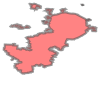

In [5]:
moscow_polygon = wkt.loads(l)
moscow_polygon

In [3]:
import json
import geopandas as gpd
from shapely import to_geojson, from_geojson
from geohash_utils import decode, rectangle

In [7]:
s = to_geojson(moscow_polygon)

In [9]:
with open("/Users/a.ashabokov/Documents/github/graph_tools/graph_isohrones/test/tests/test_geohashing/resources/moscow_polygon_wkt.txt", 'w') as f:
    f.write(s)

In [7]:
with open("../test/tests/test_geohashing/resources/moscow_geohashes_geos.txt", 'r') as f:
    test_geohashes_lst = f.read()

test_geohashes_lst = test_geohashes_lst.split()
len(test_geohashes_lst)

1013321

In [8]:
%%time
points_lst = [from_geojson(json.dumps(rectangle(x, bits_per_char=2))) for x in test_geohashes_lst]

CPU times: user 21.4 s, sys: 85.1 ms, total: 21.4 s
Wall time: 21.7 s


In [9]:
gdf = gpd.GeoDataFrame({
    "geometry": points_lst
})
gdf.reset_index(drop=False)
gdf.head()

,geometry
0,"POLYGON ((36.80283 55.44044, 36.80420 55.44044..."
1,"POLYGON ((36.80283 55.44044, 36.80420 55.44044..."
2,"POLYGON ((36.80283 55.44113, 36.80420 55.44113..."
3,"POLYGON ((36.80283 55.44182, 36.80420 55.44182..."
4,"POLYGON ((36.80283 55.44182, 36.80420 55.44182..."


In [10]:
with open("../test/tests/test_geohashing/resources/moscow_geohash_rect_geos.geojson", 'w') as f:
    f.write(gdf.to_json())